# Mobility and Contacts distributions

Understand the distributions of  the mobility and contacts metrics.

Do the distributions change?


Look  at  the  first week of data  from each  month.


Observation: In the beginning of March, the distribution of contacts per user had a very long tail compared to the distribution of trips per user. This ceased to be the case in the following months, at least  in the metro areas that had lockdowns.


In [4]:

import datetime
import math
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats

datapath = '/data/covid/'


DAY = 'day'
CONTACTS  = 'contacts'
TRIPS = 'trips'
USER_COUNT = 'count'


date_fmt = '%Y-%m-%d'


%config InlineBackend.figure_format = 'retina'

In [205]:
metro_area_to_id = {
    'New York':35620,
    'Seattle':42660,
    'Dallas':19100,
    'Washington':47900,
    'Miami':33100,
    'LA':31080,
    'Boston':14460,
}

In [8]:
def get_panel_users(area):
    panel_data_filepath = datapath + str(area) + '/' + 'homes.final.txt'
    panel_df = pd.read_csv(panel_data_filepath)
    return panel_df['user'].unique()

make map:
{month: ["2020-month-1", "2020-month-1", ..., "2020-month-7"]


and for each metro,
for each relevant day, 
have a table  with
```
trips, user count
```
and table for 
```
contacts, user count
```

and make a map for each metro:
{metro: {day: df} }


In [44]:

def get_stays_filepath(area, date):
    return datapath + str(area) + '/' + 'p3_output_stays_by_date_clean_personal_area/' + date + '.csv' + '.gz'

def get_contacts_filepath(area, date):
    return datapath + str(area) + '/' + 'p4_with_county_data/' + date + '.csv' + '.gz'

# def get_trips_per_panel_users_filepath(area,  date):
#     return datapath + str(area) + '/' + 'trips_per_panel_users/' + date + '.csv'

# def get_contacts_per_panel_users_filepath(area,  date):
#     return datapath + str(area) + '/' + 'contacts_per_panel_users/' + date + '.csv'

In [46]:
months = [3, 4, 5, 6]
days = [d for d in range(1,8)]

months_days = {m: [datetime.date(2020, m, d).strftime(date_fmt) for d in days] for m in months}
# months_days

In [47]:
all_days = []
for m in months:
    all_days  += months_days[m]
# all_days

In [113]:
def get_trips_by_panel_users(area, date, panel_users):
    """
    Returns dataframe  with columns
    trips, count
    """
    stays_filepath = get_stays_filepath(area, date)
    stays_df = pd.read_csv(stays_filepath)
    # restrict stays data to user panel data where not personal area
    stays_df = stays_df[stays_df['perc_personal_area'] < 1]
    stays_df = stays_df[stays_df['user_id'].isin(panel_users)]
    
    trips_by_users = stays_df['user_id'].value_counts().values
    trips_by_users_df = pd.Series(trips_by_users).value_counts().to_frame().reset_index()
    trips_by_users_df.columns = [TRIPS, USER_COUNT]
    return trips_by_users_df


In [111]:
def get_contacts_by_panel_users(area, date, panel_users):
    """
    Returns dataframe  with columns
    contacts, count
    """
    contacts_filepath = get_contacts_filepath(area, date)
    contacts_df = pd.read_csv(contacts_filepath)

    # restrict contacts data to user panel data where not personal area
    contacts_df = contacts_df[(contacts_df['pc1'] < 1) & (contacts_df['pc2'] < 1)]
    contacts_df = contacts_df[contacts_df['u1'].isin(panel_users) & contacts_df['u2'].isin(panel_users)]

    contacts_by_users = contacts_df['u1'].value_counts().values
    contacts_by_users_df = pd.Series(contacts_by_users).value_counts().to_frame().reset_index()
    contacts_by_users_df.columns = [CONTACTS, USER_COUNT]
    return contacts_by_users_df
    

In [112]:
contacts_by_panel_users_df  = get_contacts_by_panel_users(area, date, panel_users)
contacts_by_panel_users_df.head()

contacts  count
0         1   5508
1         2   3131
2         3   1859
3         4   1275
4         5    846

In [163]:
# and make a map for each metro: {metro: {day: df} }

metro_day_trips = {}
metro_day_contacts = {}


for metro, area_id in metro_area_to_id.items():
    panel_users = get_panel_users(area_id)
    day_trips  =  {}
    day_contacts =  {}
    for date in all_days:
        print('%s: %s : getting trips by panel users' % (metro, date))
        trips_by_panel_users = get_trips_by_panel_users(area_id, date, panel_users)
        day_trips[date] = trips_by_panel_users
        print('%s: %s : getting contacts by panel users' % (metro, date))
        contacts_by_panel_users = get_contacts_by_panel_users(area_id, date, panel_users)
        day_contacts[date] = contacts_by_panel_users
        
    metro_day_trips[metro] = day_trips
    metro_day_contacts[metro] = day_contacts

Dallas: 2020-03-01 : getting trips by panel users
Dallas: 2020-03-01 : getting contacts by panel users
Dallas: 2020-03-02 : getting trips by panel users
Dallas: 2020-03-02 : getting contacts by panel users
Dallas: 2020-03-03 : getting trips by panel users
Dallas: 2020-03-03 : getting contacts by panel users
Dallas: 2020-03-04 : getting trips by panel users
Dallas: 2020-03-04 : getting contacts by panel users
Dallas: 2020-03-05 : getting trips by panel users
Dallas: 2020-03-05 : getting contacts by panel users
Dallas: 2020-03-06 : getting trips by panel users
Dallas: 2020-03-06 : getting contacts by panel users
Dallas: 2020-03-07 : getting trips by panel users
Dallas: 2020-04-05 : getting trips by panel users
Dallas: 2020-04-05 : getting contacts by panel users
Dallas: 2020-04-06 : getting trips by panel users
Dallas: 2020-04-06 : getting contacts by panel users
Dallas: 2020-04-07 : getting trips by panel users
Dallas: 2020-04-07 : getting contacts by panel users
Dallas: 2020-05-01 : ge

Washington: 2020-06-06 : getting trips by panel users
Washington: 2020-06-06 : getting contacts by panel users
Washington: 2020-06-07 : getting trips by panel users
Washington: 2020-06-07 : getting contacts by panel users
New York: 2020-03-01 : getting trips by panel users
New York: 2020-03-01 : getting contacts by panel users
New York: 2020-03-02 : getting trips by panel users
New York: 2020-03-02 : getting contacts by panel users
New York: 2020-03-03 : getting trips by panel users
New York: 2020-03-03 : getting contacts by panel users
New York: 2020-03-04 : getting trips by panel users
New York: 2020-03-04 : getting contacts by panel users
New York: 2020-03-05 : getting trips by panel users
New York: 2020-03-05 : getting contacts by panel users
New York: 2020-03-06 : getting trips by panel users
New York: 2020-03-06 : getting contacts by panel users
New York: 2020-03-07 : getting trips by panel users
New York: 2020-03-07 : getting contacts by panel users
New York: 2020-04-01 : gettin

LA: 2020-06-03 : getting trips by panel users
LA: 2020-06-03 : getting contacts by panel users
LA: 2020-06-04 : getting trips by panel users
LA: 2020-06-04 : getting contacts by panel users
LA: 2020-06-05 : getting trips by panel users
LA: 2020-06-05 : getting contacts by panel users
LA: 2020-06-06 : getting trips by panel users
LA: 2020-06-06 : getting contacts by panel users
LA: 2020-06-07 : getting trips by panel users
LA: 2020-06-07 : getting contacts by panel users


In [174]:
print(metro_day_trips.keys())
print(metro_day_contacts.keys())

['LA', 'Miami', 'Boston', 'Dallas', 'Washington', 'New York', 'Seattle']
['LA', 'Miami', 'Boston', 'Dallas', 'Washington', 'New York', 'Seattle']


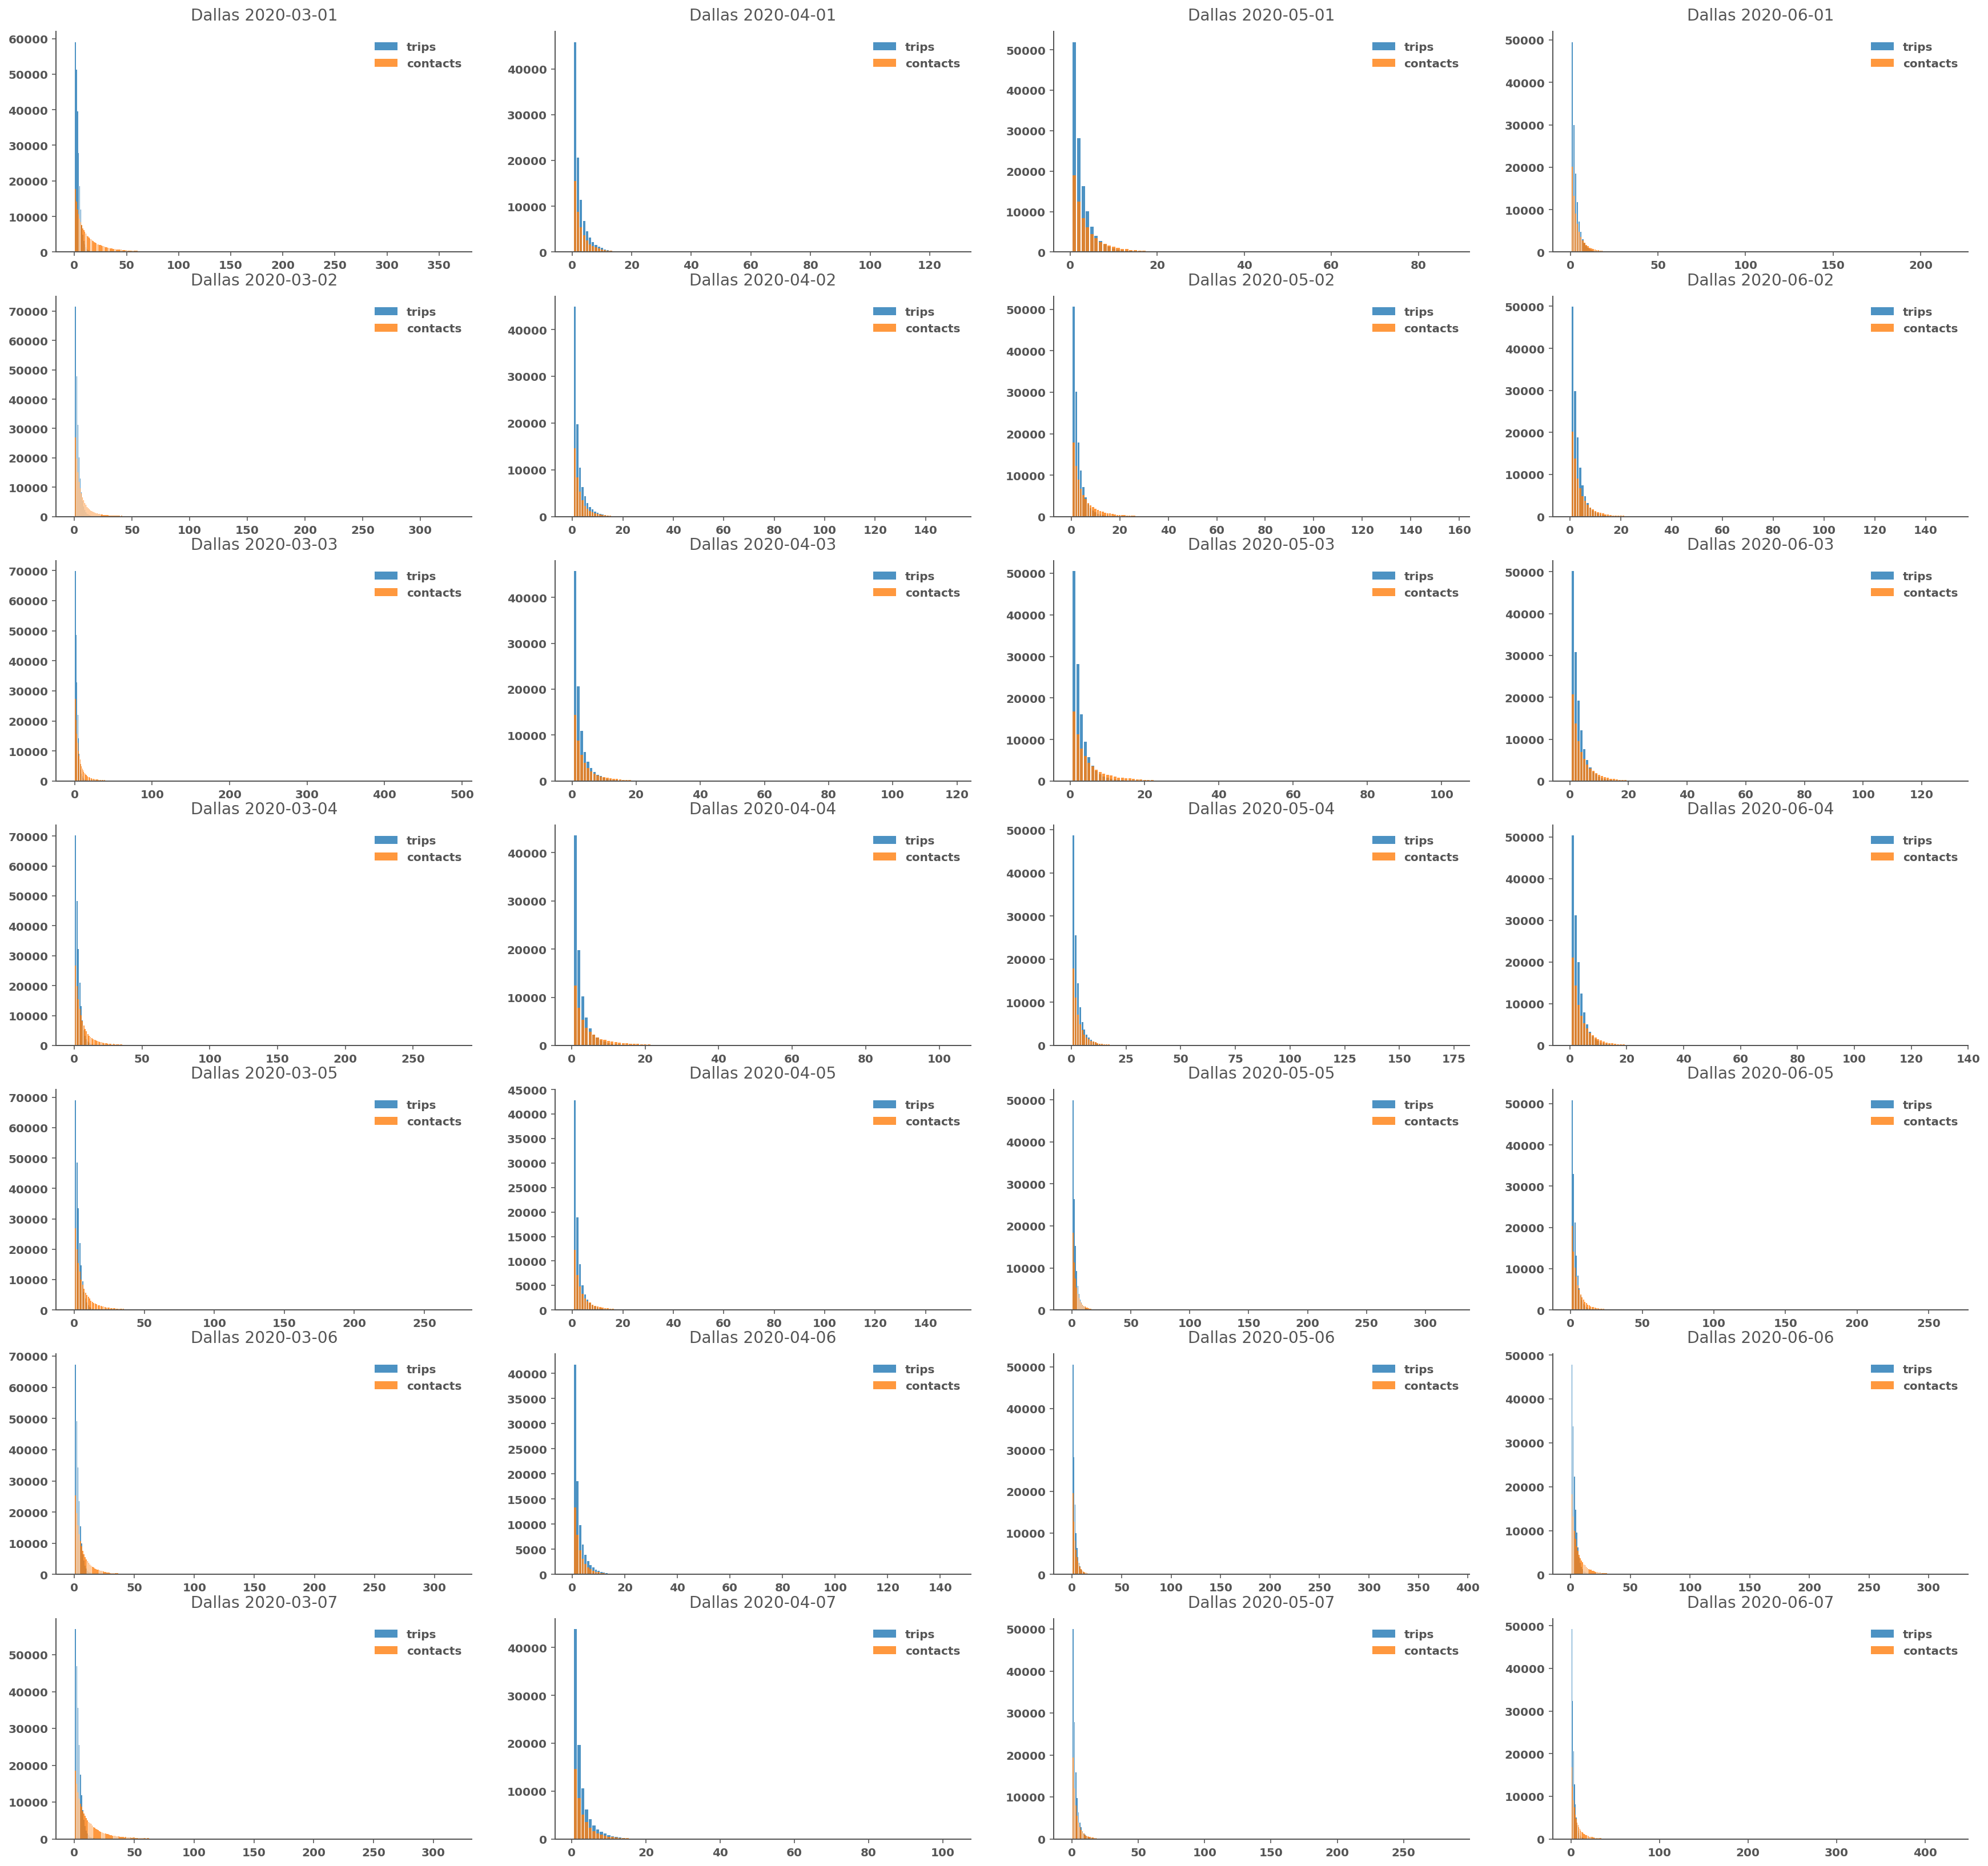

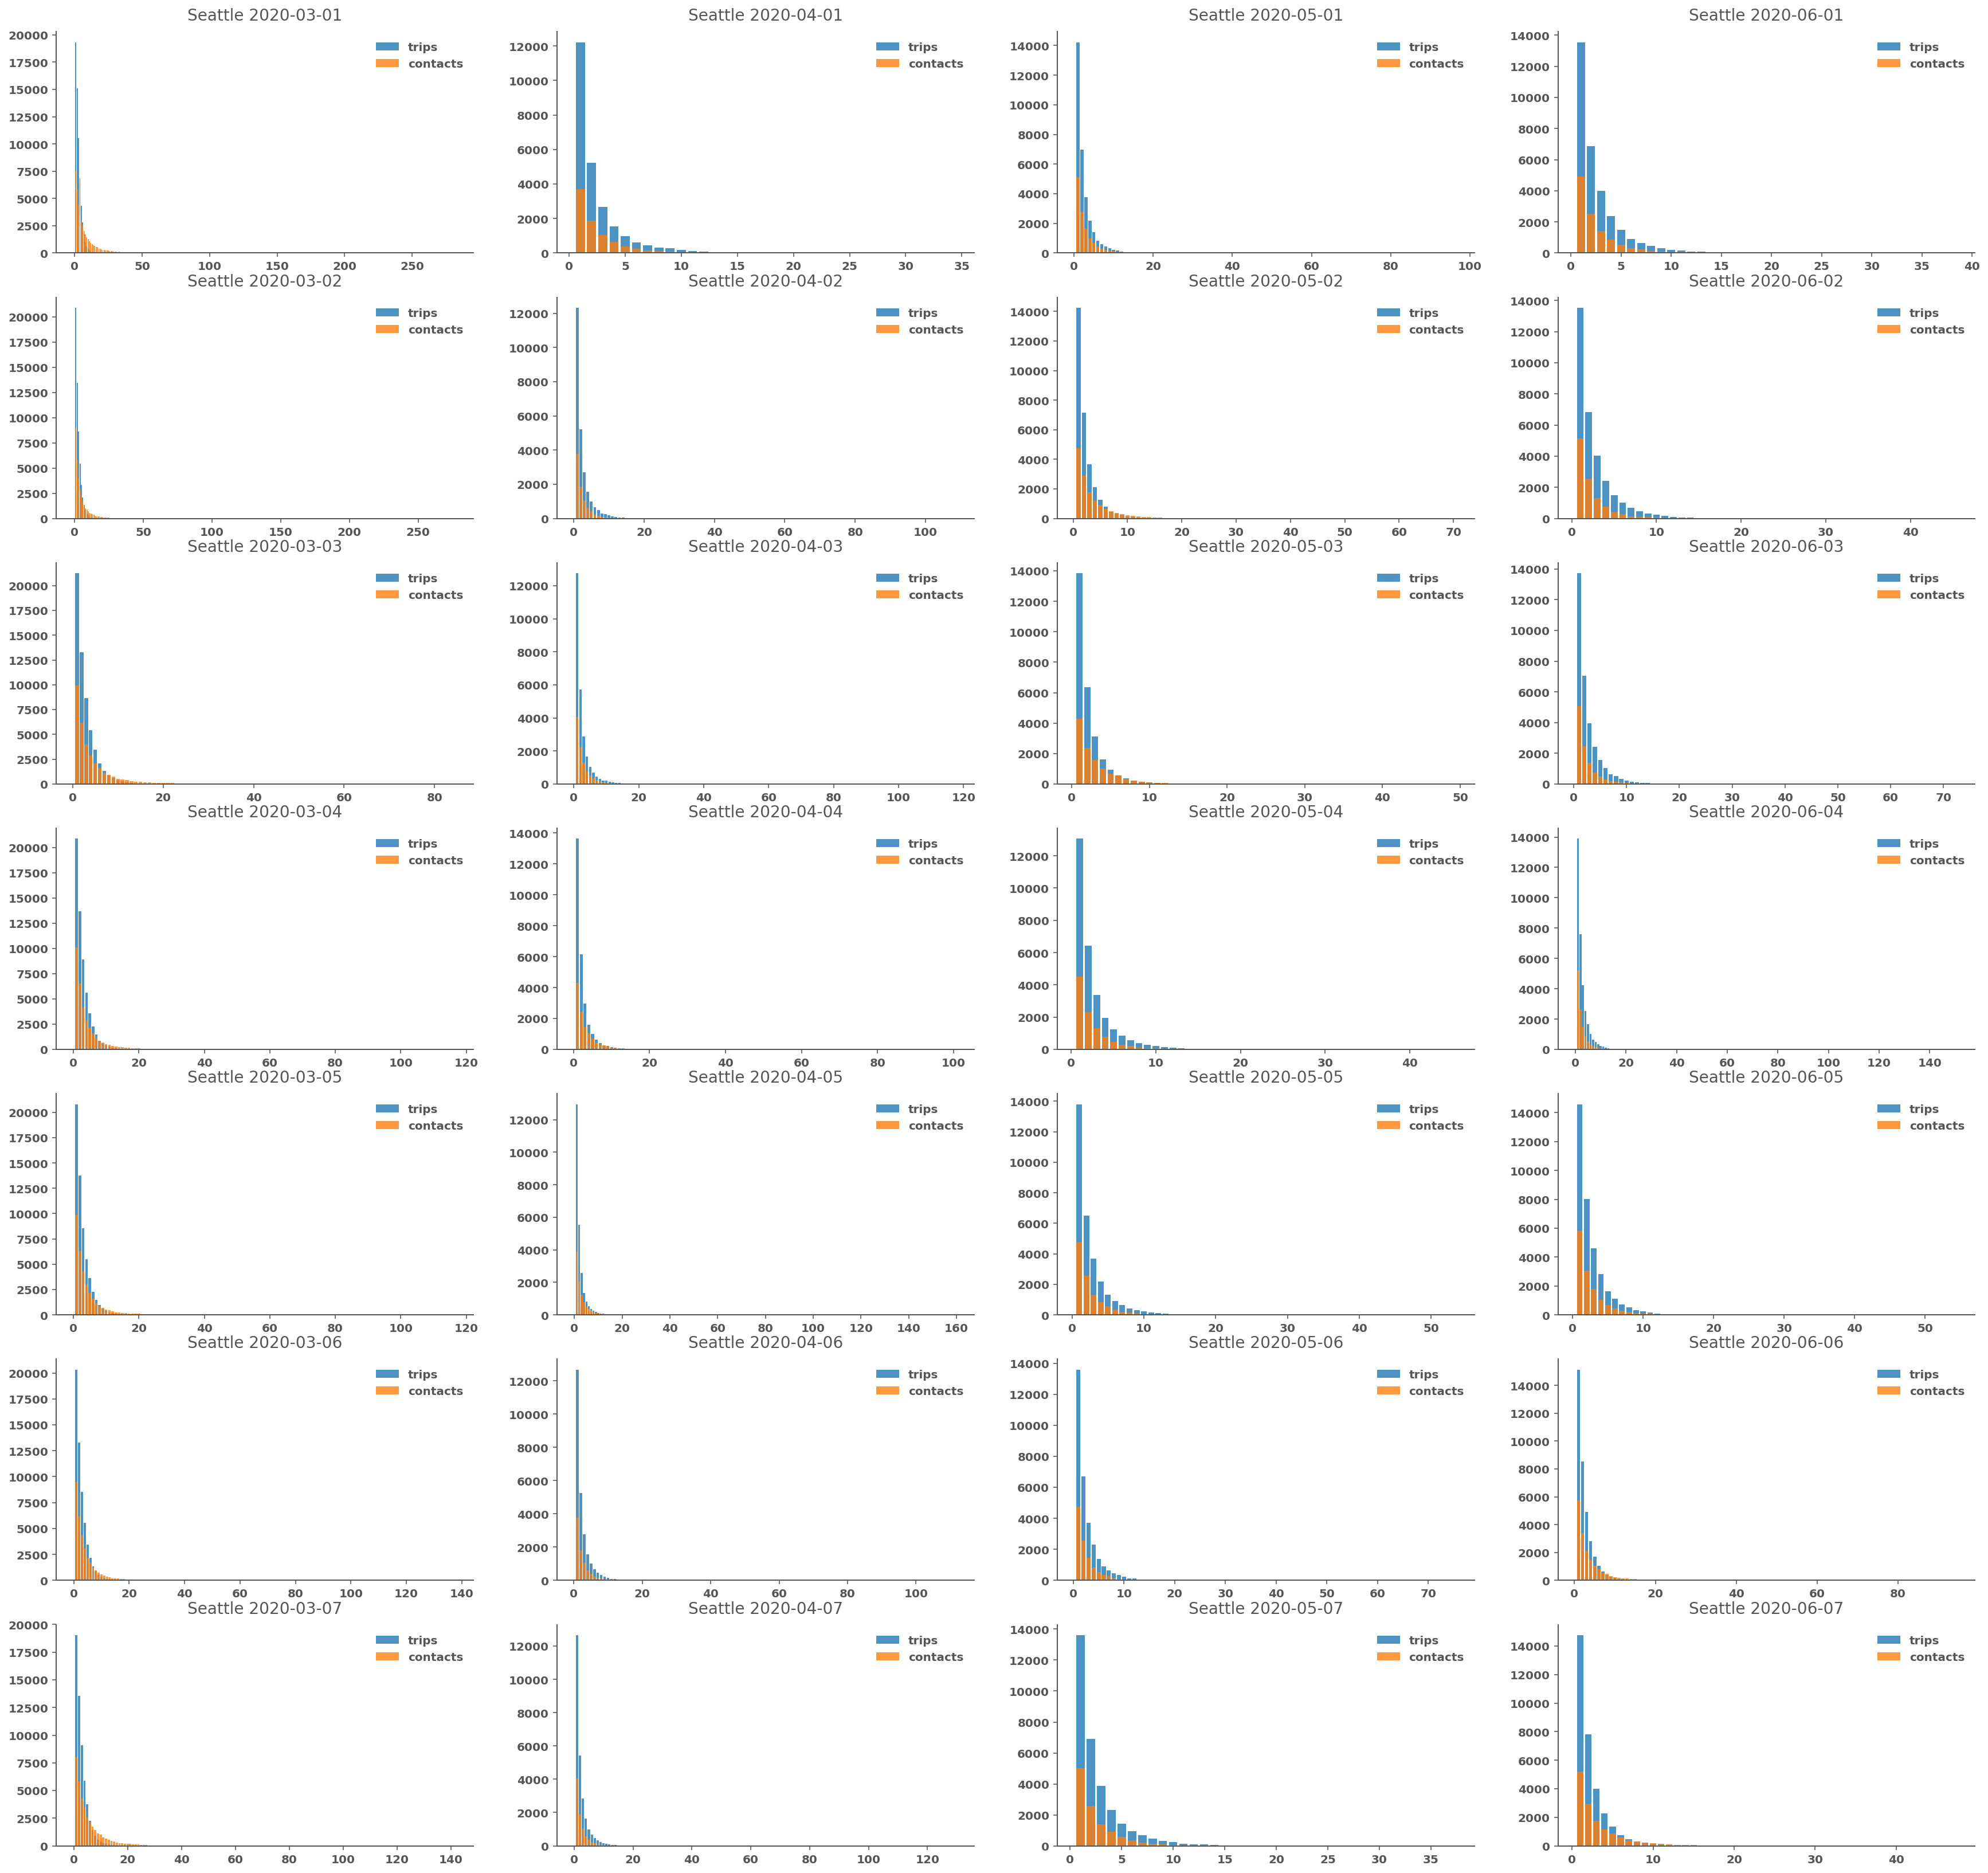

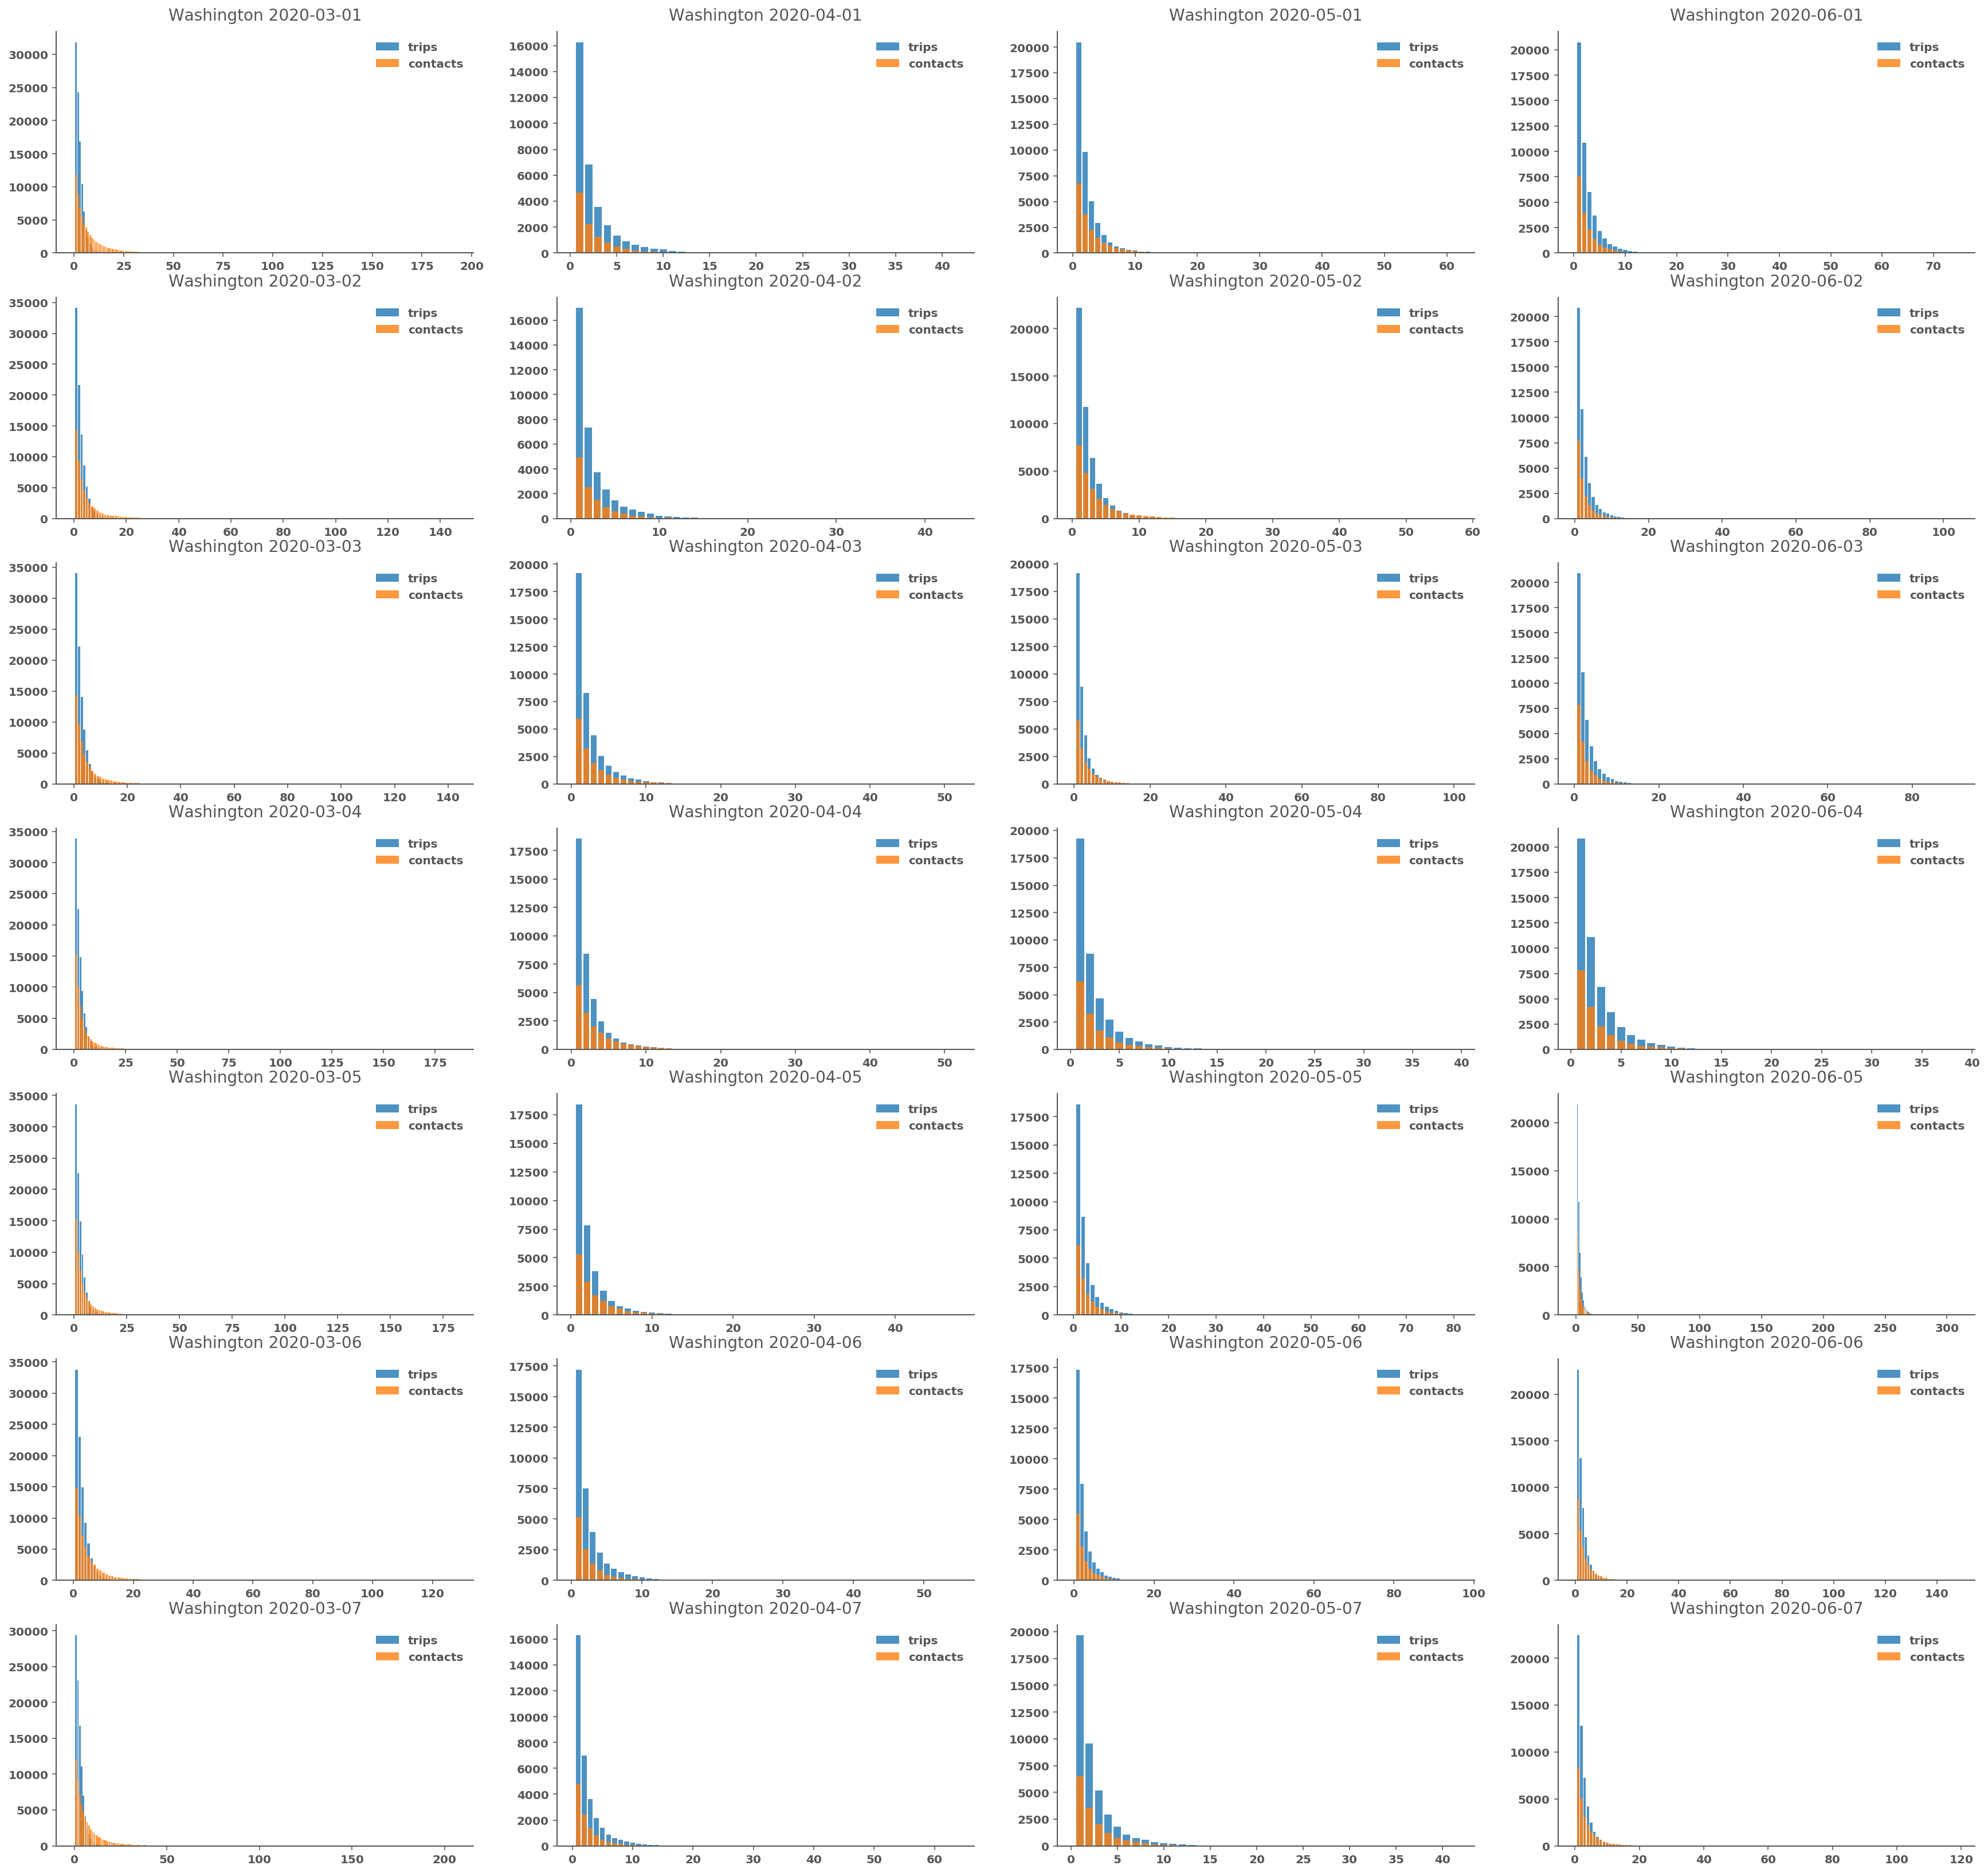

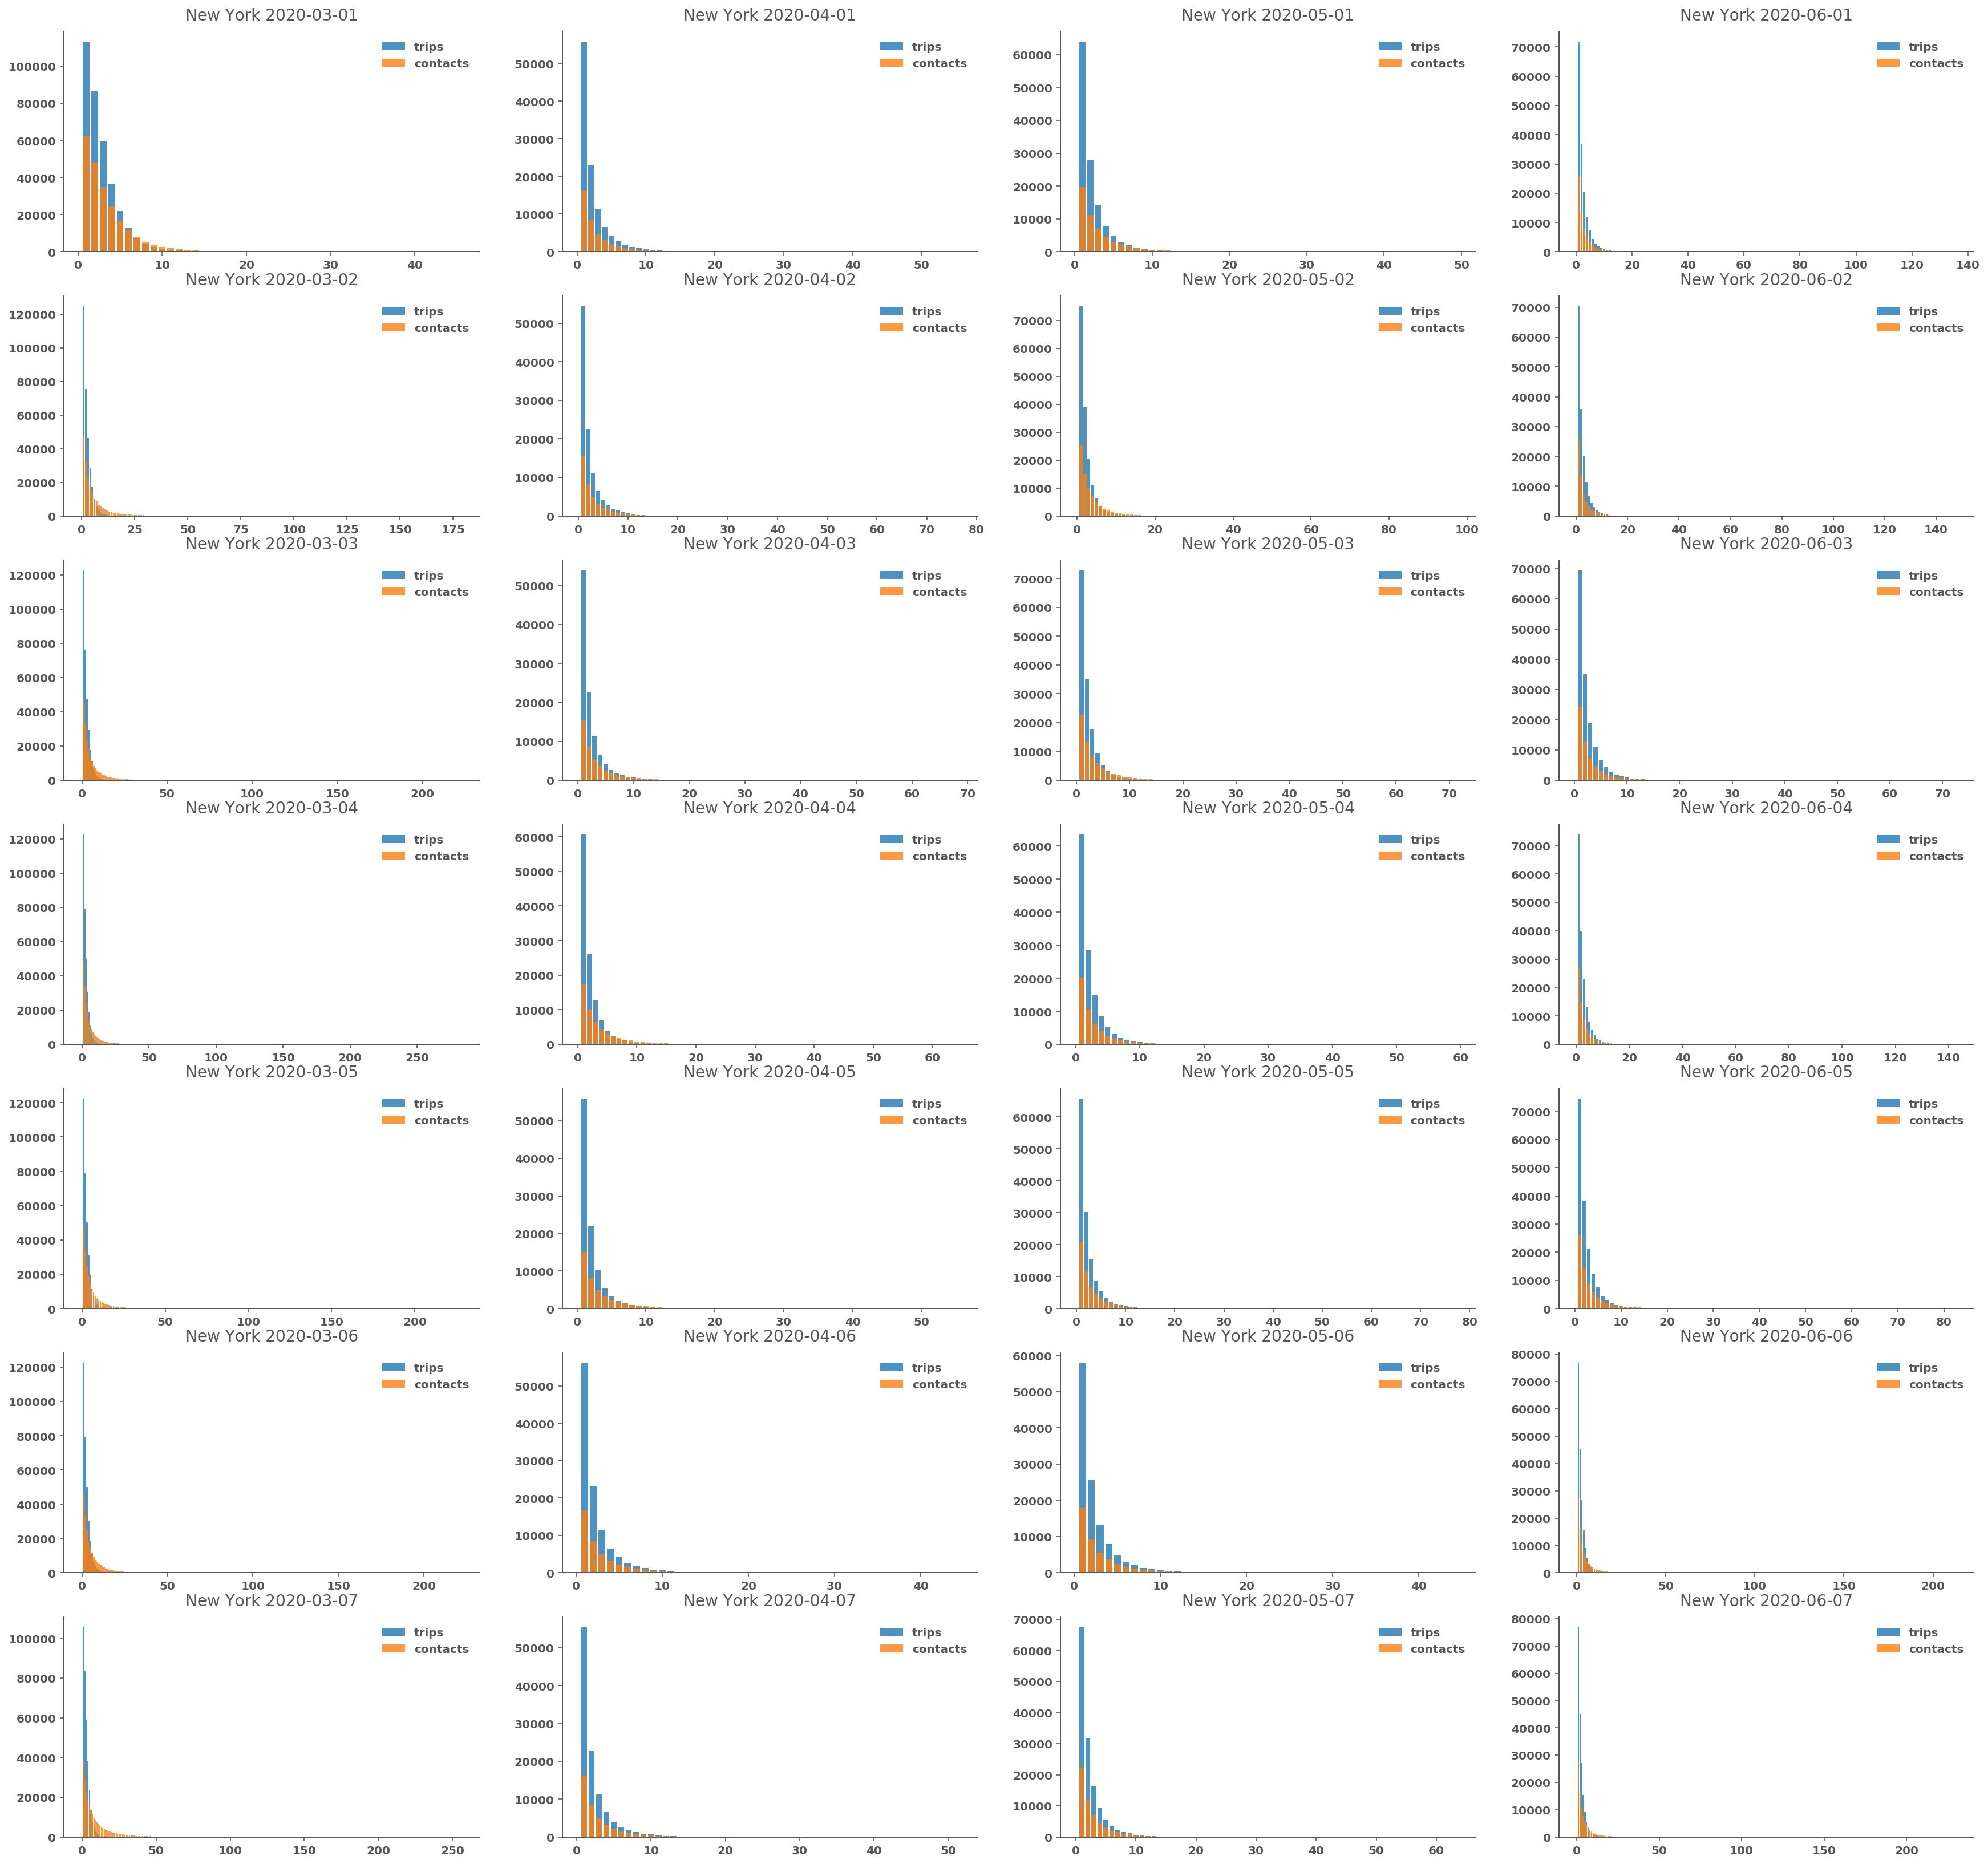

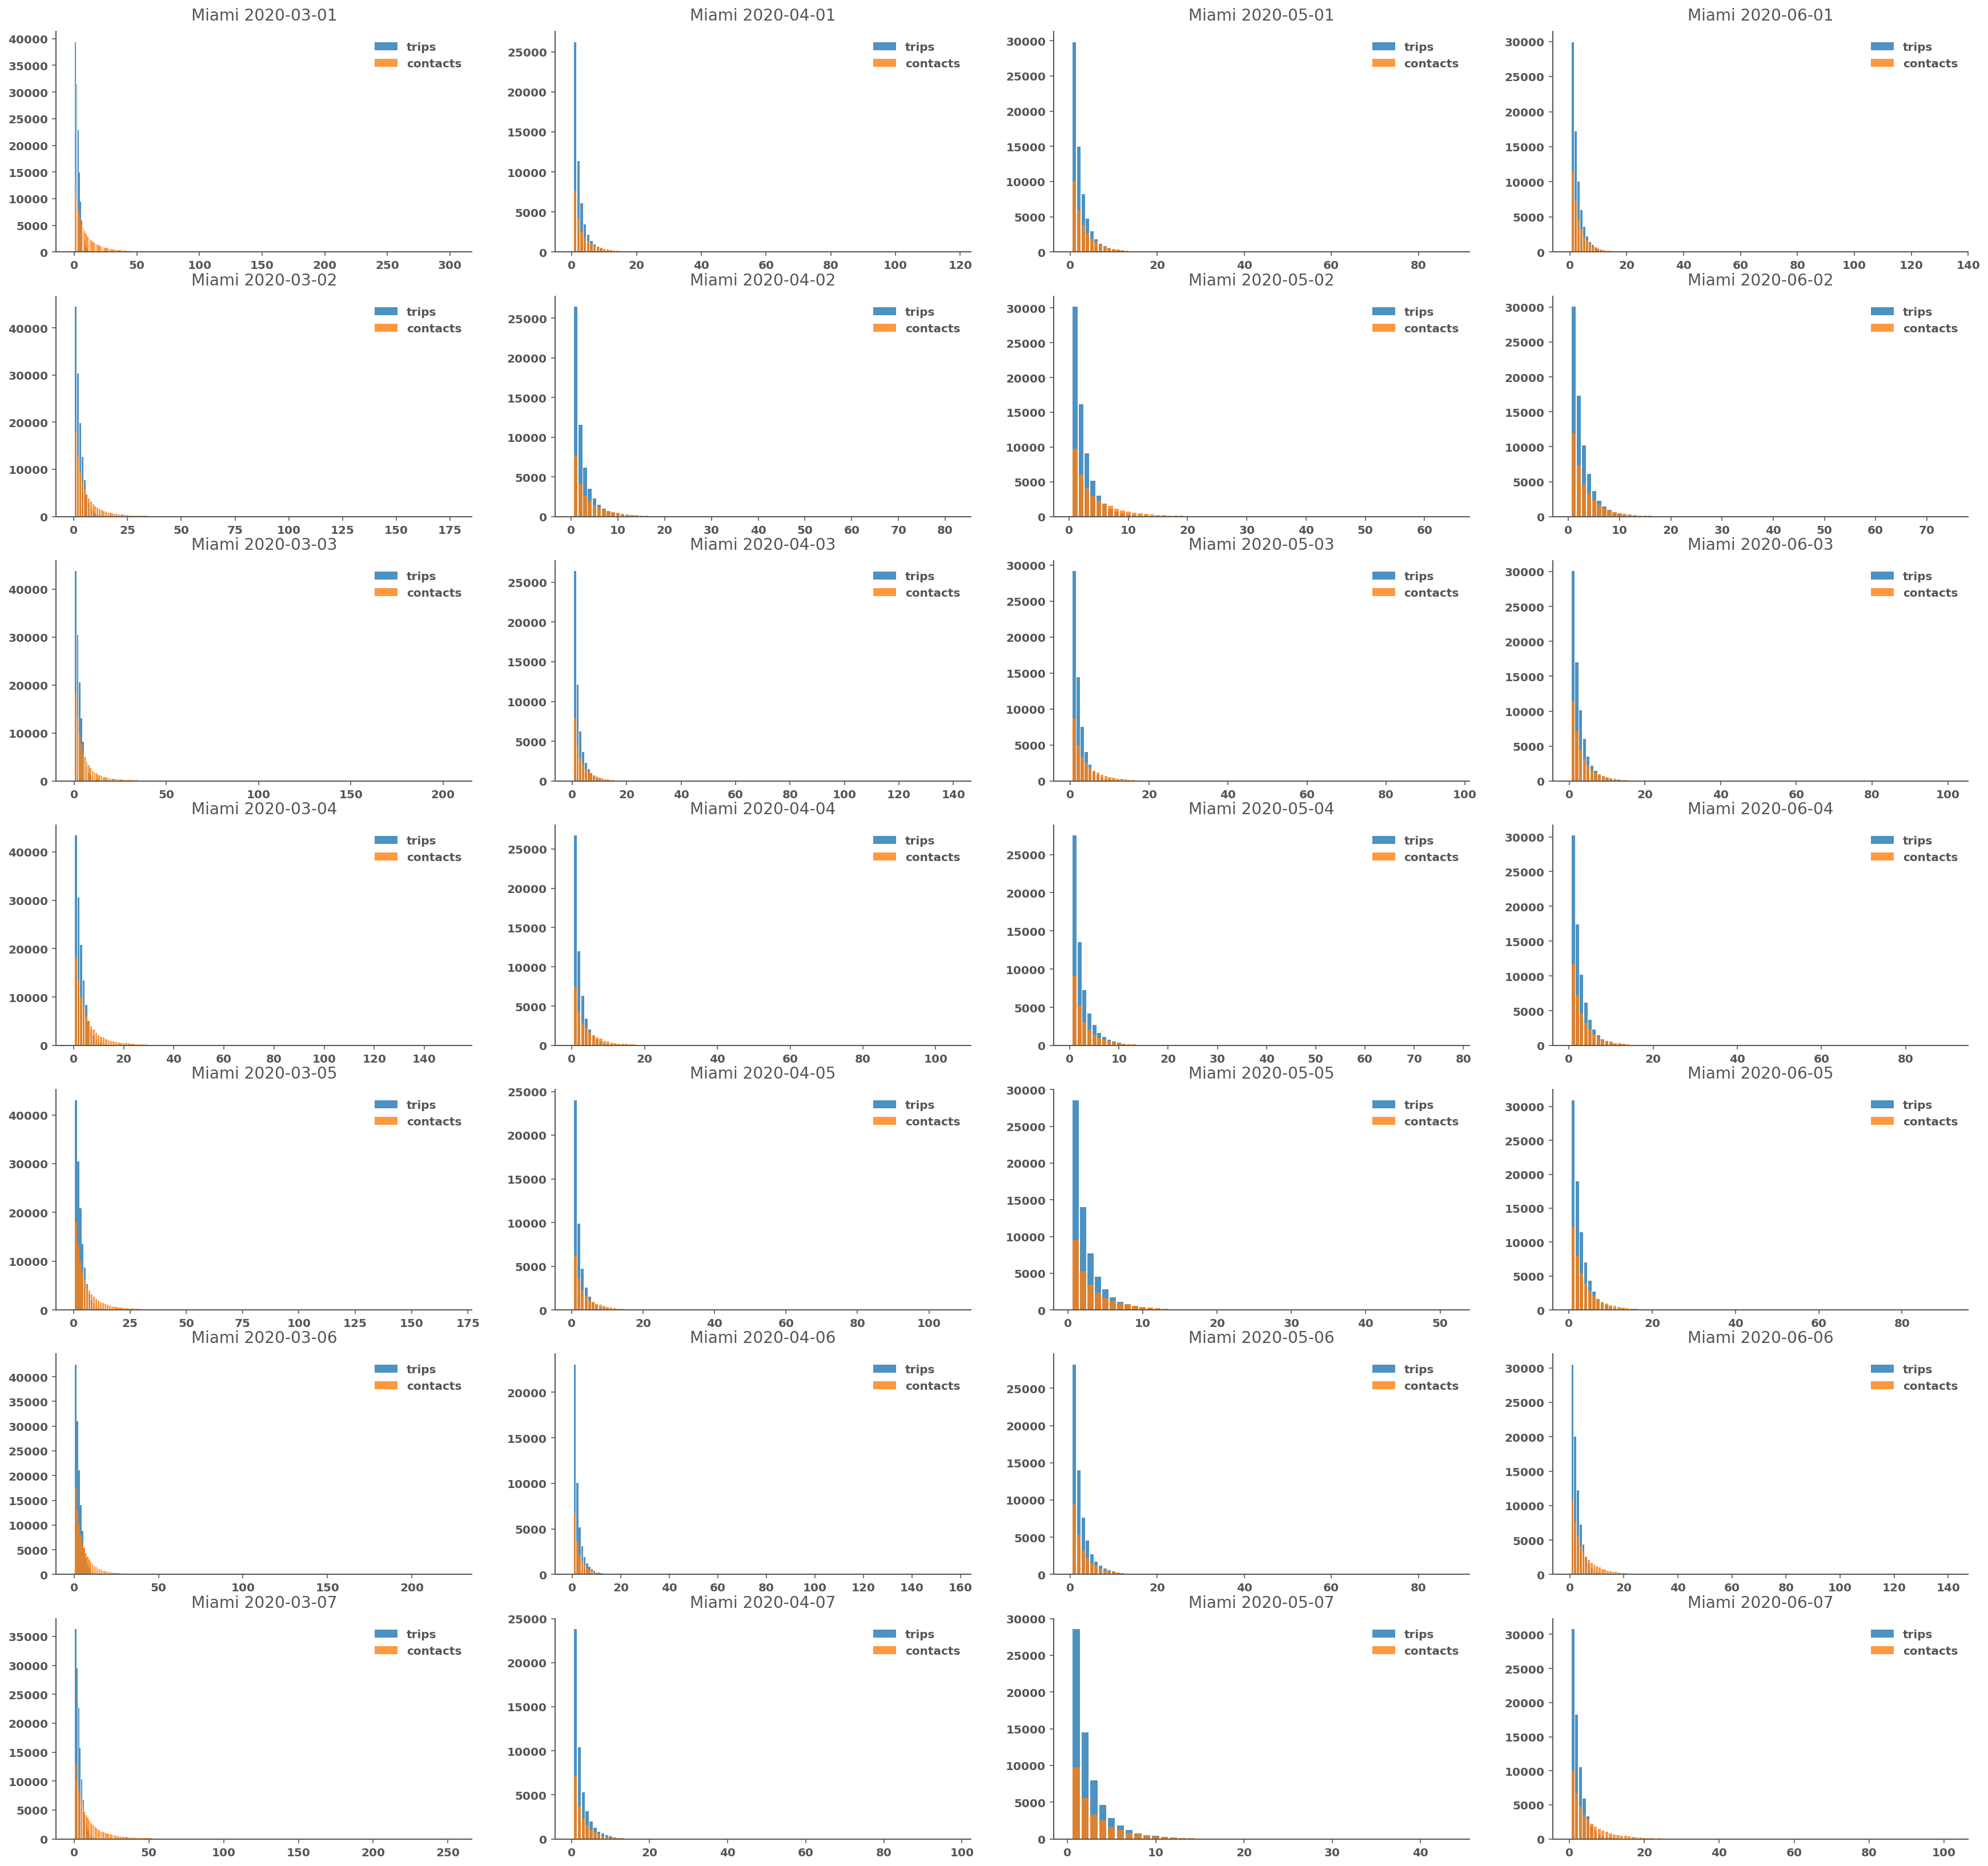

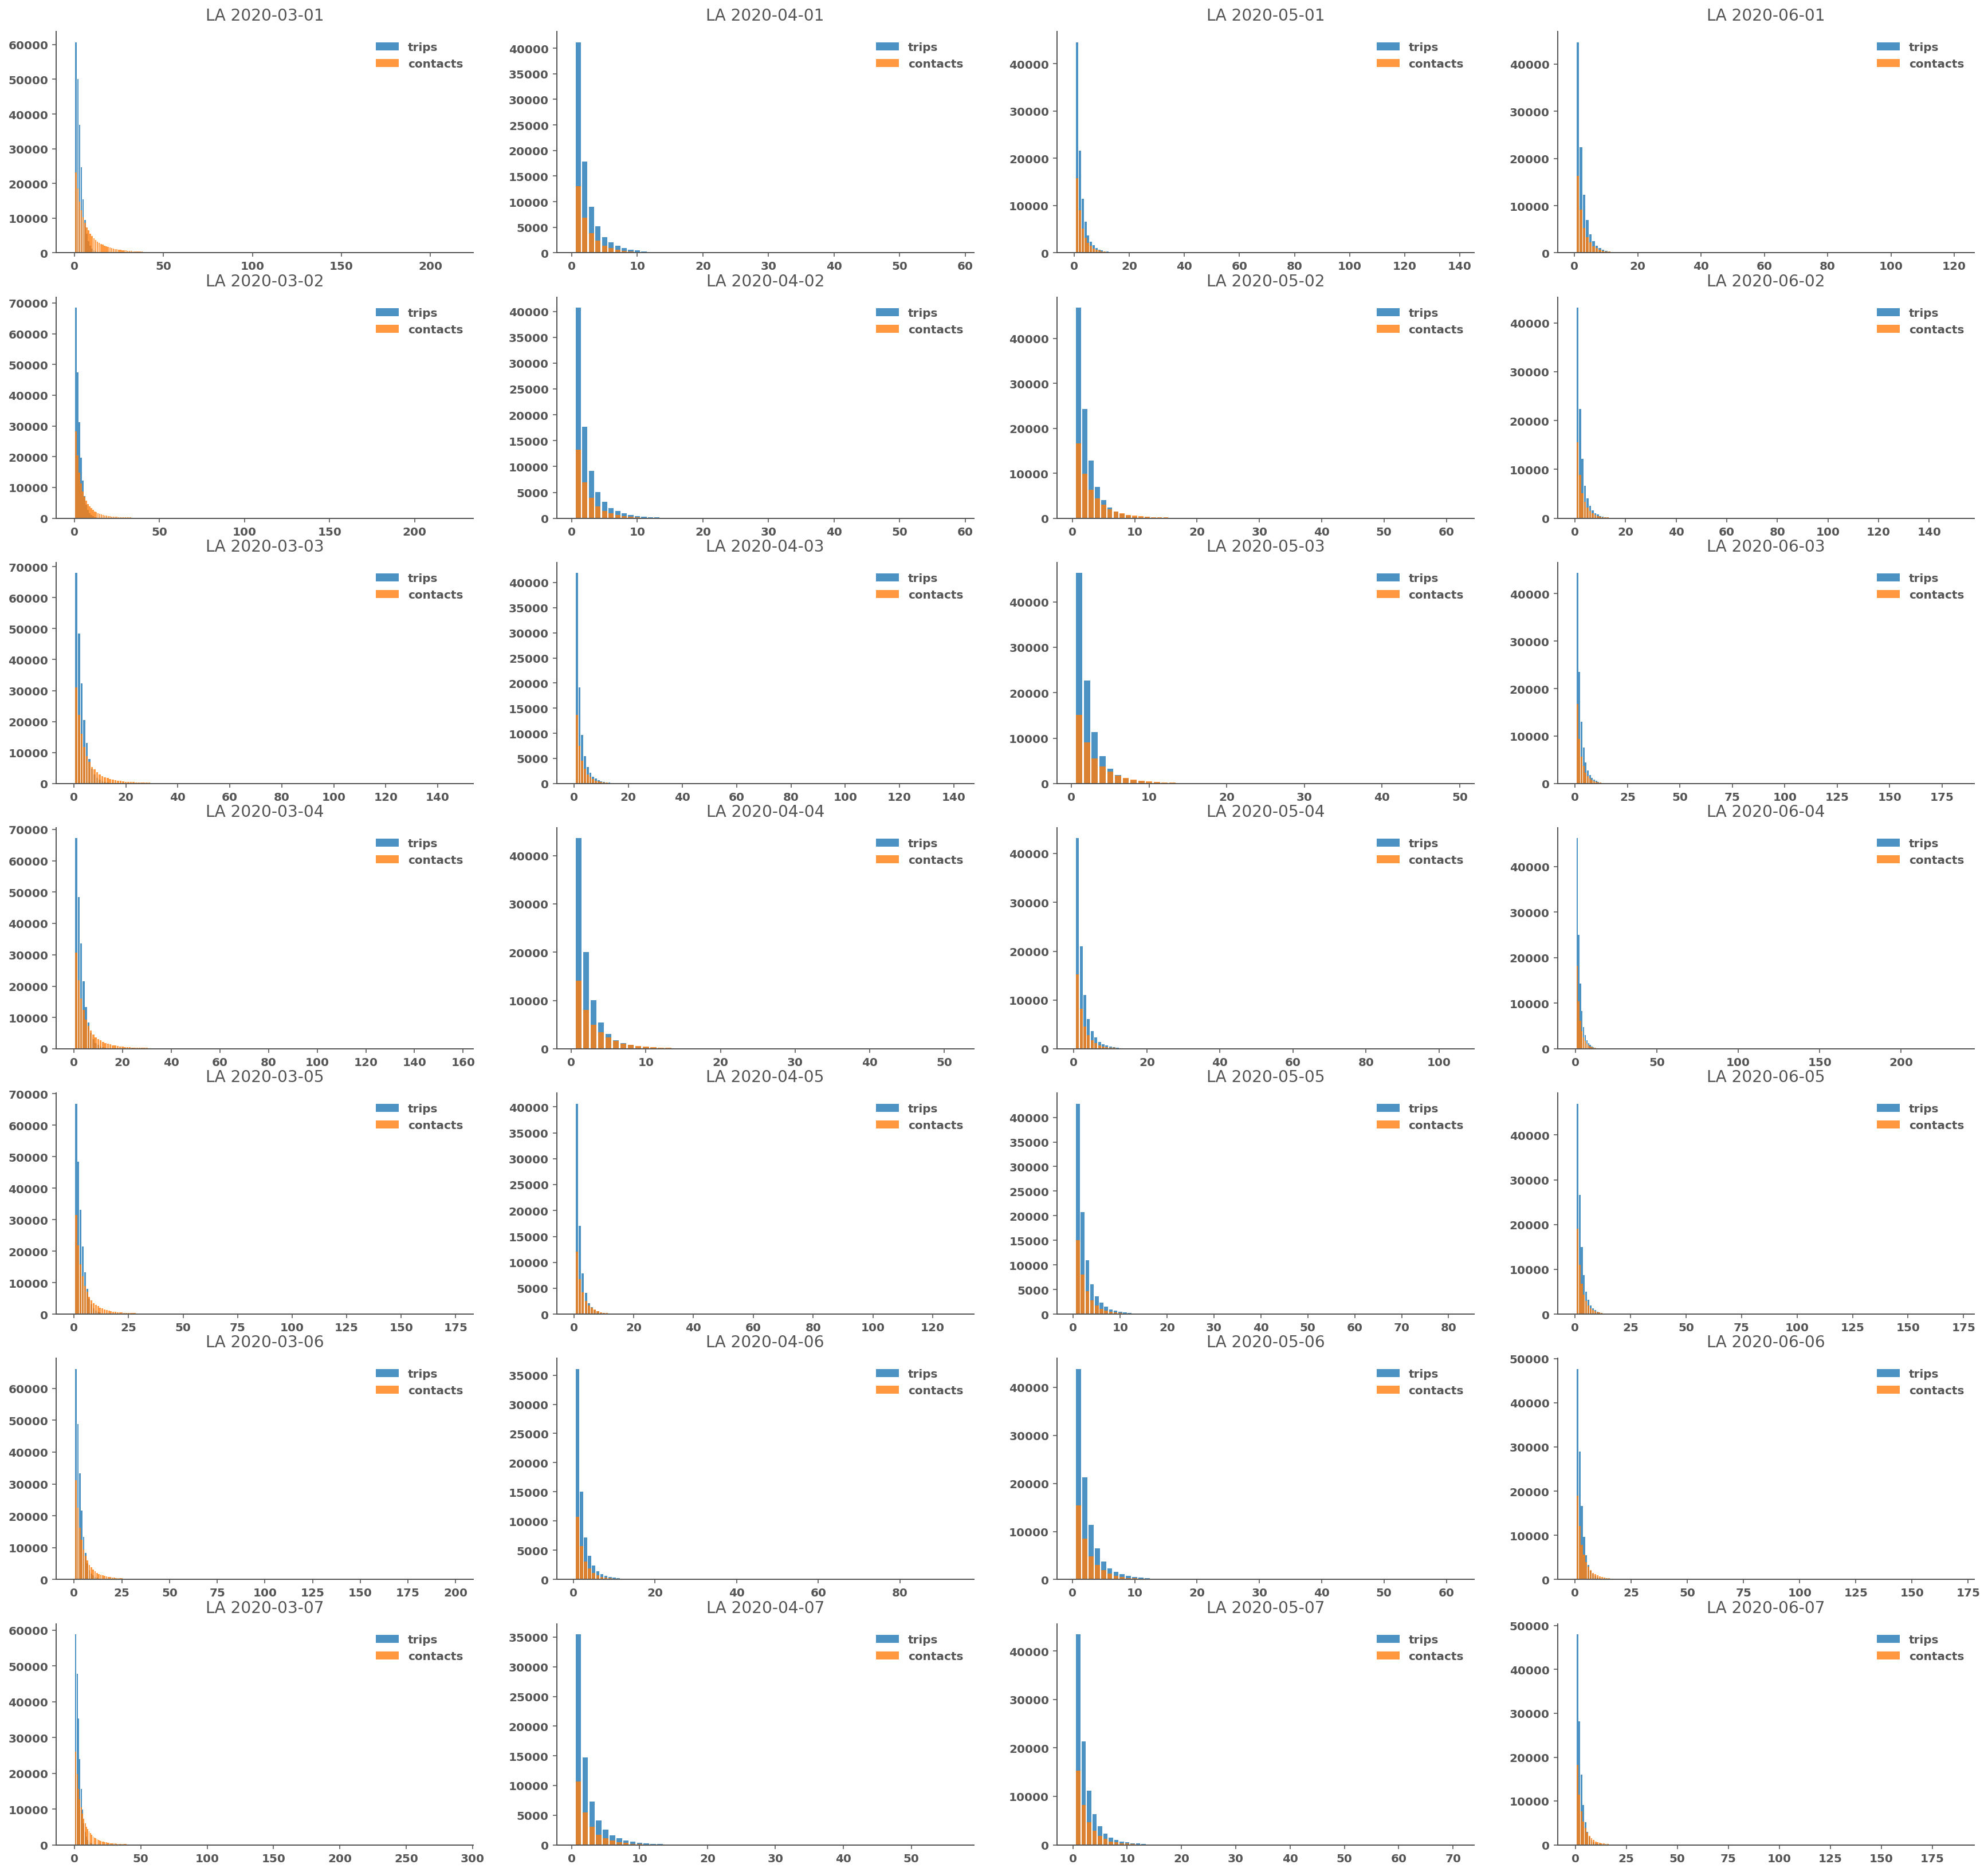

In [164]:
# plot them  all

ncols=len(months)
nrows=len(days)

for metro in metro_area_to_id.keys():
    day_trips = metro_day_trips[metro]
    day_contacts = metro_day_contacts[metro]

    figure, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, nrows*4))

    for m, month in enumerate(months_days):
        for d, date in enumerate(months_days[month]):
            trips_df  = day_trips[date]
            contacts_df  = day_contacts[date]
            ax = axes.flat[d*ncols+m]

            ax.bar(trips_df[TRIPS],
                trips_df[USER_COUNT],
                alpha=0.8,
               label='trips',
               color='#1f77b4'
              )

            ax.bar(contacts_df[CONTACTS],
                contacts_df[USER_COUNT],
                alpha=0.8,
               label='contacts',
               color=u'#ff7f0e'
              )
            ax.set_title(metro + ' ' + date)
            ax.legend()
    plt.show()

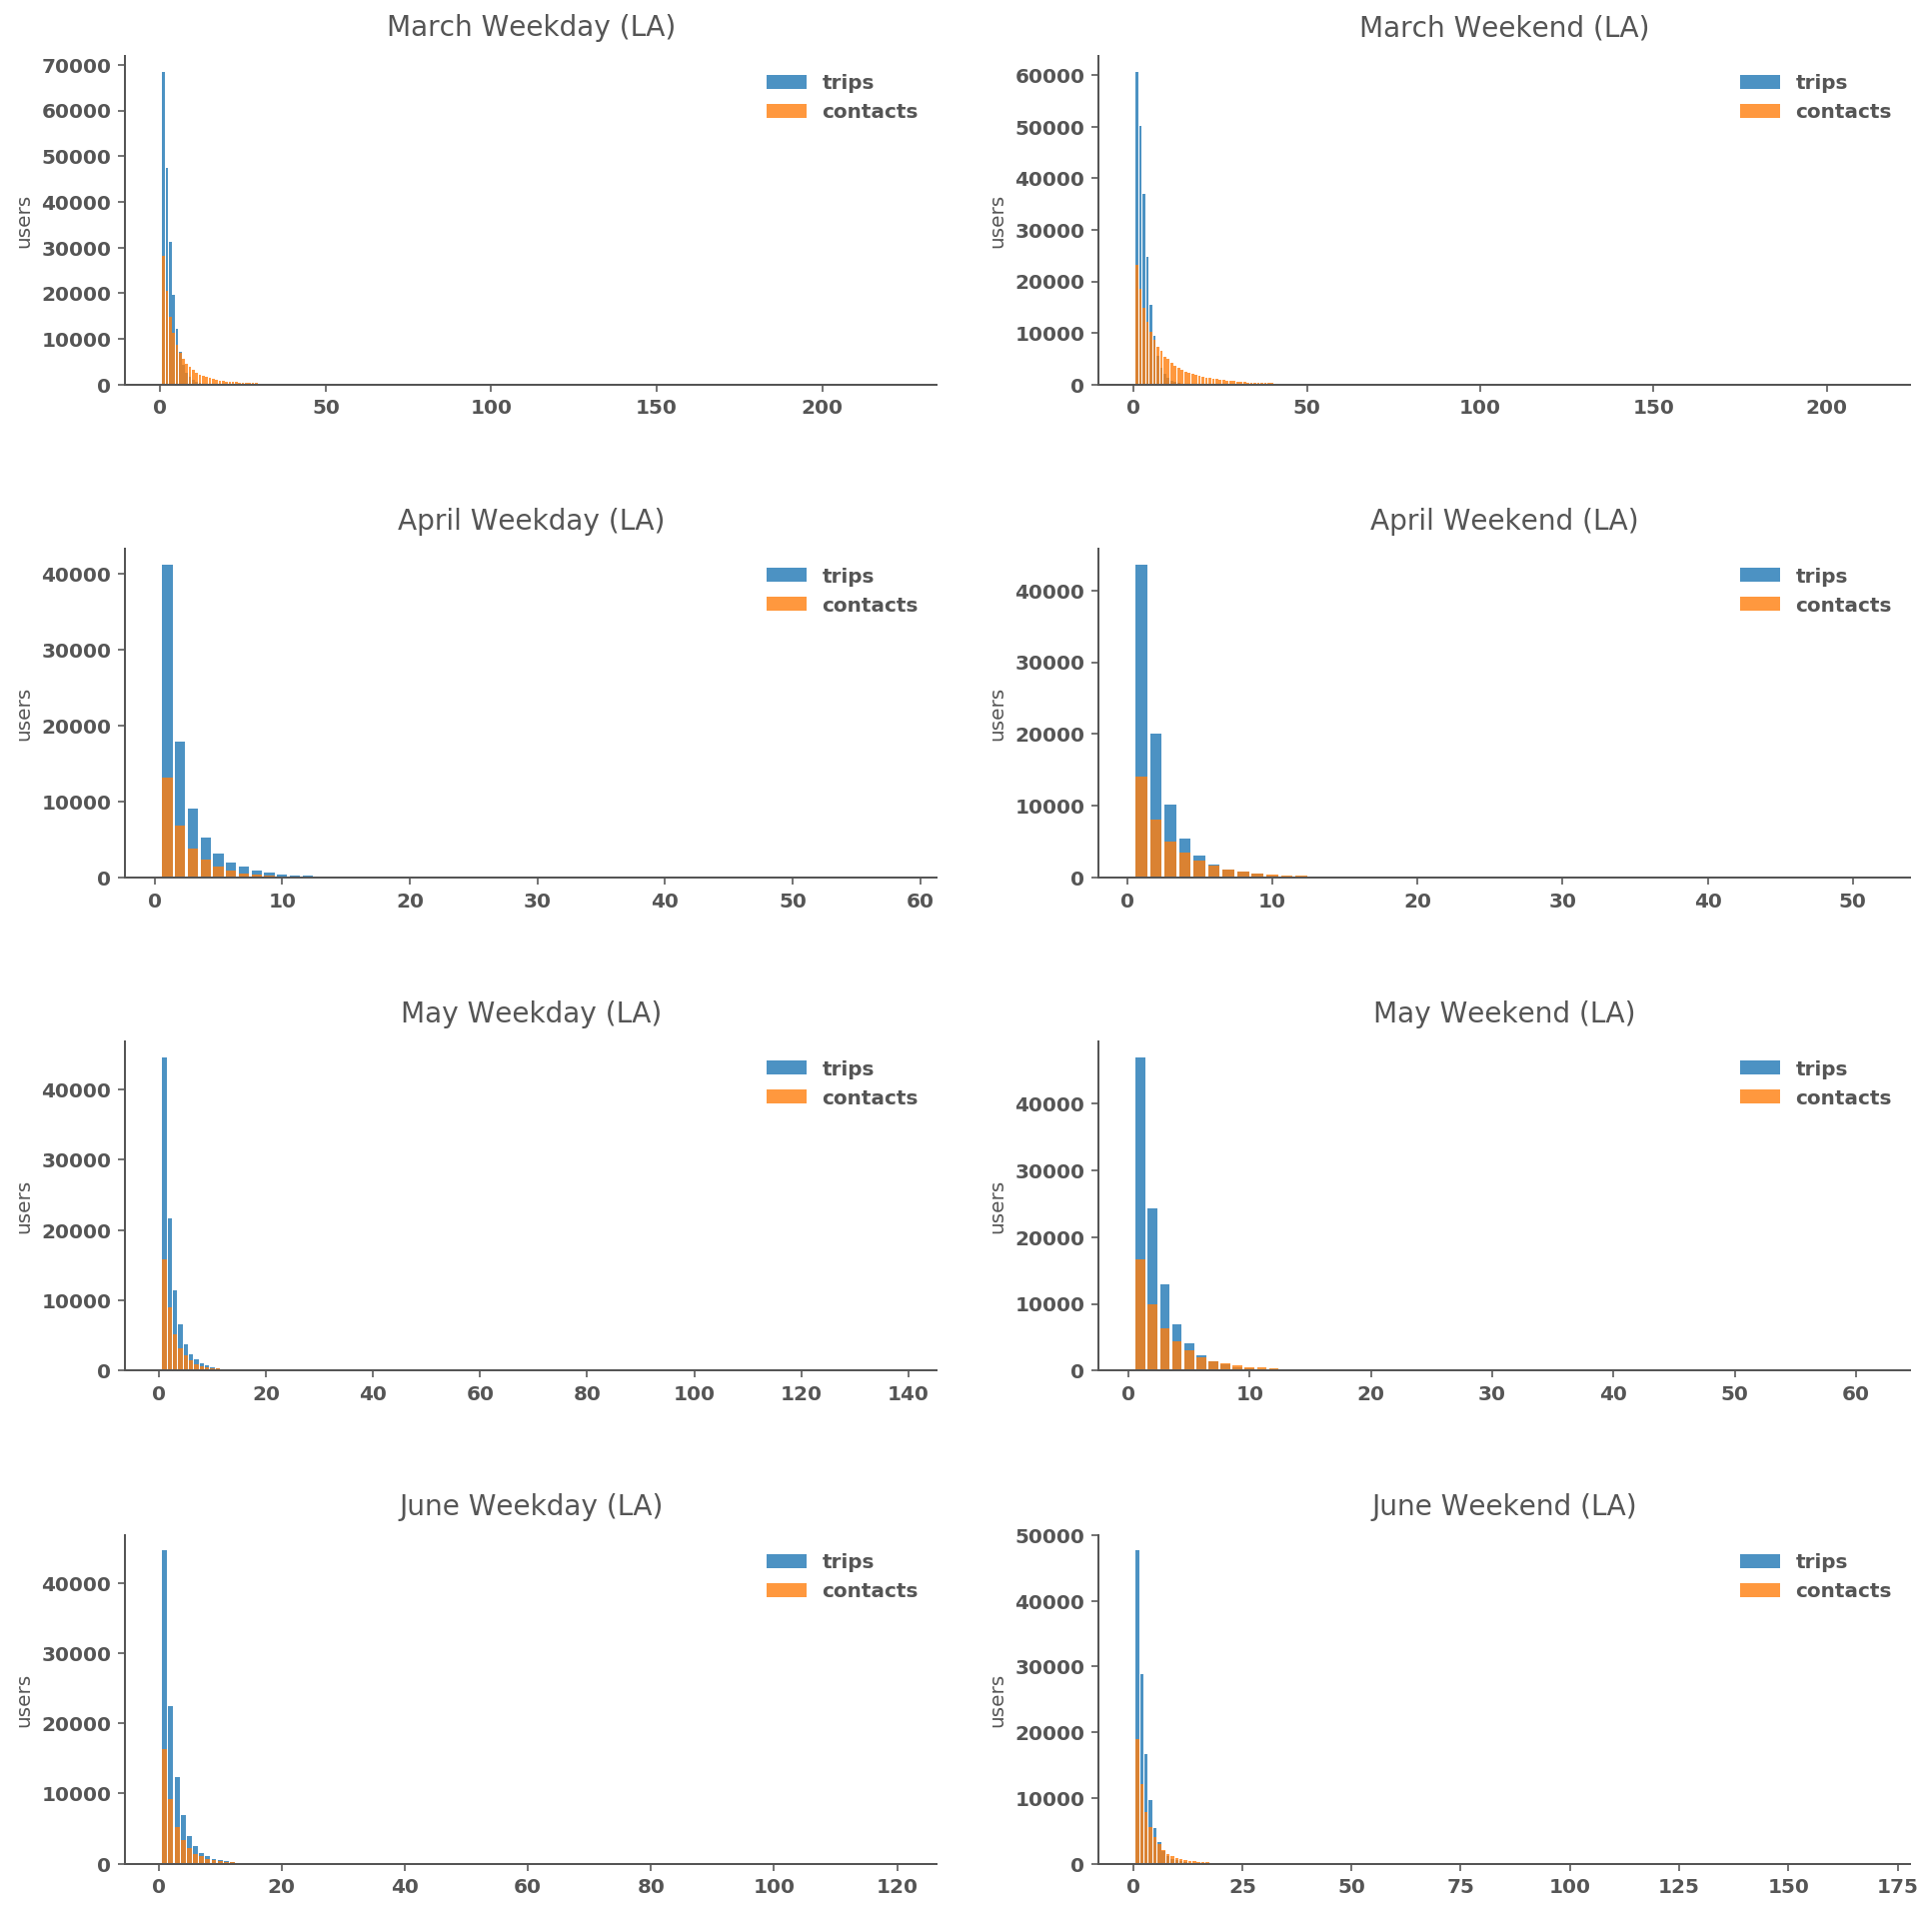

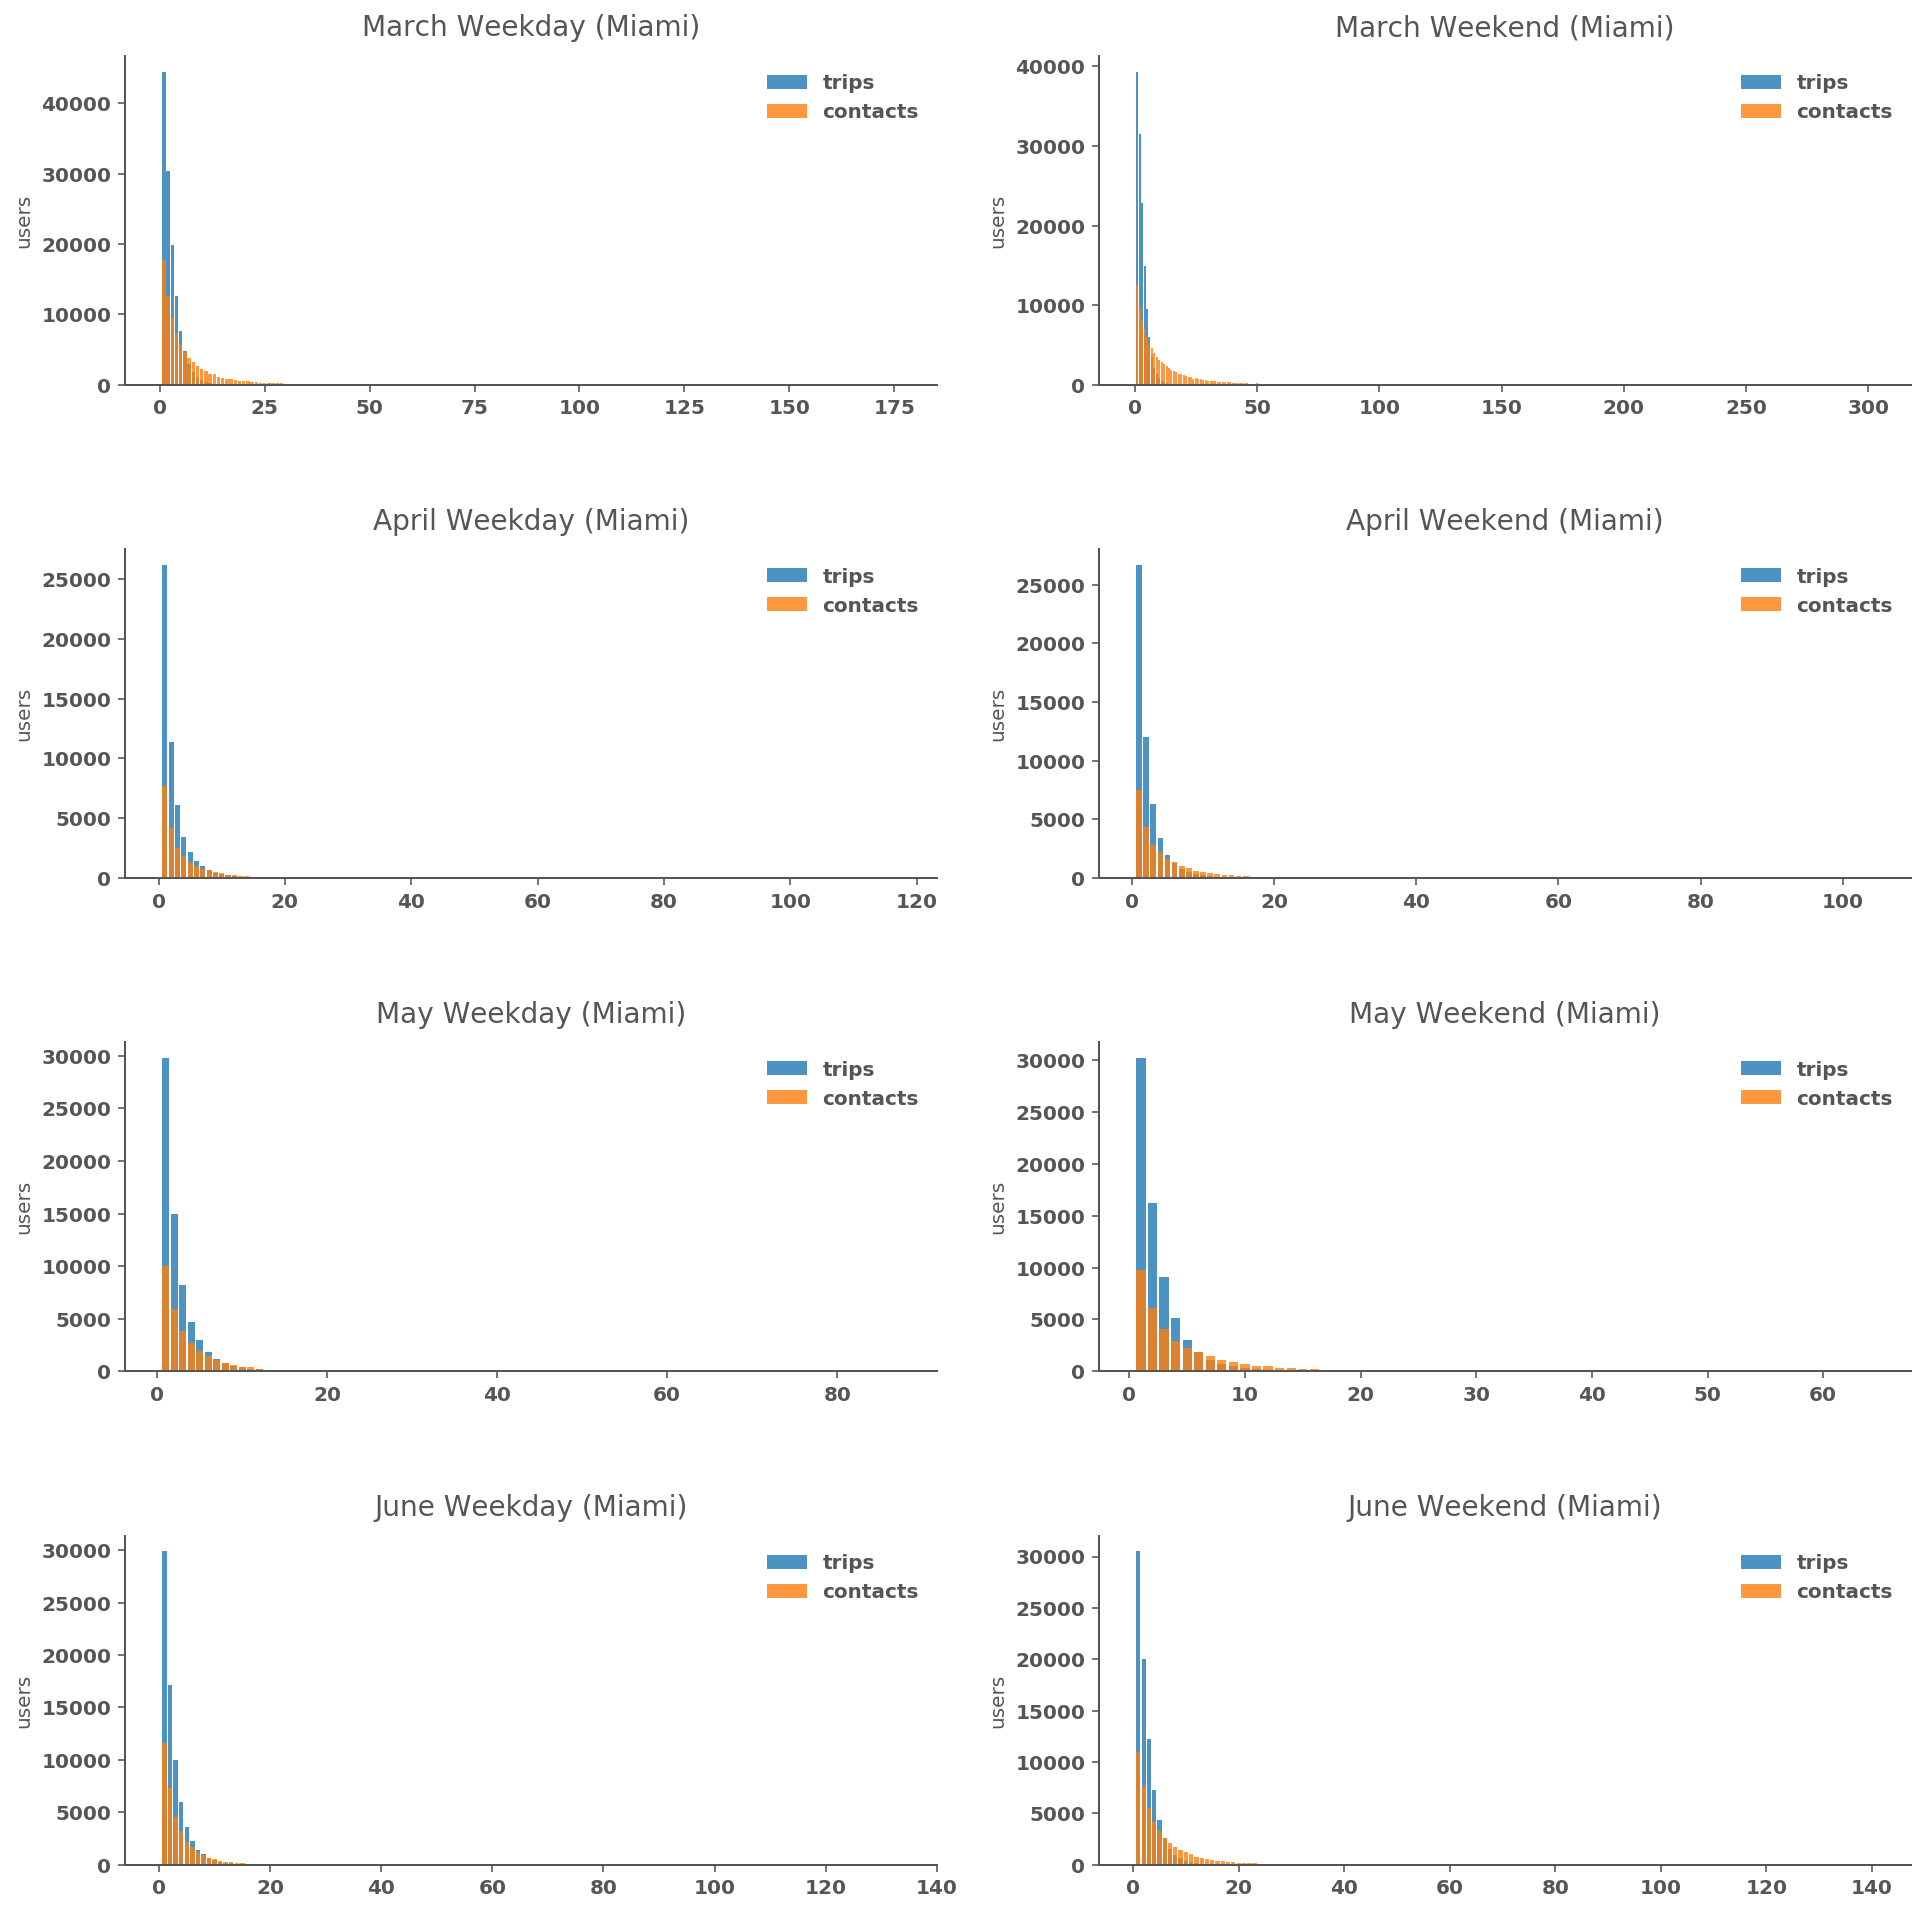

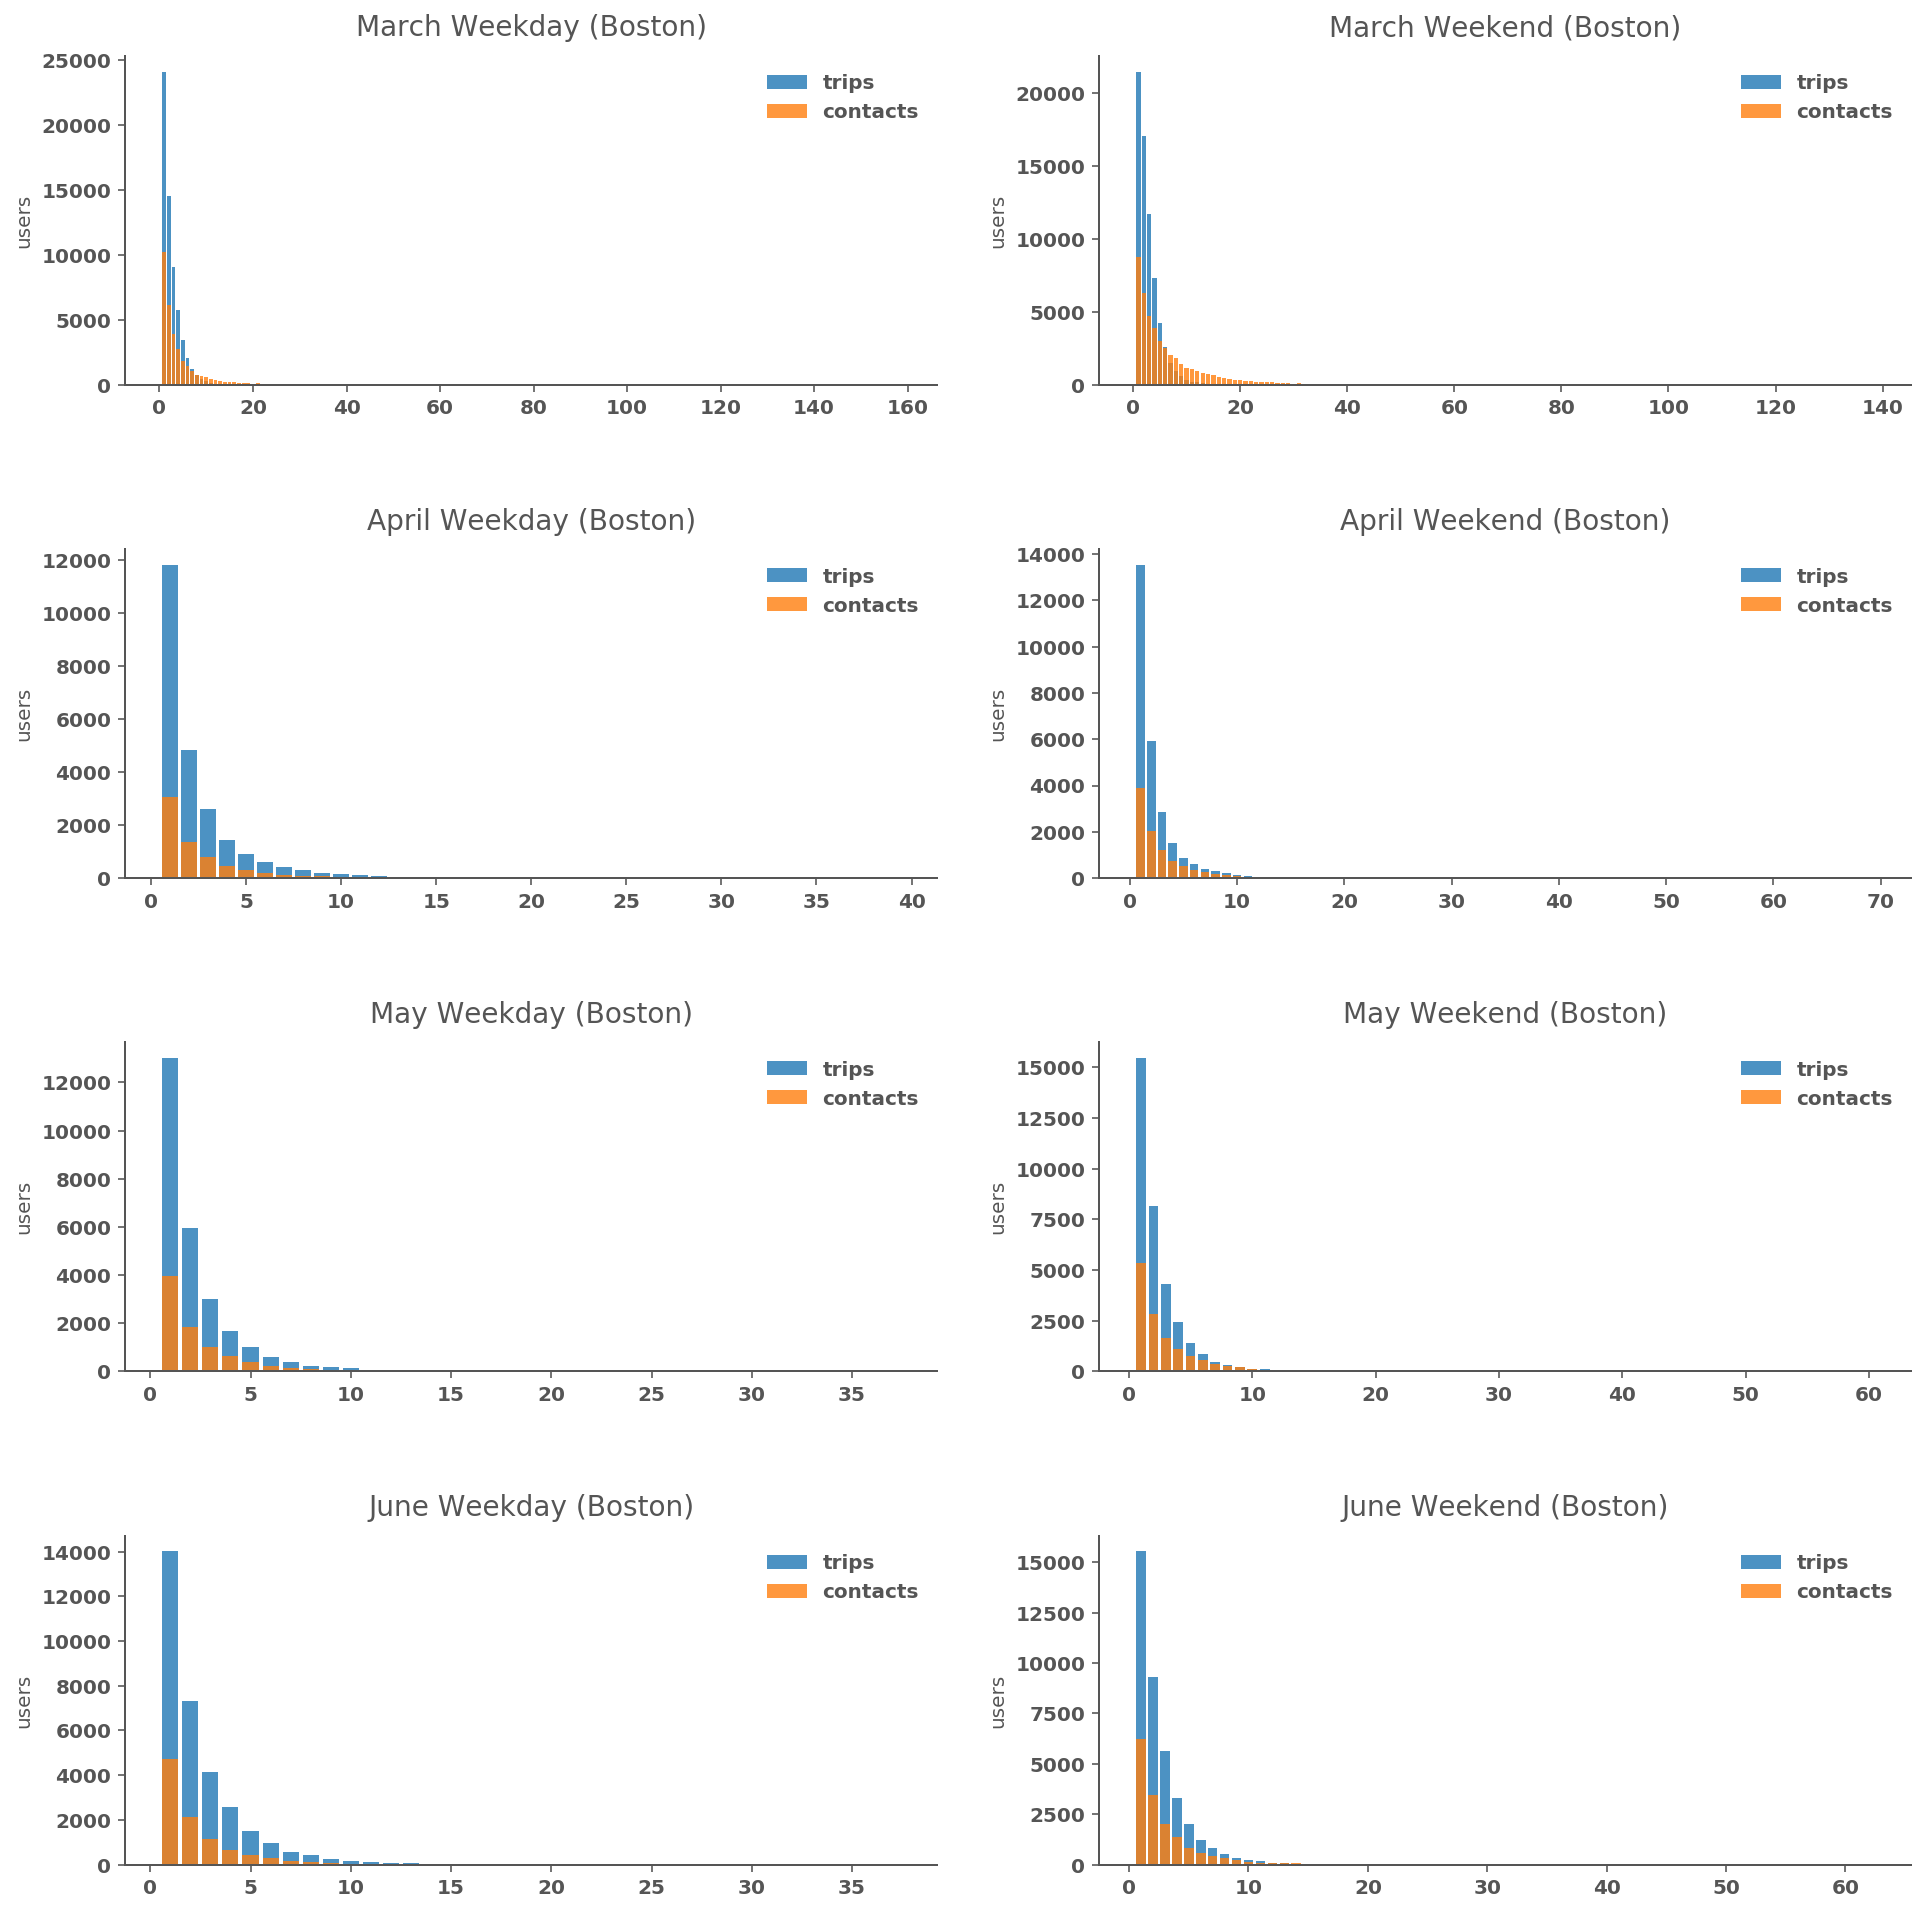

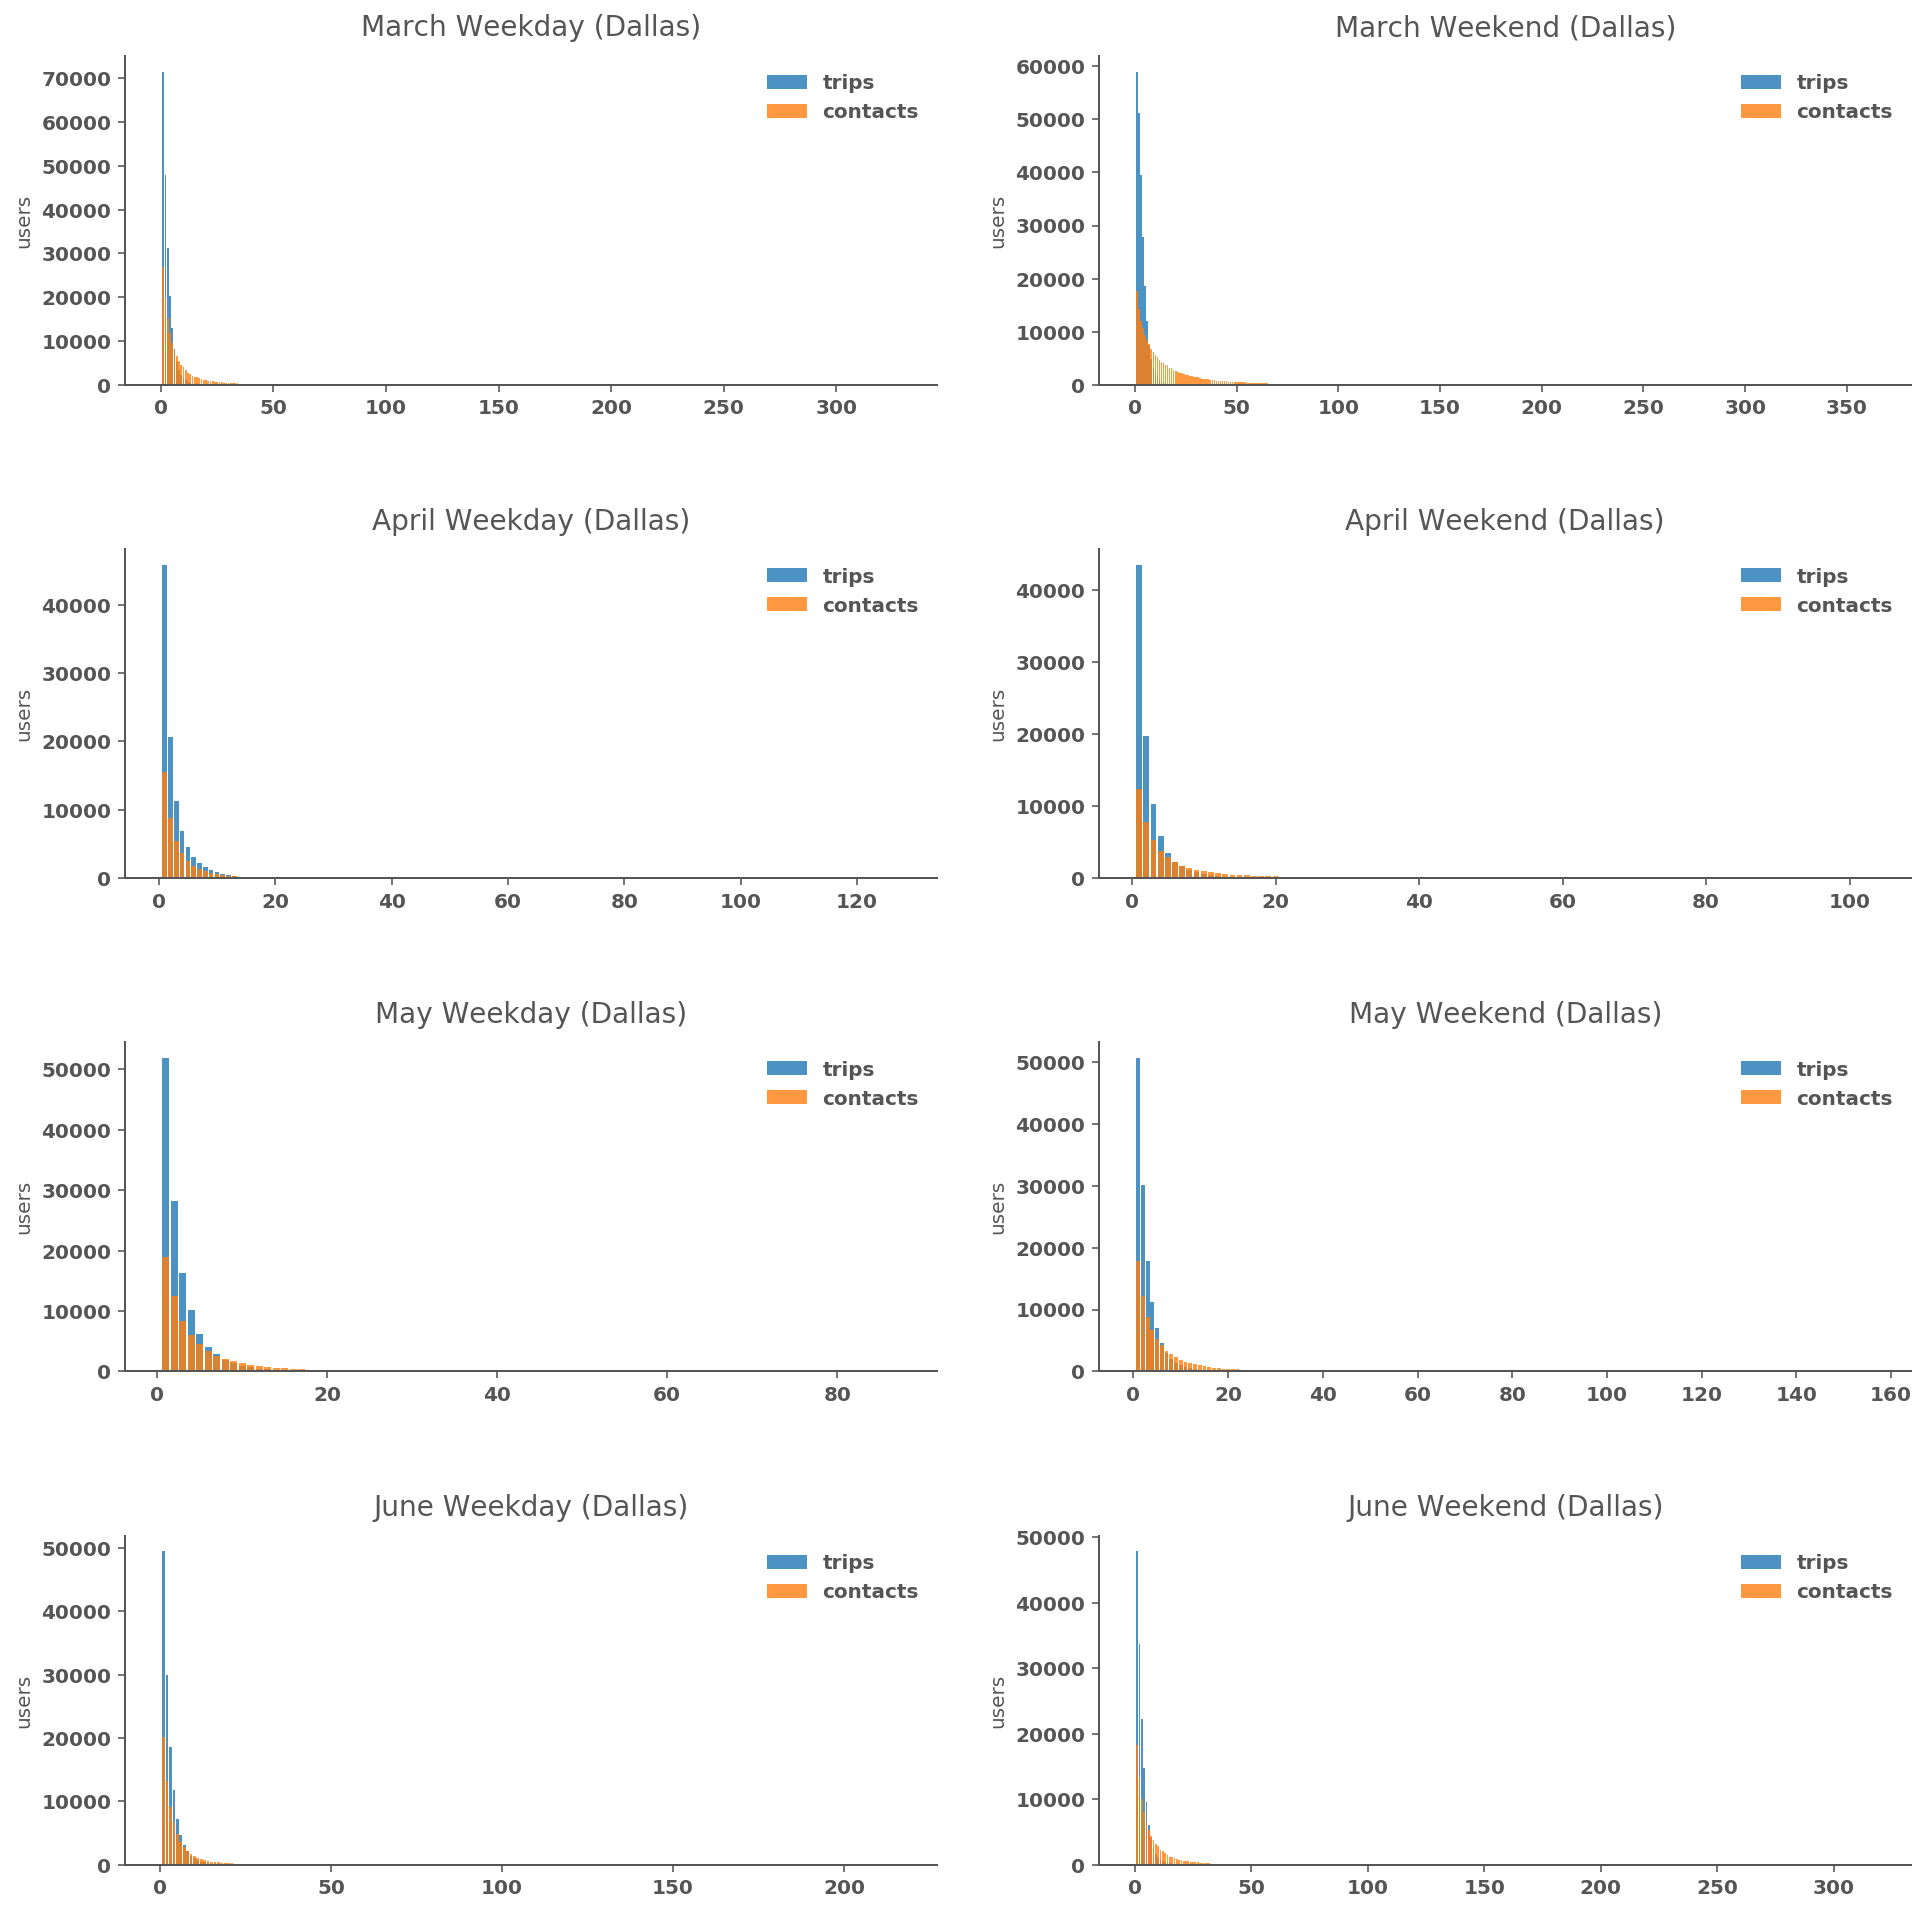

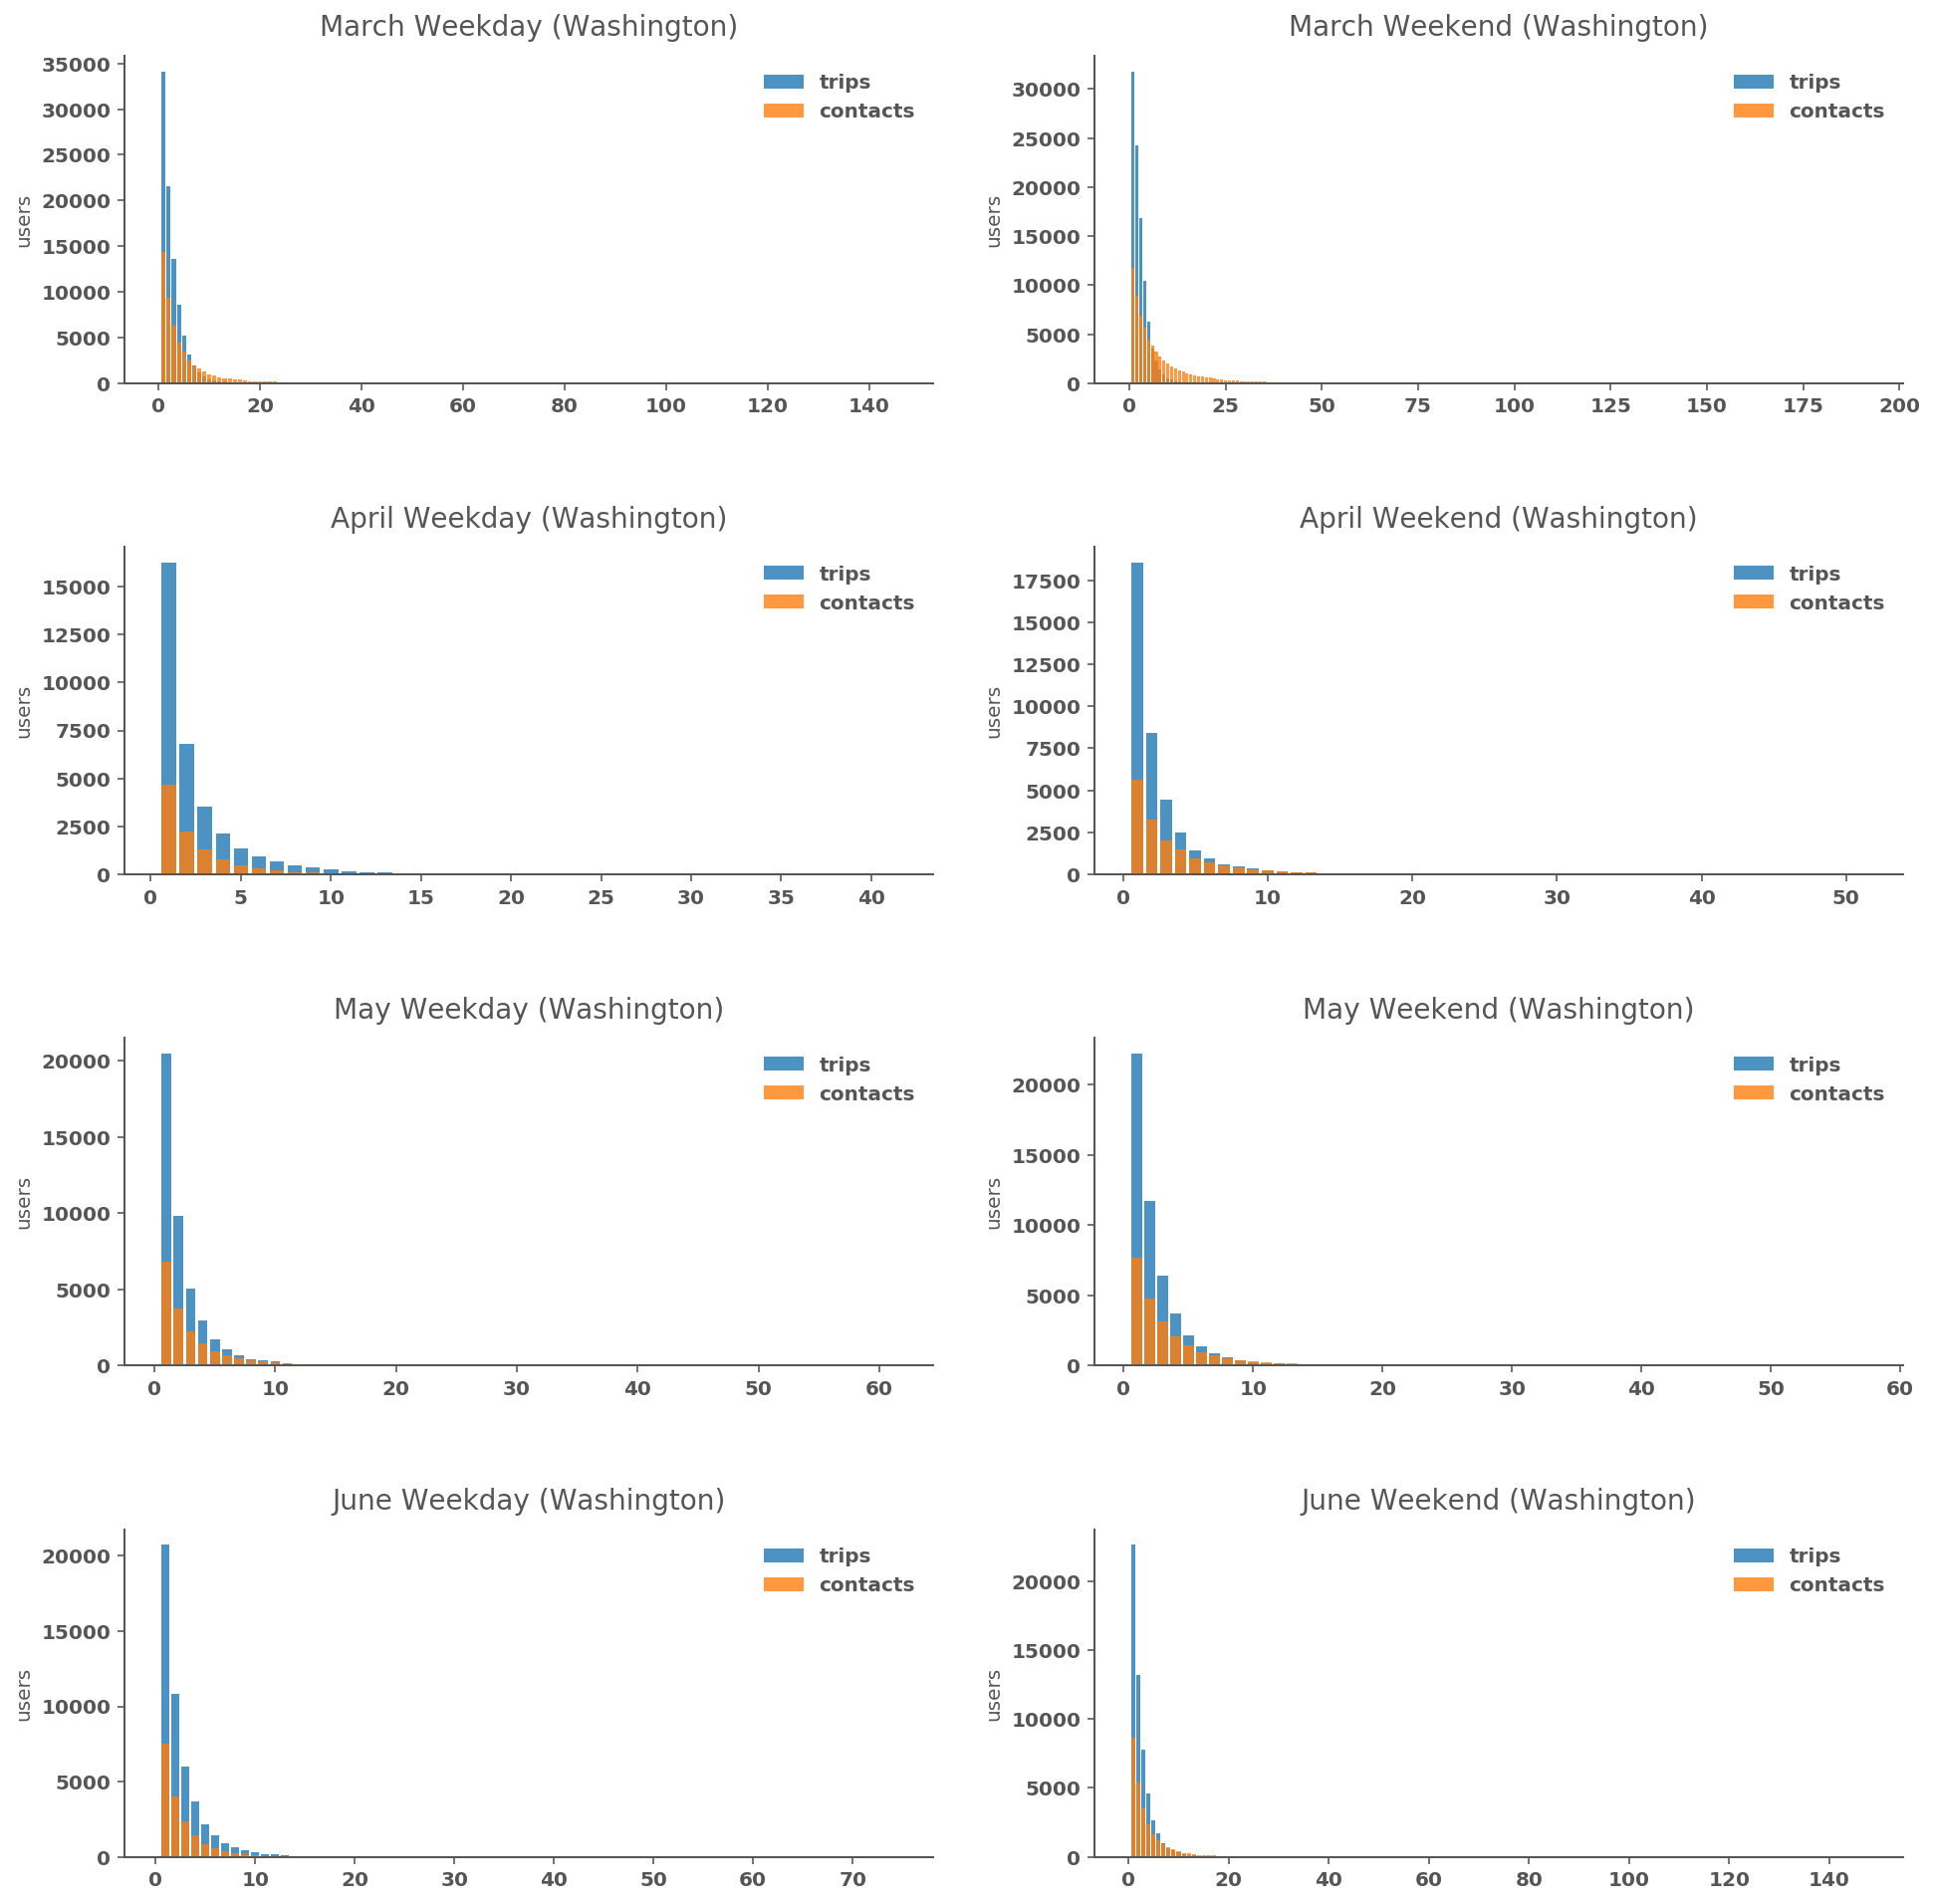

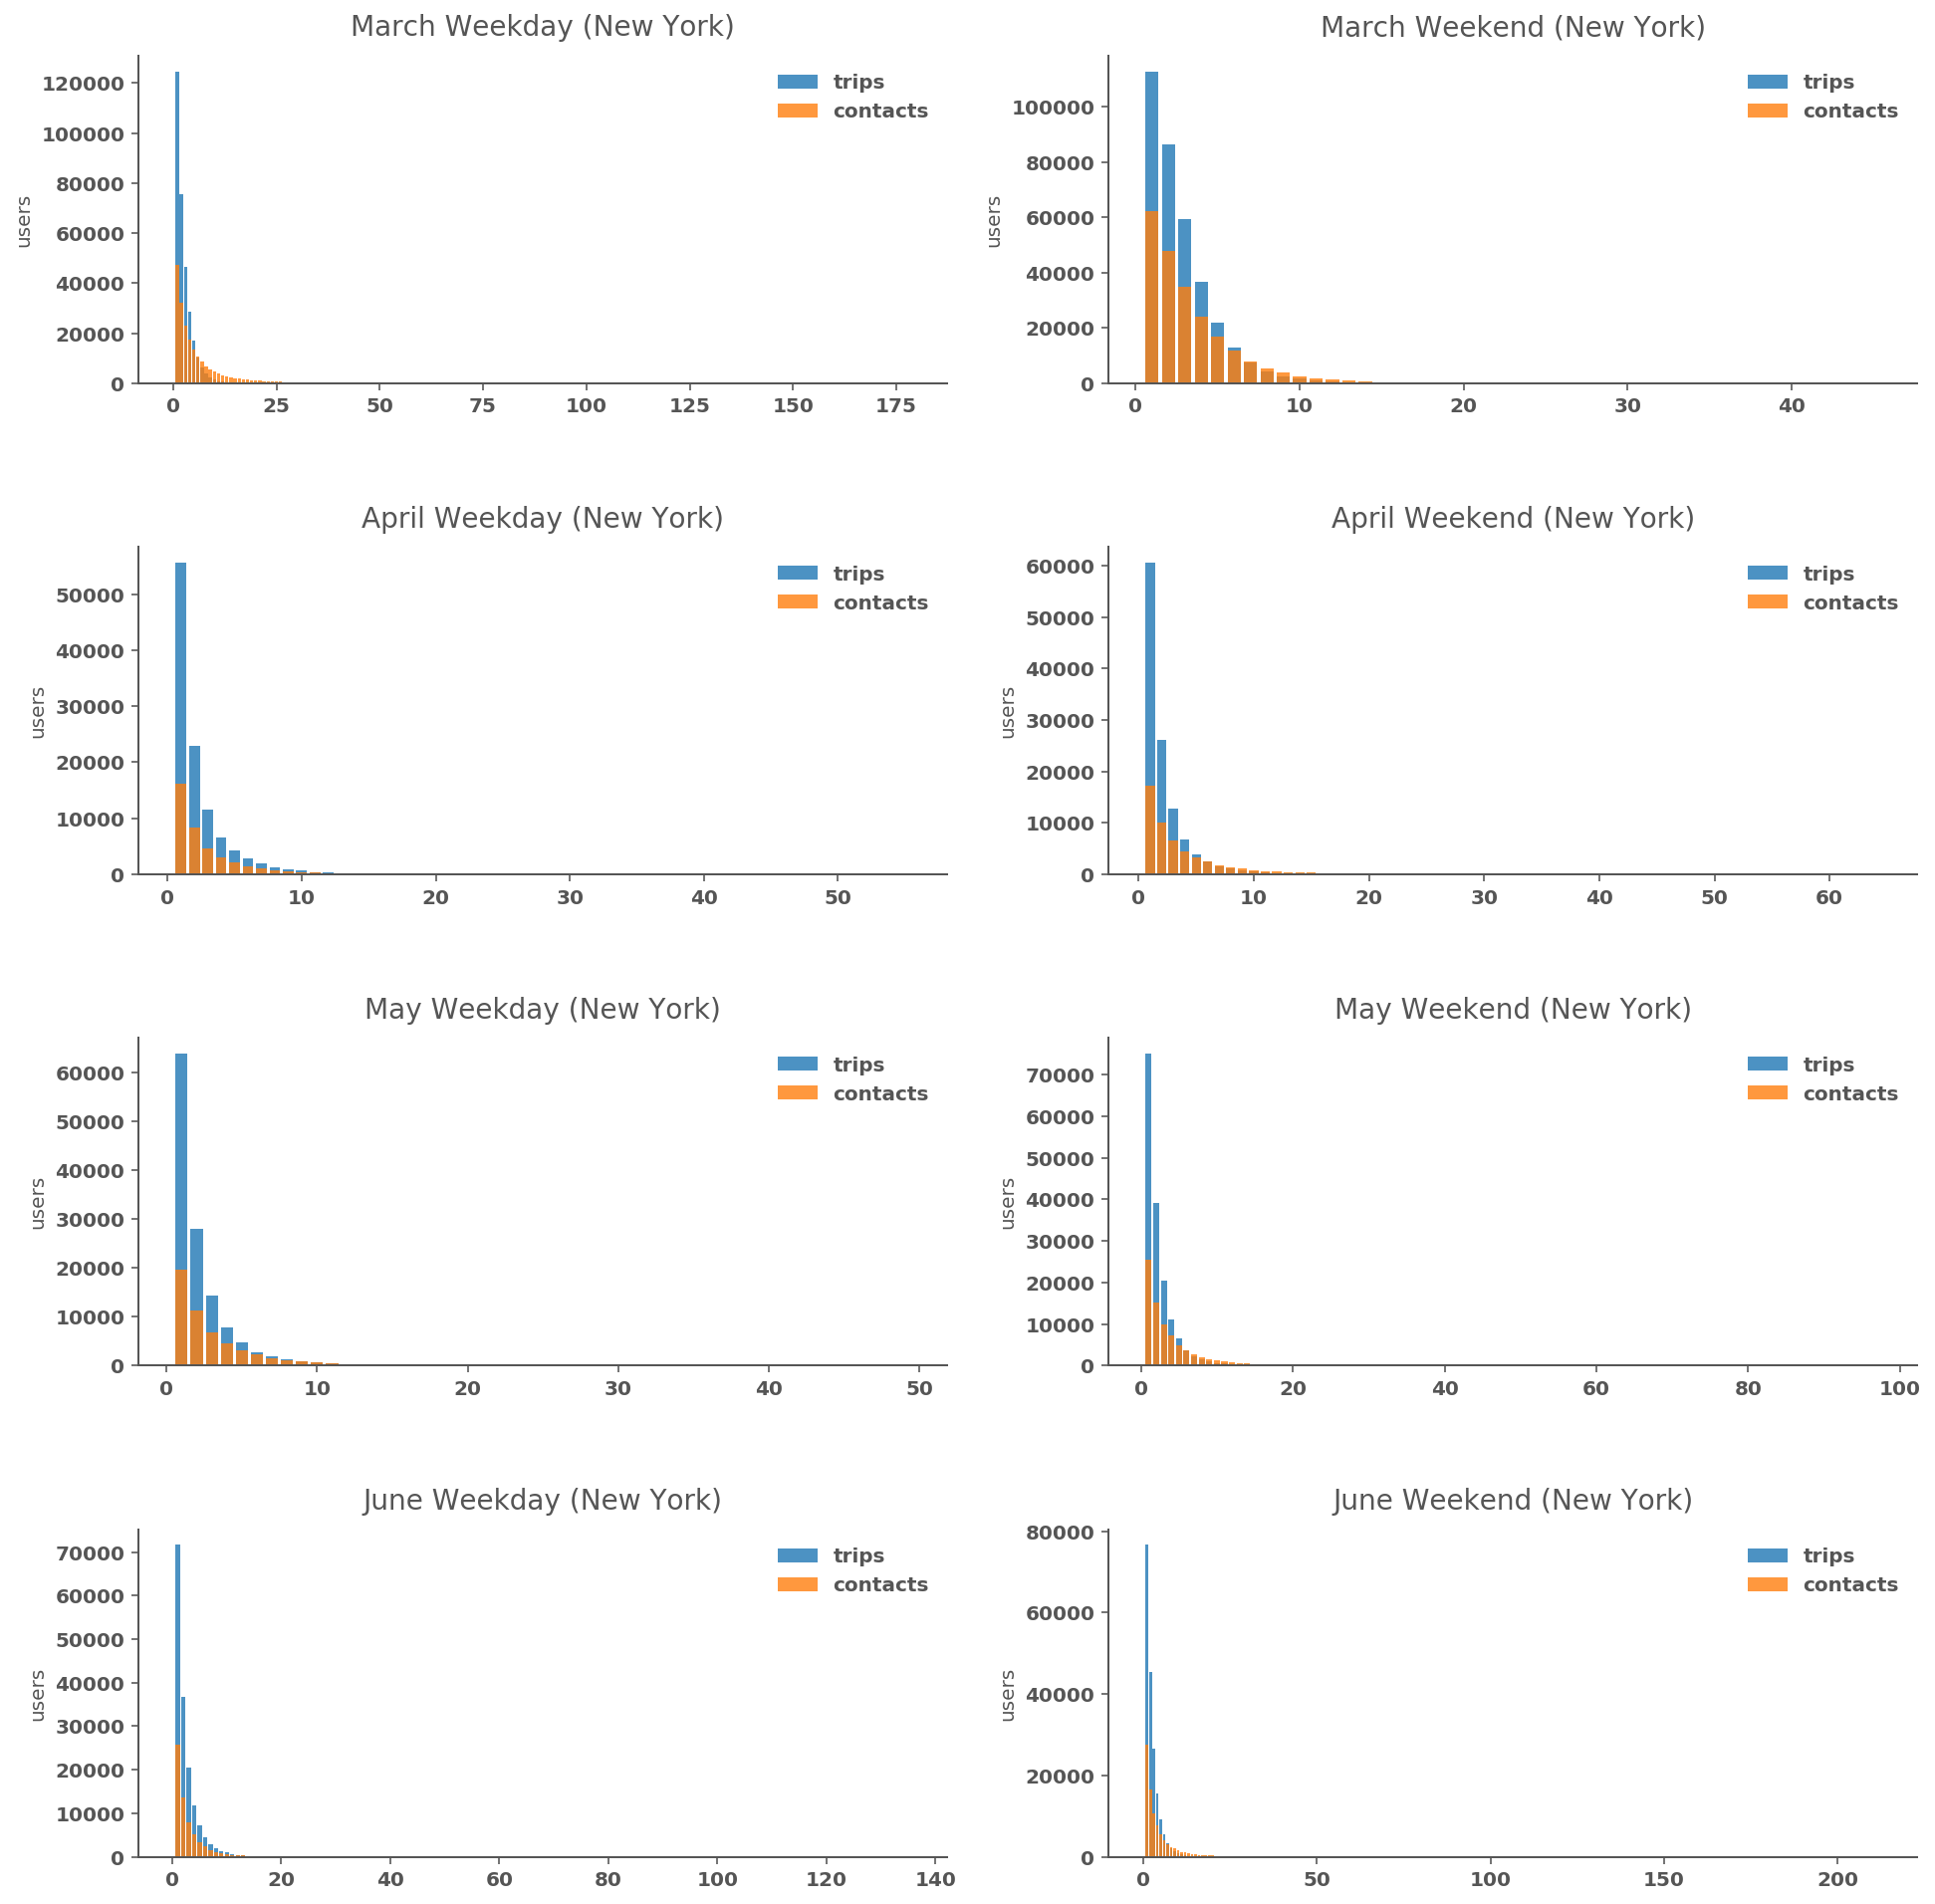

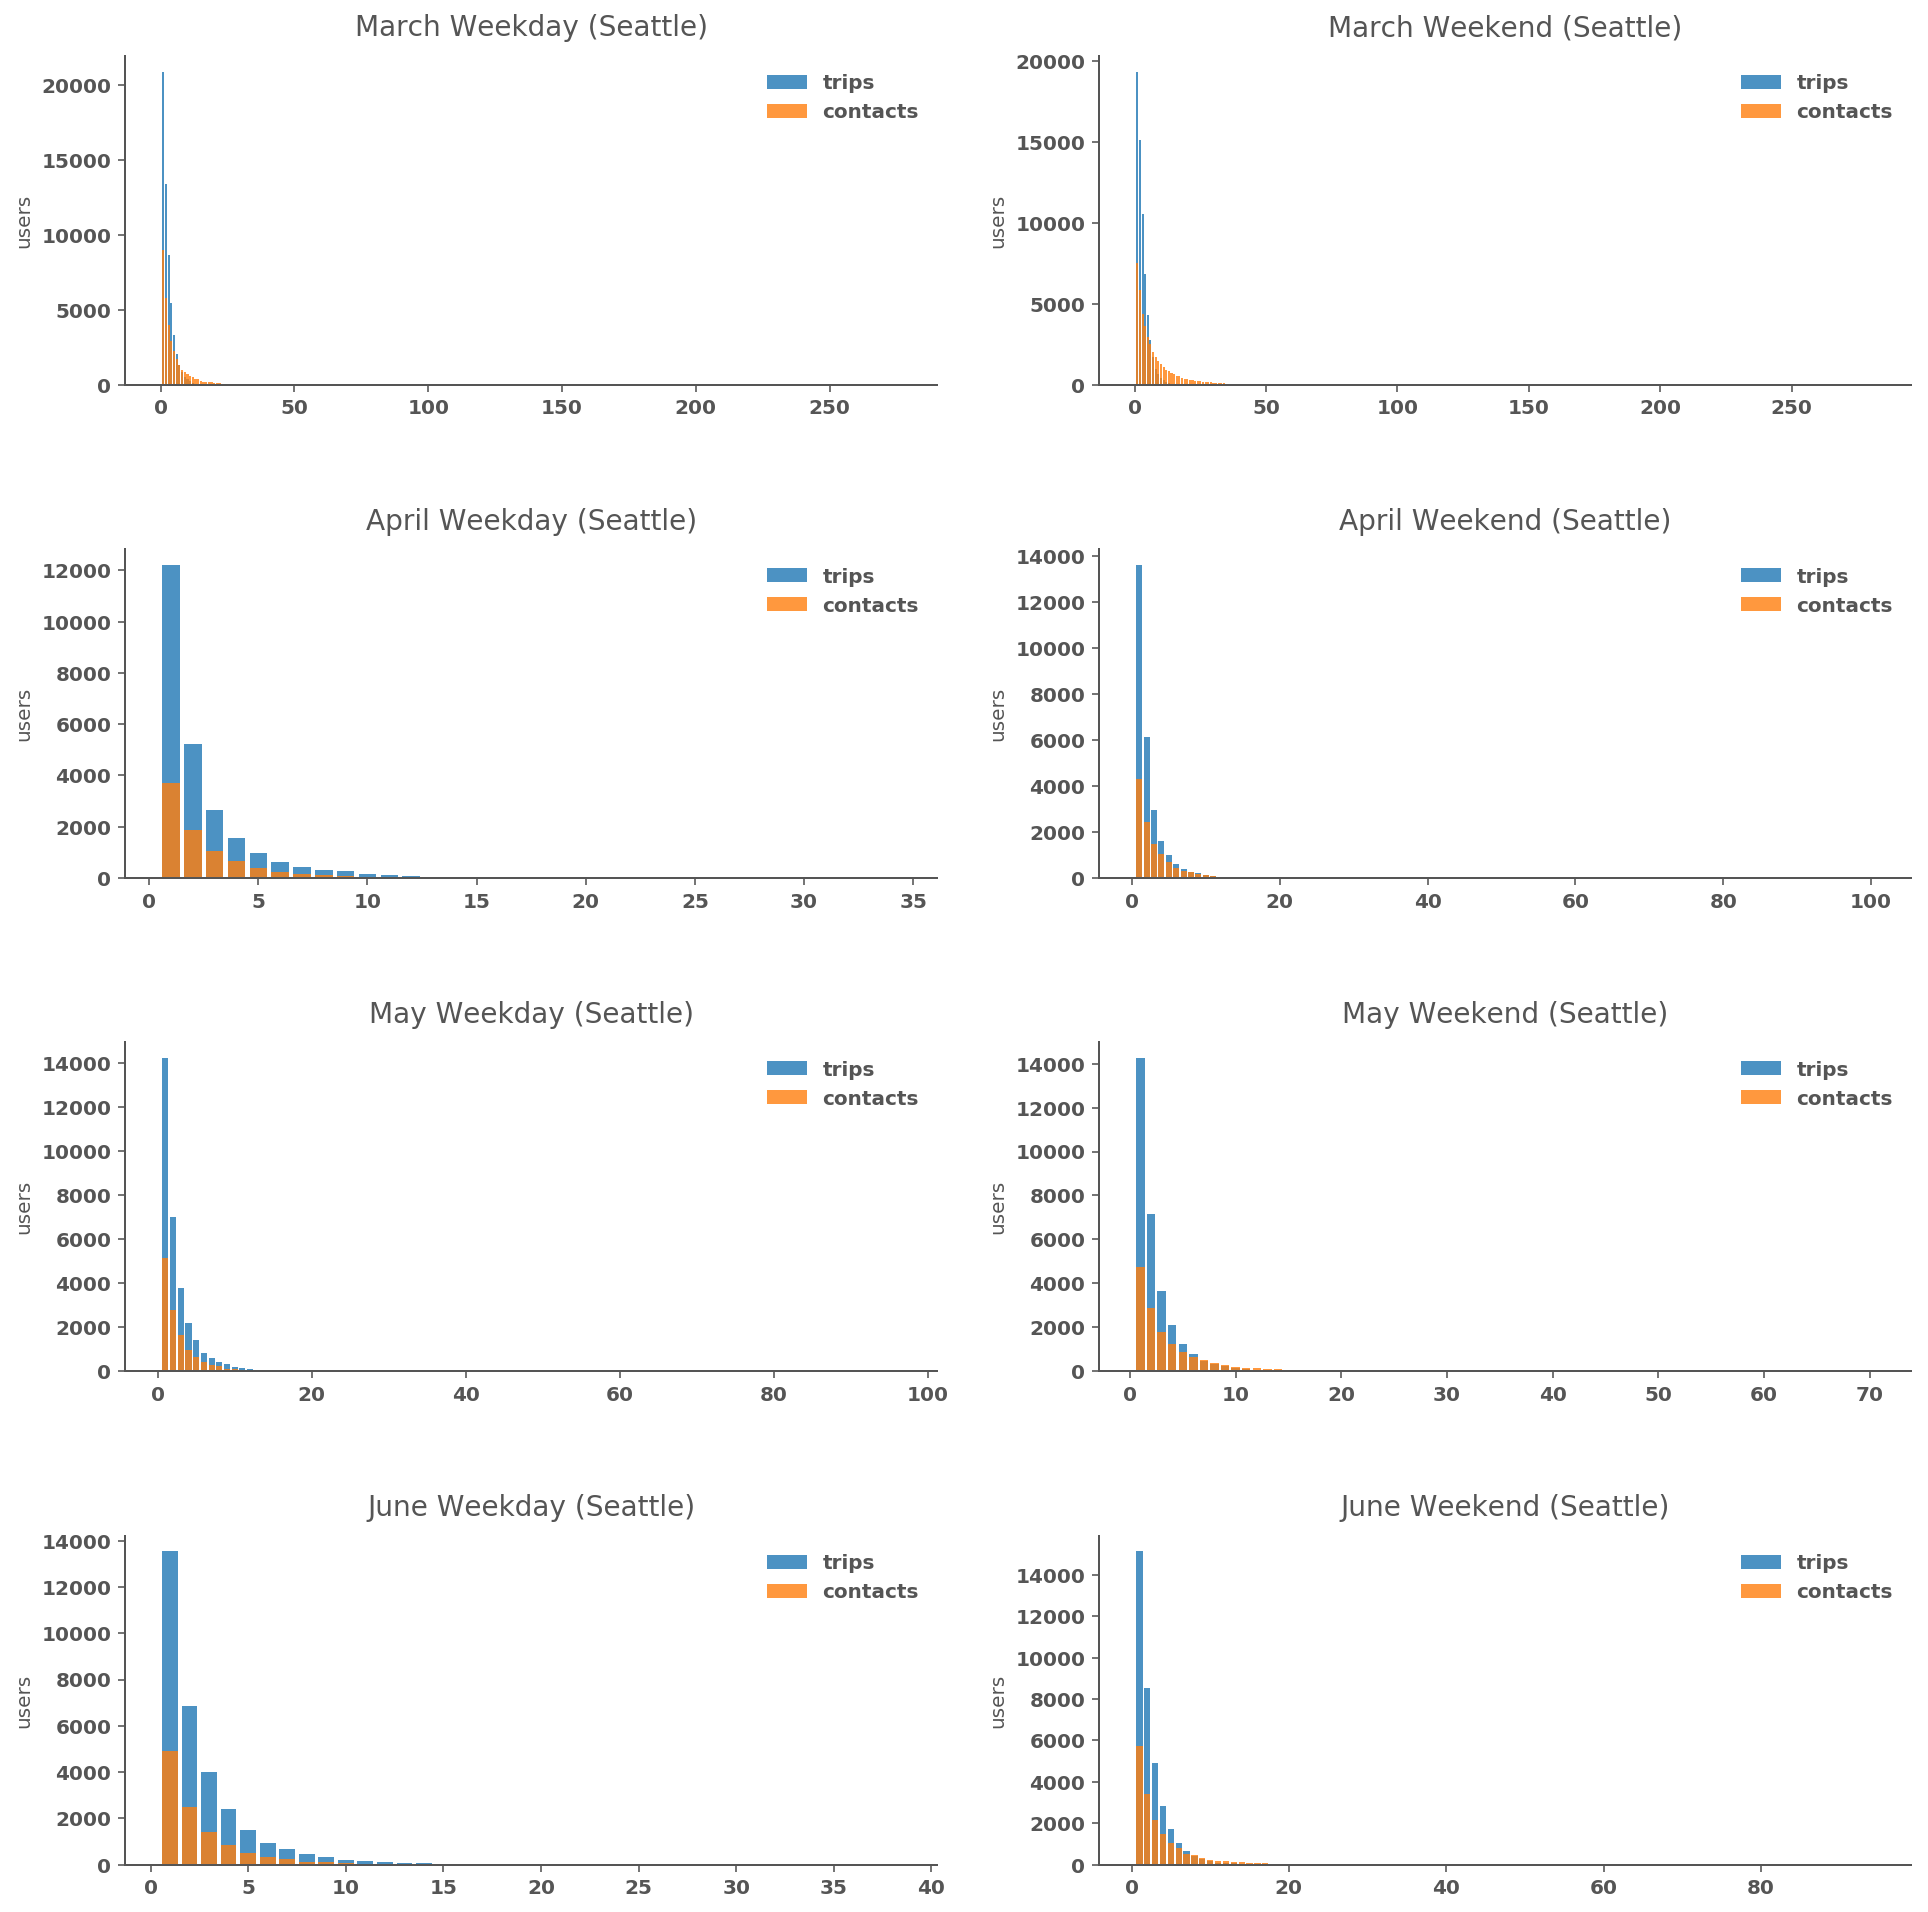

In [206]:
# Plot just the first  weekday  and first weekend  of each month
# Month: Weekday, Month: Weekend

ncols=2
nrows=len(months)

# for metro in ['Boston']:
for metro in metro_area_to_id.keys():
    day_trips = metro_day_trips[metro]
    day_contacts = metro_day_contacts[metro]

    figure, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows*4))
    plt.subplots_adjust(hspace=0.5)
    
    months_names = {3: 'March', 4: 'April', 5: 'May', 6:'June'}
    for m, (month, month_name) in enumerate(months_names.items()):
        plotted_weekday = False
        plotted_weekend = False
        for d, date in enumerate(months_days[month]):
            dt = datetime.datetime.strptime(date, date_fmt)
            is_weekday = dt.isoweekday() in range(1,6)
            if is_weekday and plotted_weekday:
                continue
            if not is_weekday and plotted_weekend:
                continue
                
            if is_weekday:
                plotted_weekday = True
                ax = axes.flat[m*2+0]
                title = '%s Weekday (%s)' % (month_name, metro)
            else:
                plotted_weekend = True
                ax = axes.flat[m*2+1]
                title = '%s Weekend (%s)' % (month_name, metro)
            
            trips_df  = day_trips[date]
            contacts_df  = day_contacts[date]

            ax.bar(trips_df[TRIPS],
                trips_df[USER_COUNT],
                alpha=0.8,
               label='trips',
               color='#1f77b4'
              )

            ax.bar(contacts_df[CONTACTS],
                contacts_df[USER_COUNT],
                alpha=0.8,
               label='contacts',
               color=u'#ff7f0e'
              )
            ax.set_title(title)
            ax.set_ylabel('users')
            ax.legend()
            ax.margins(0.05)
            ax.get_figure().set_facecolor('w')
    plt.show()

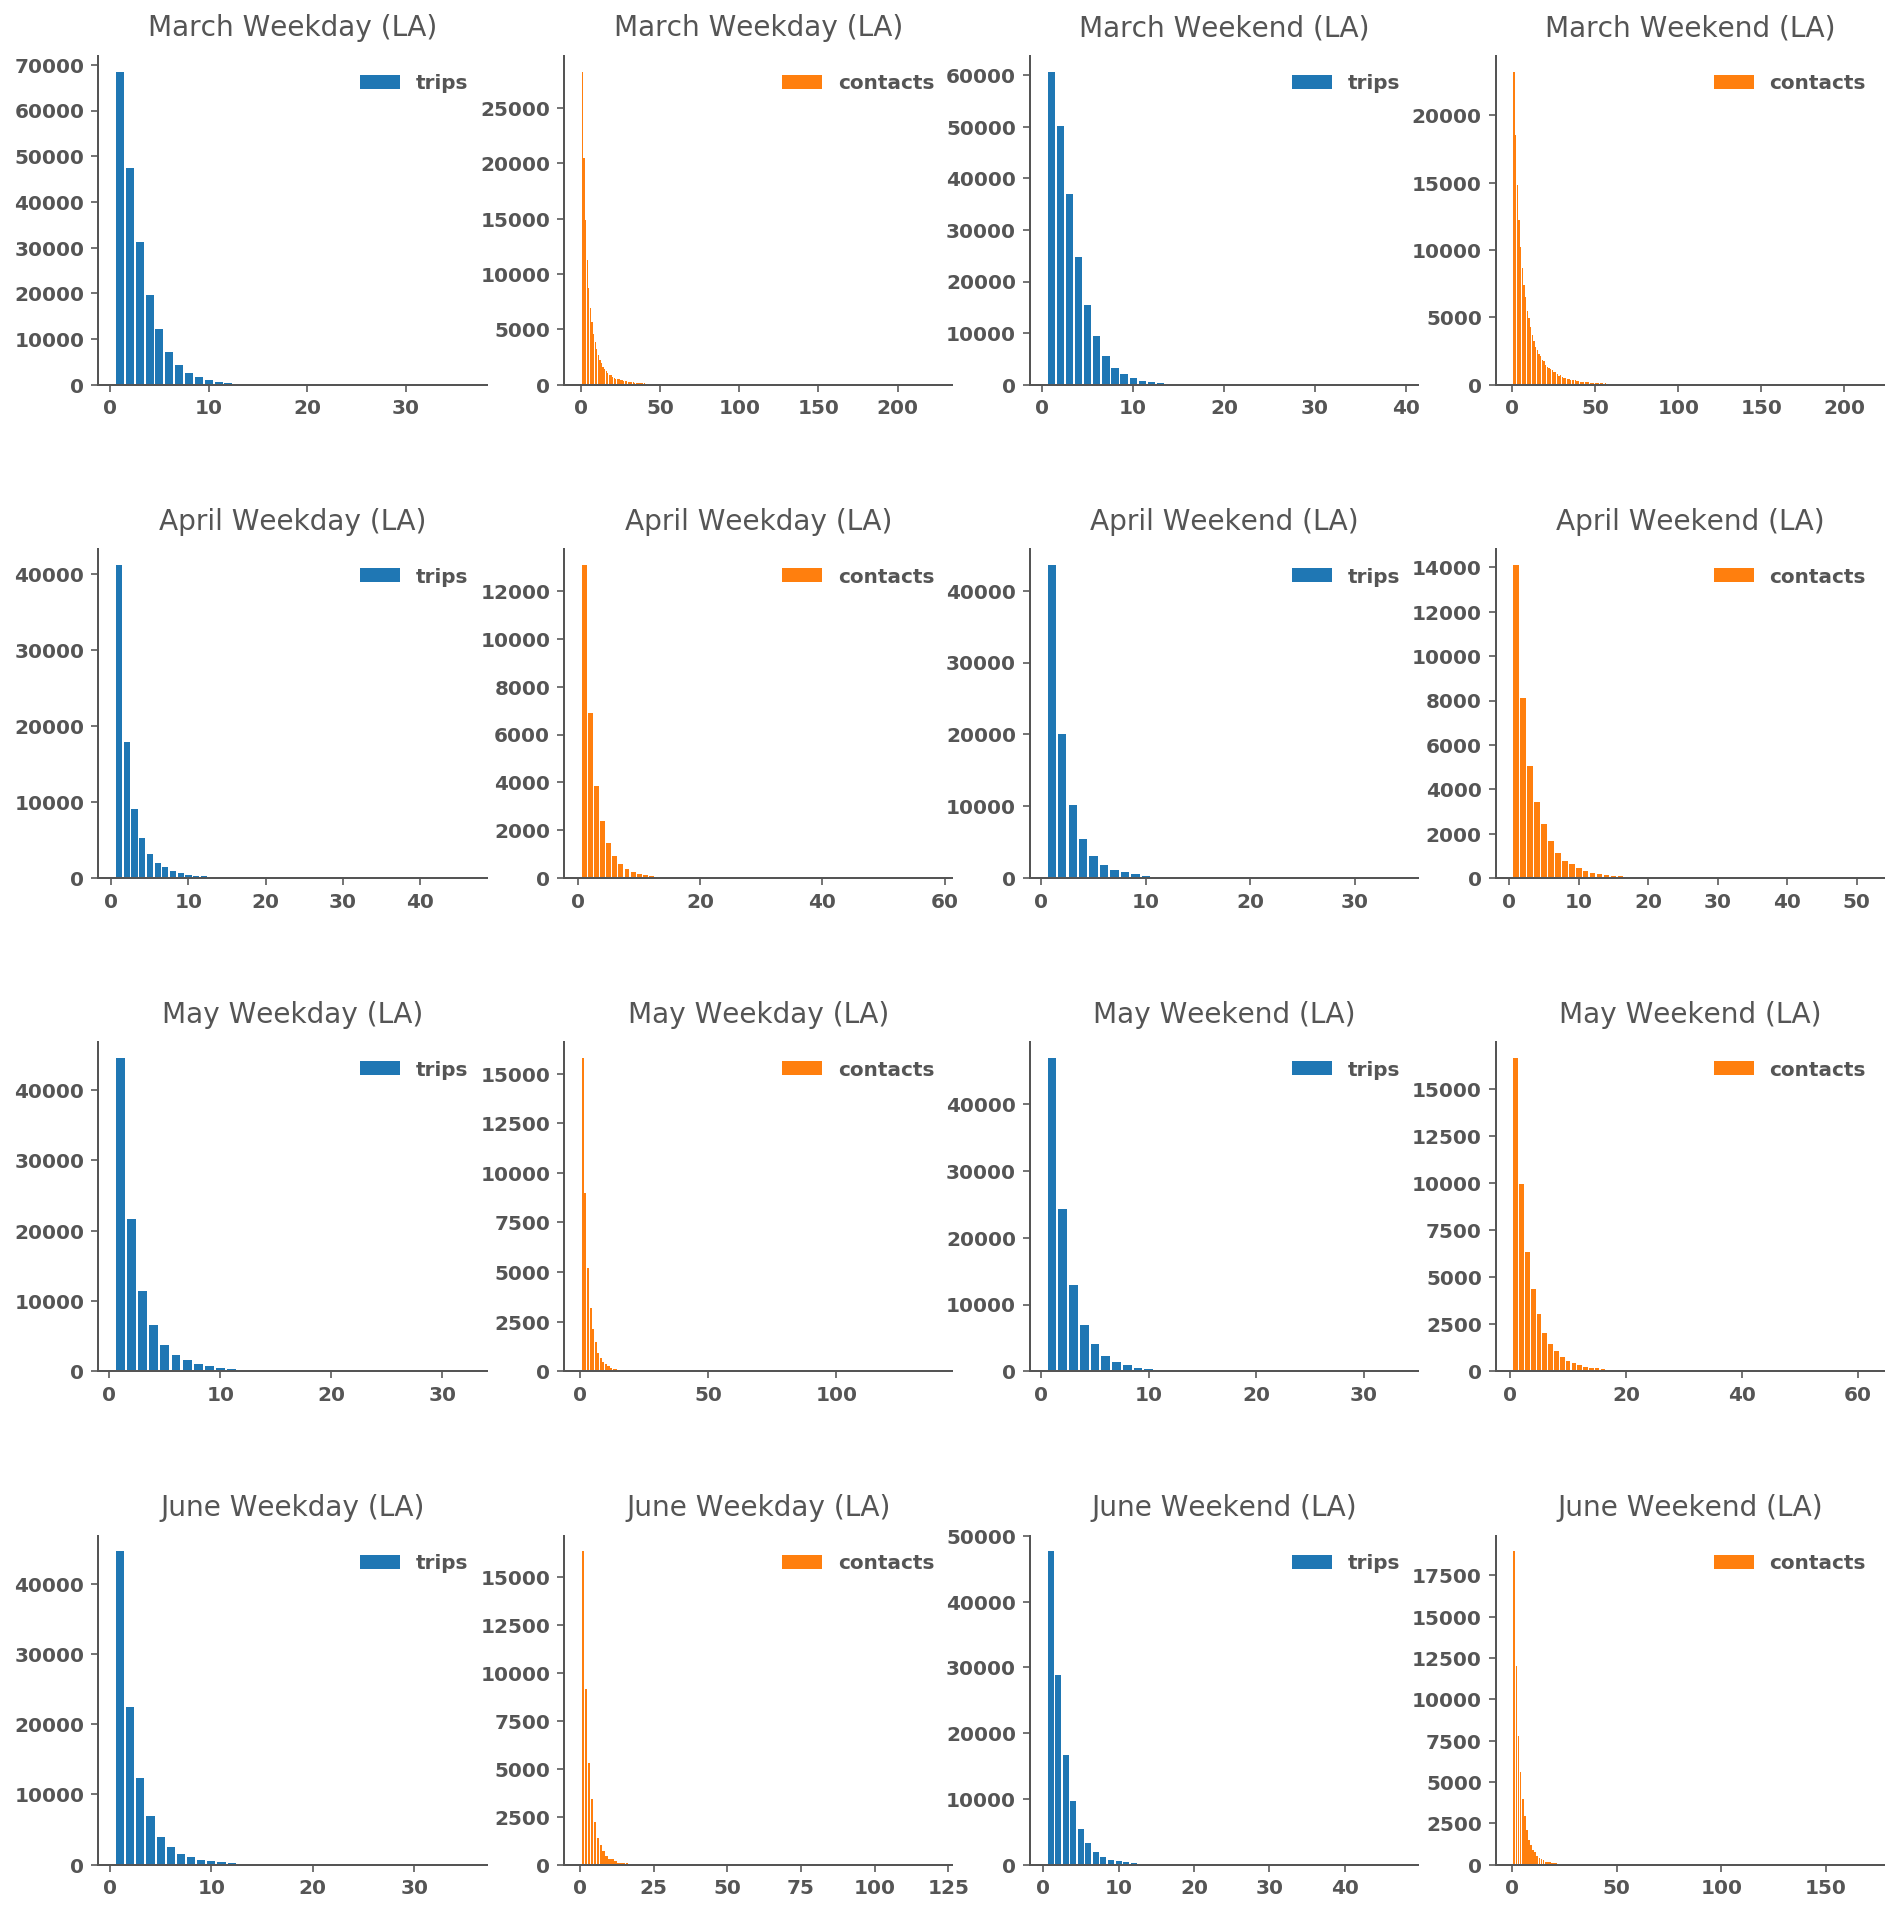

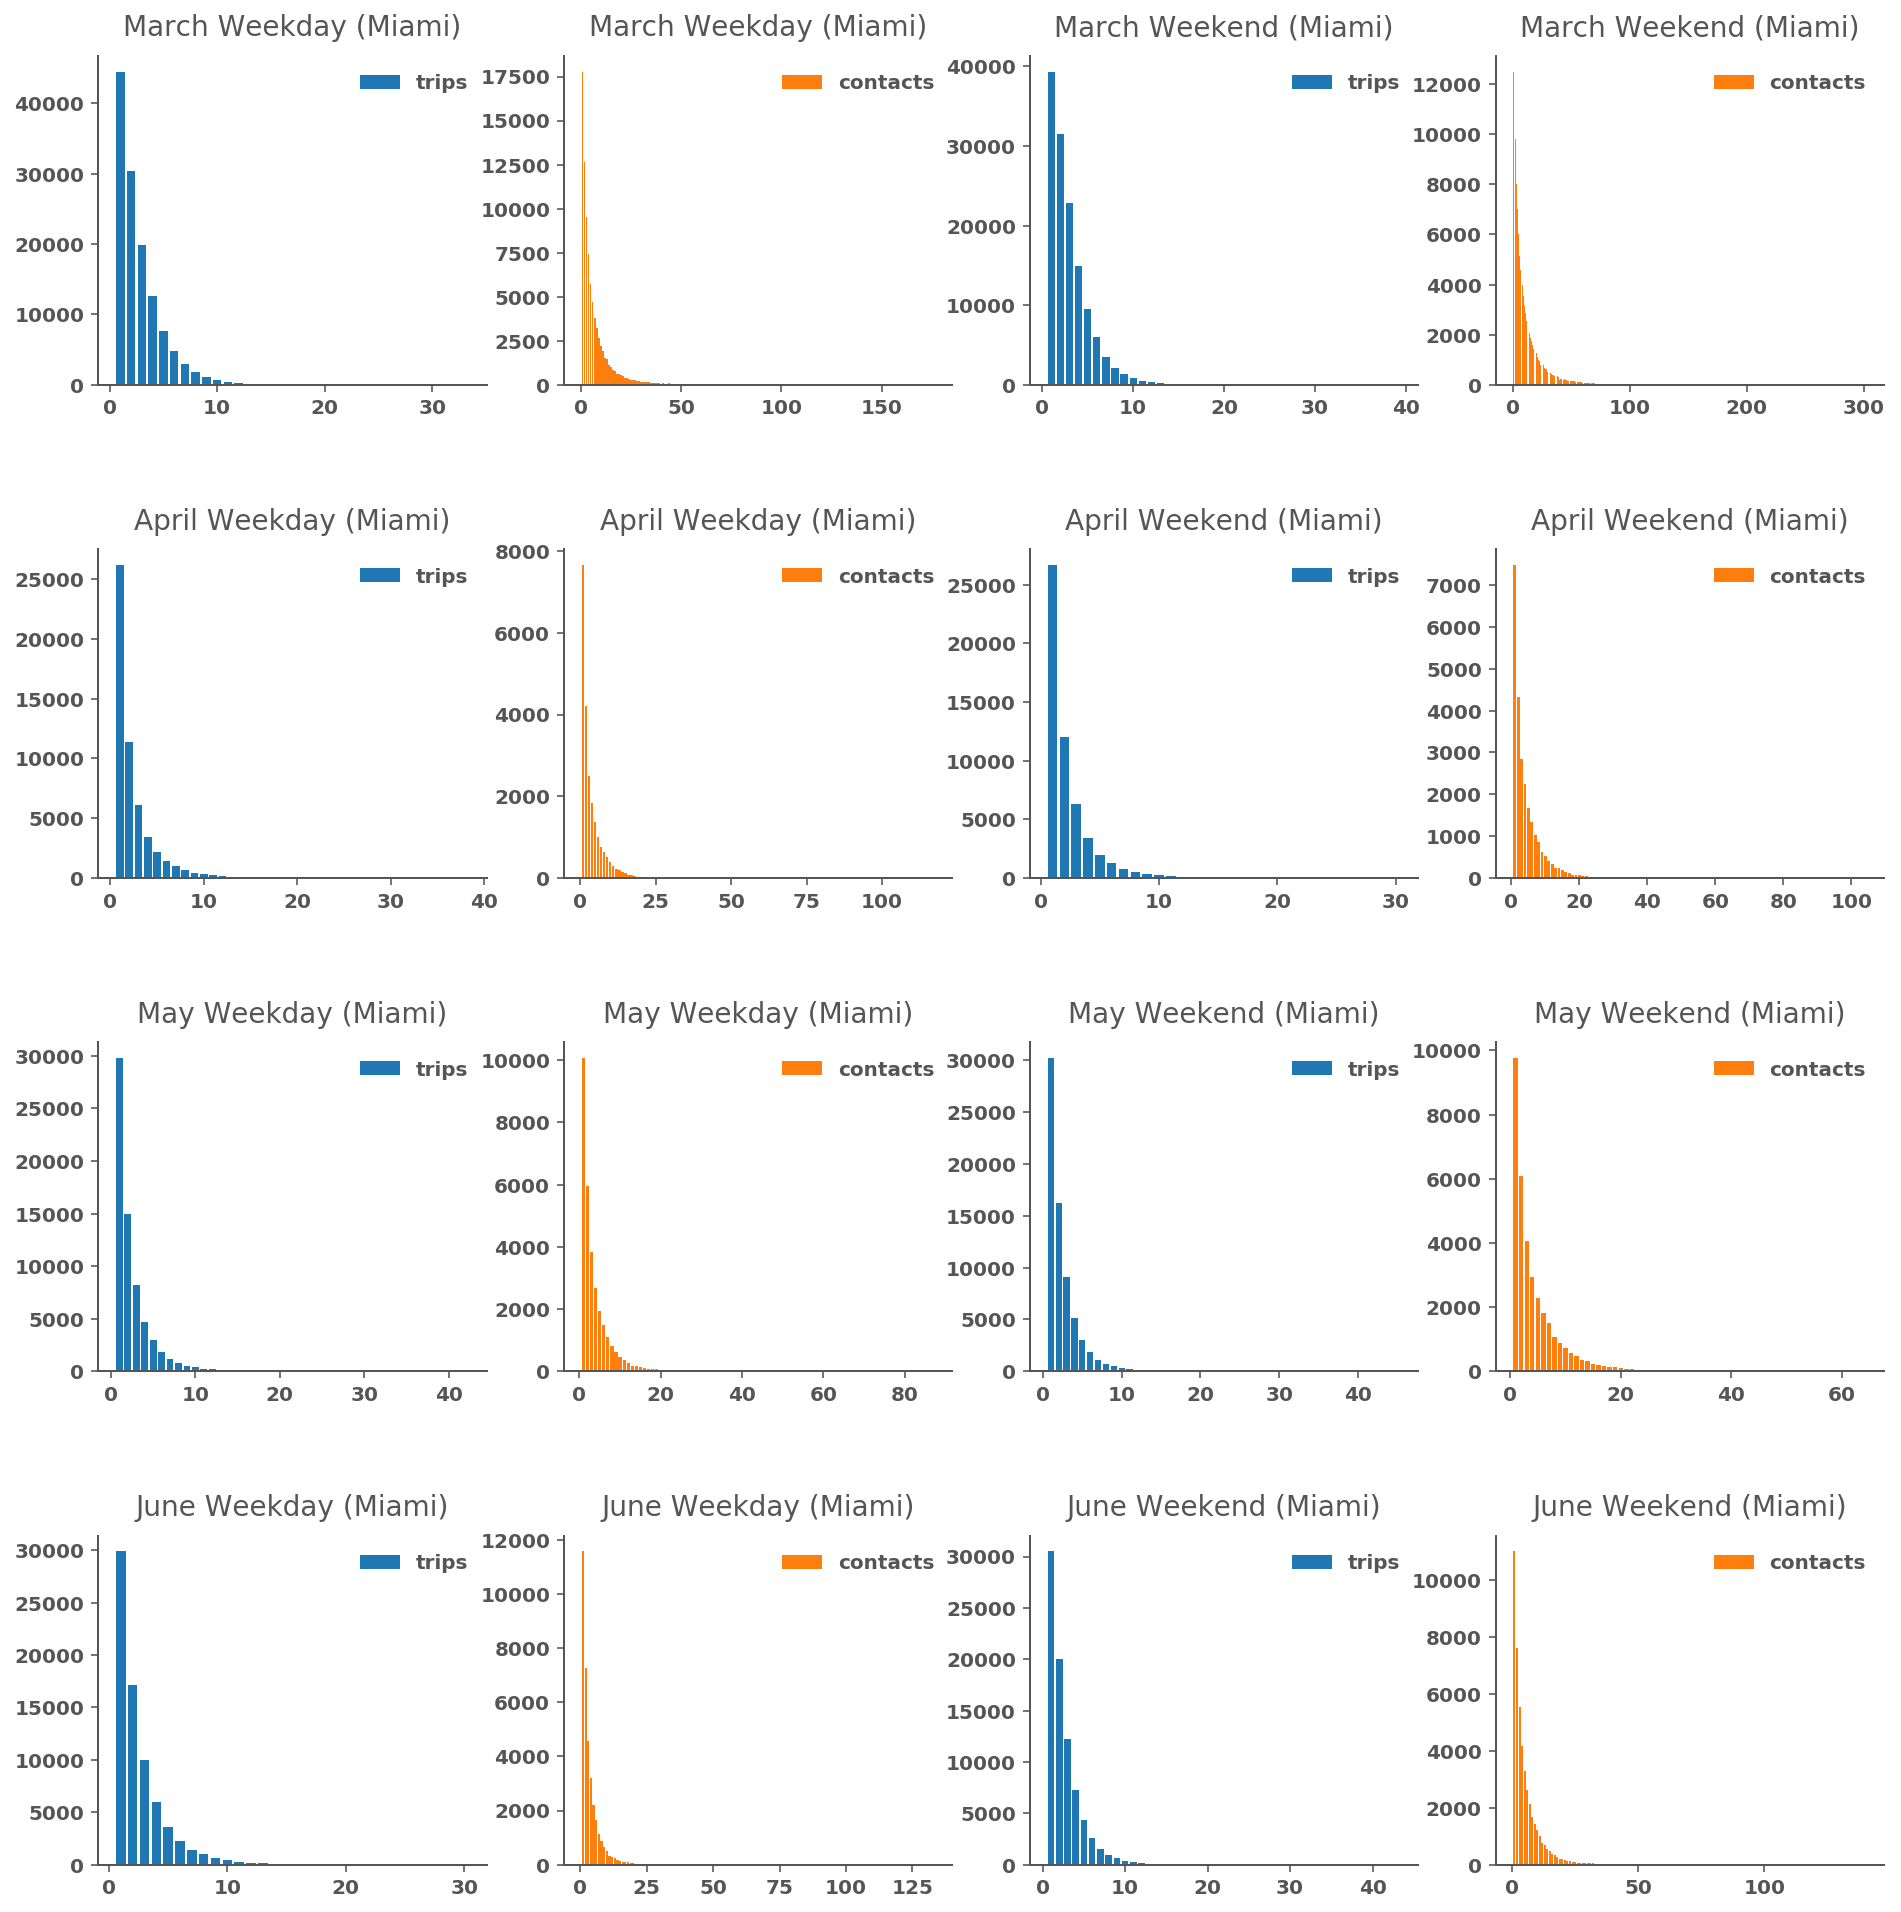

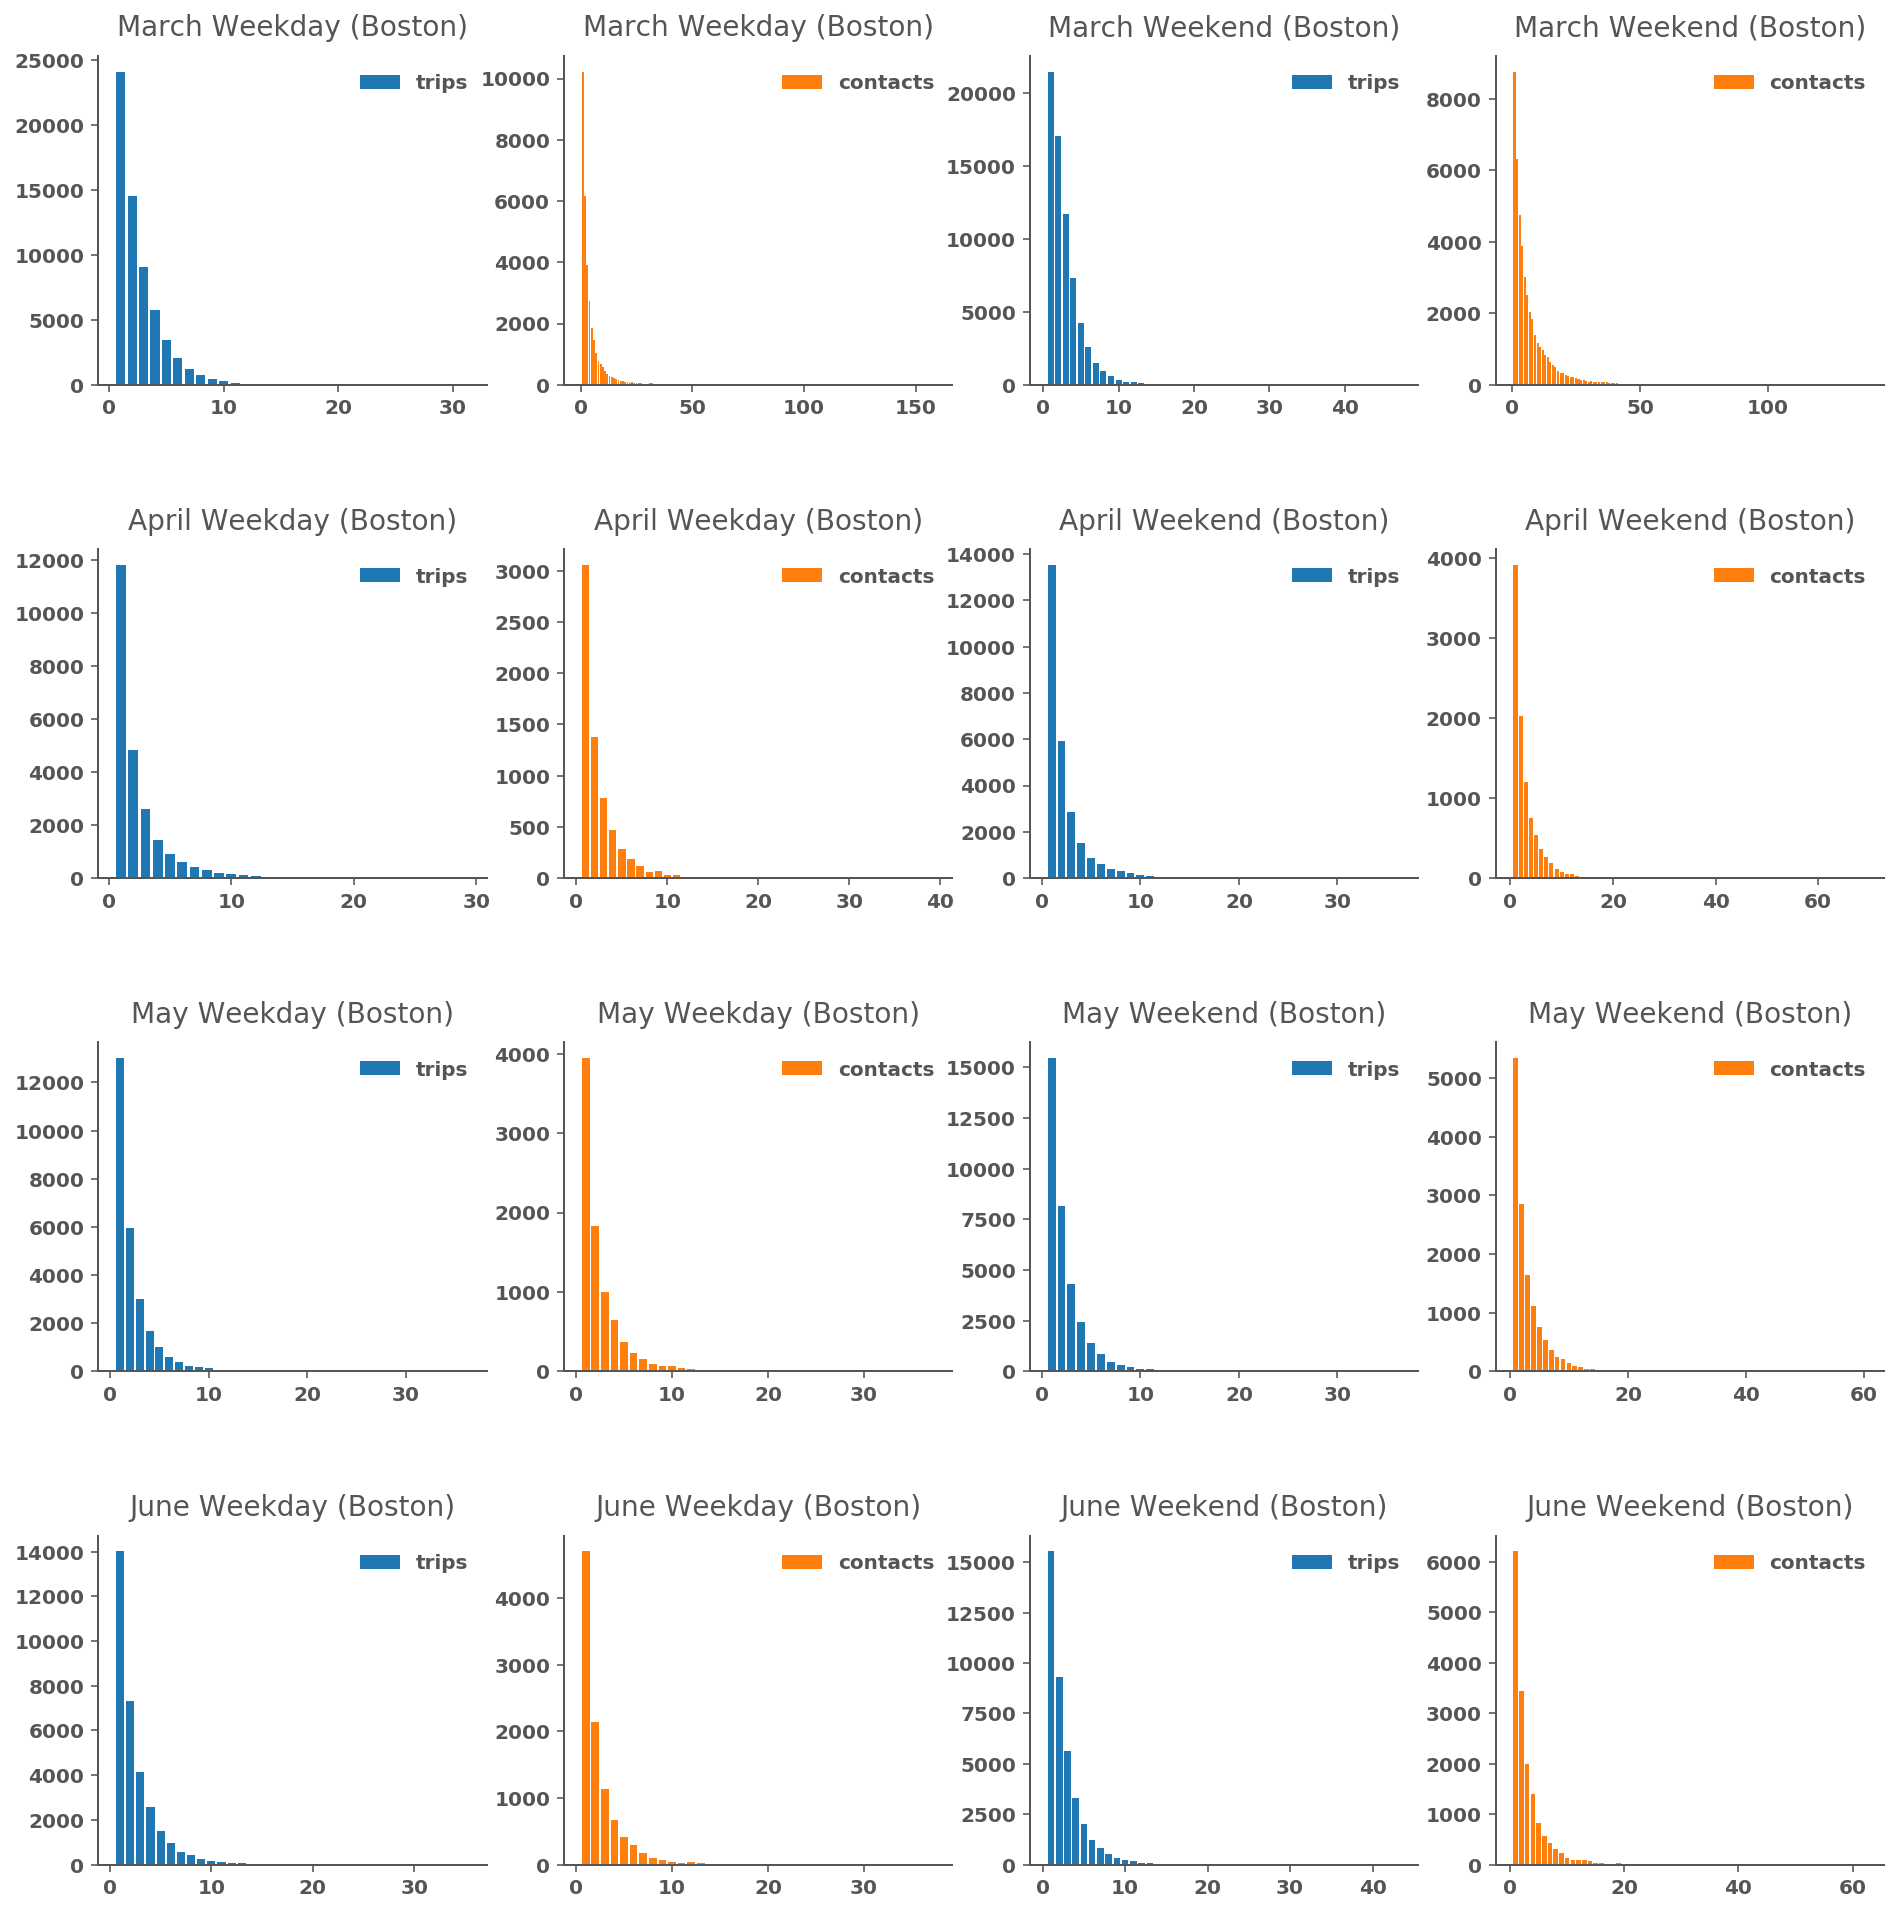

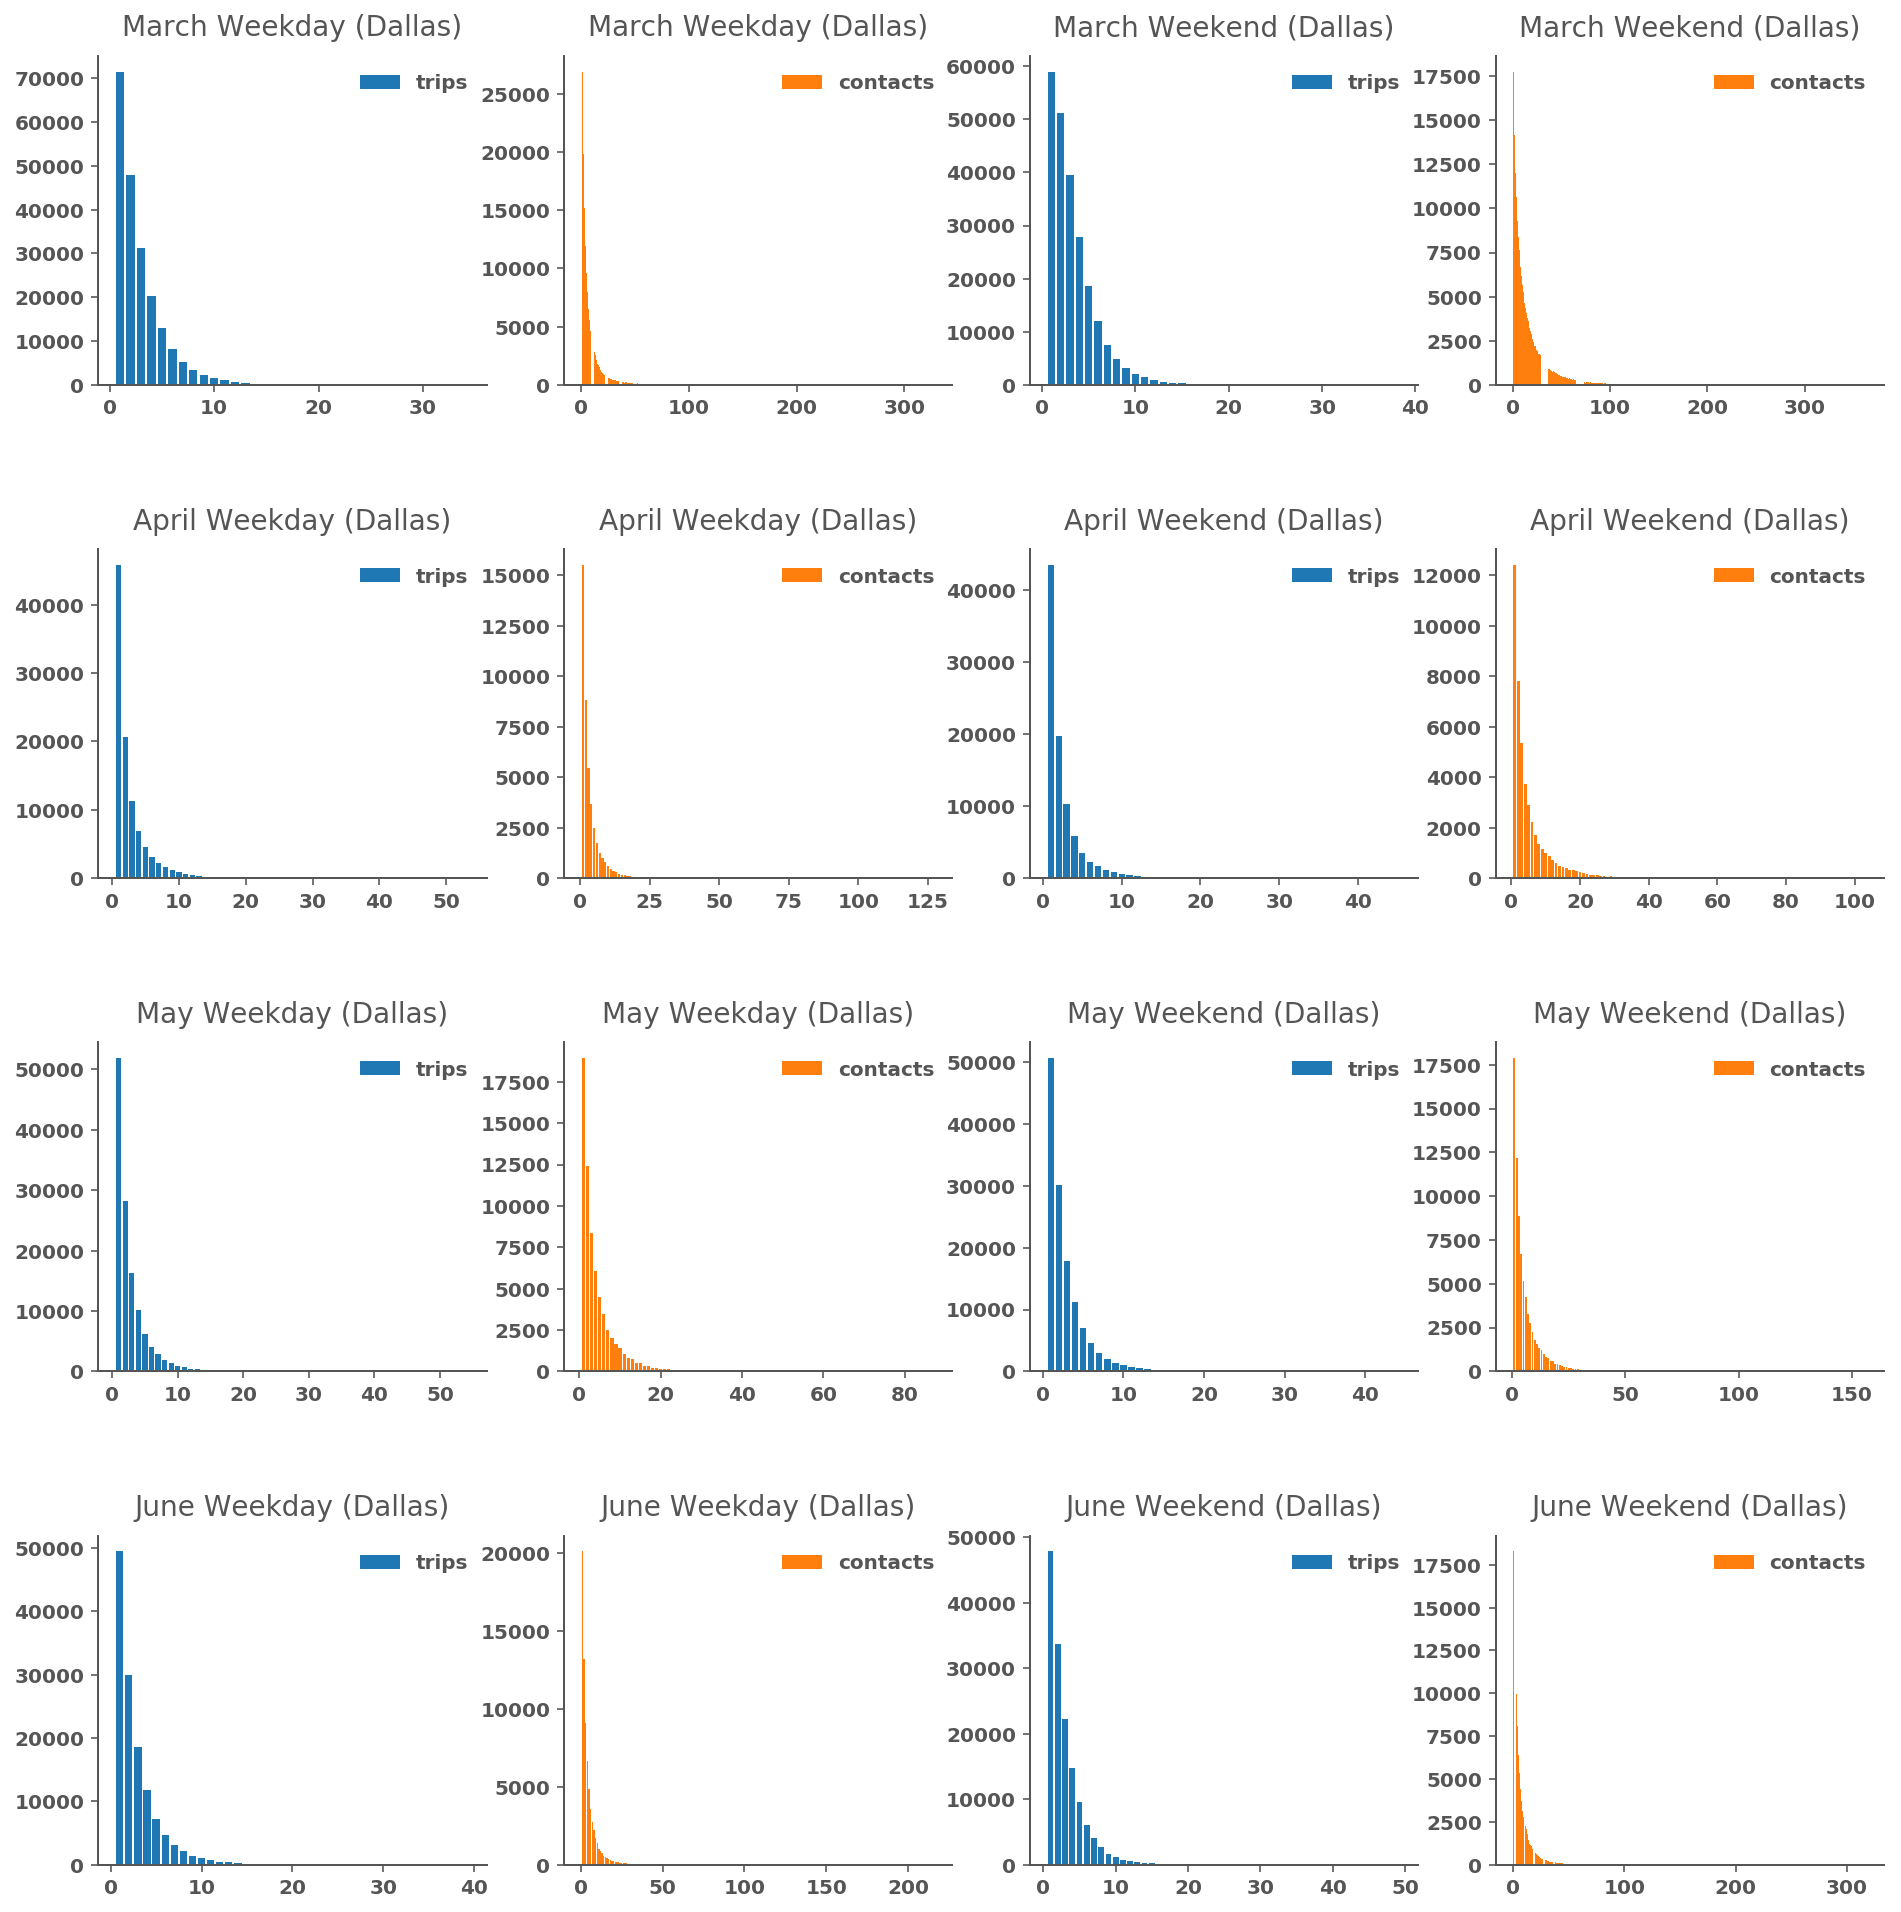

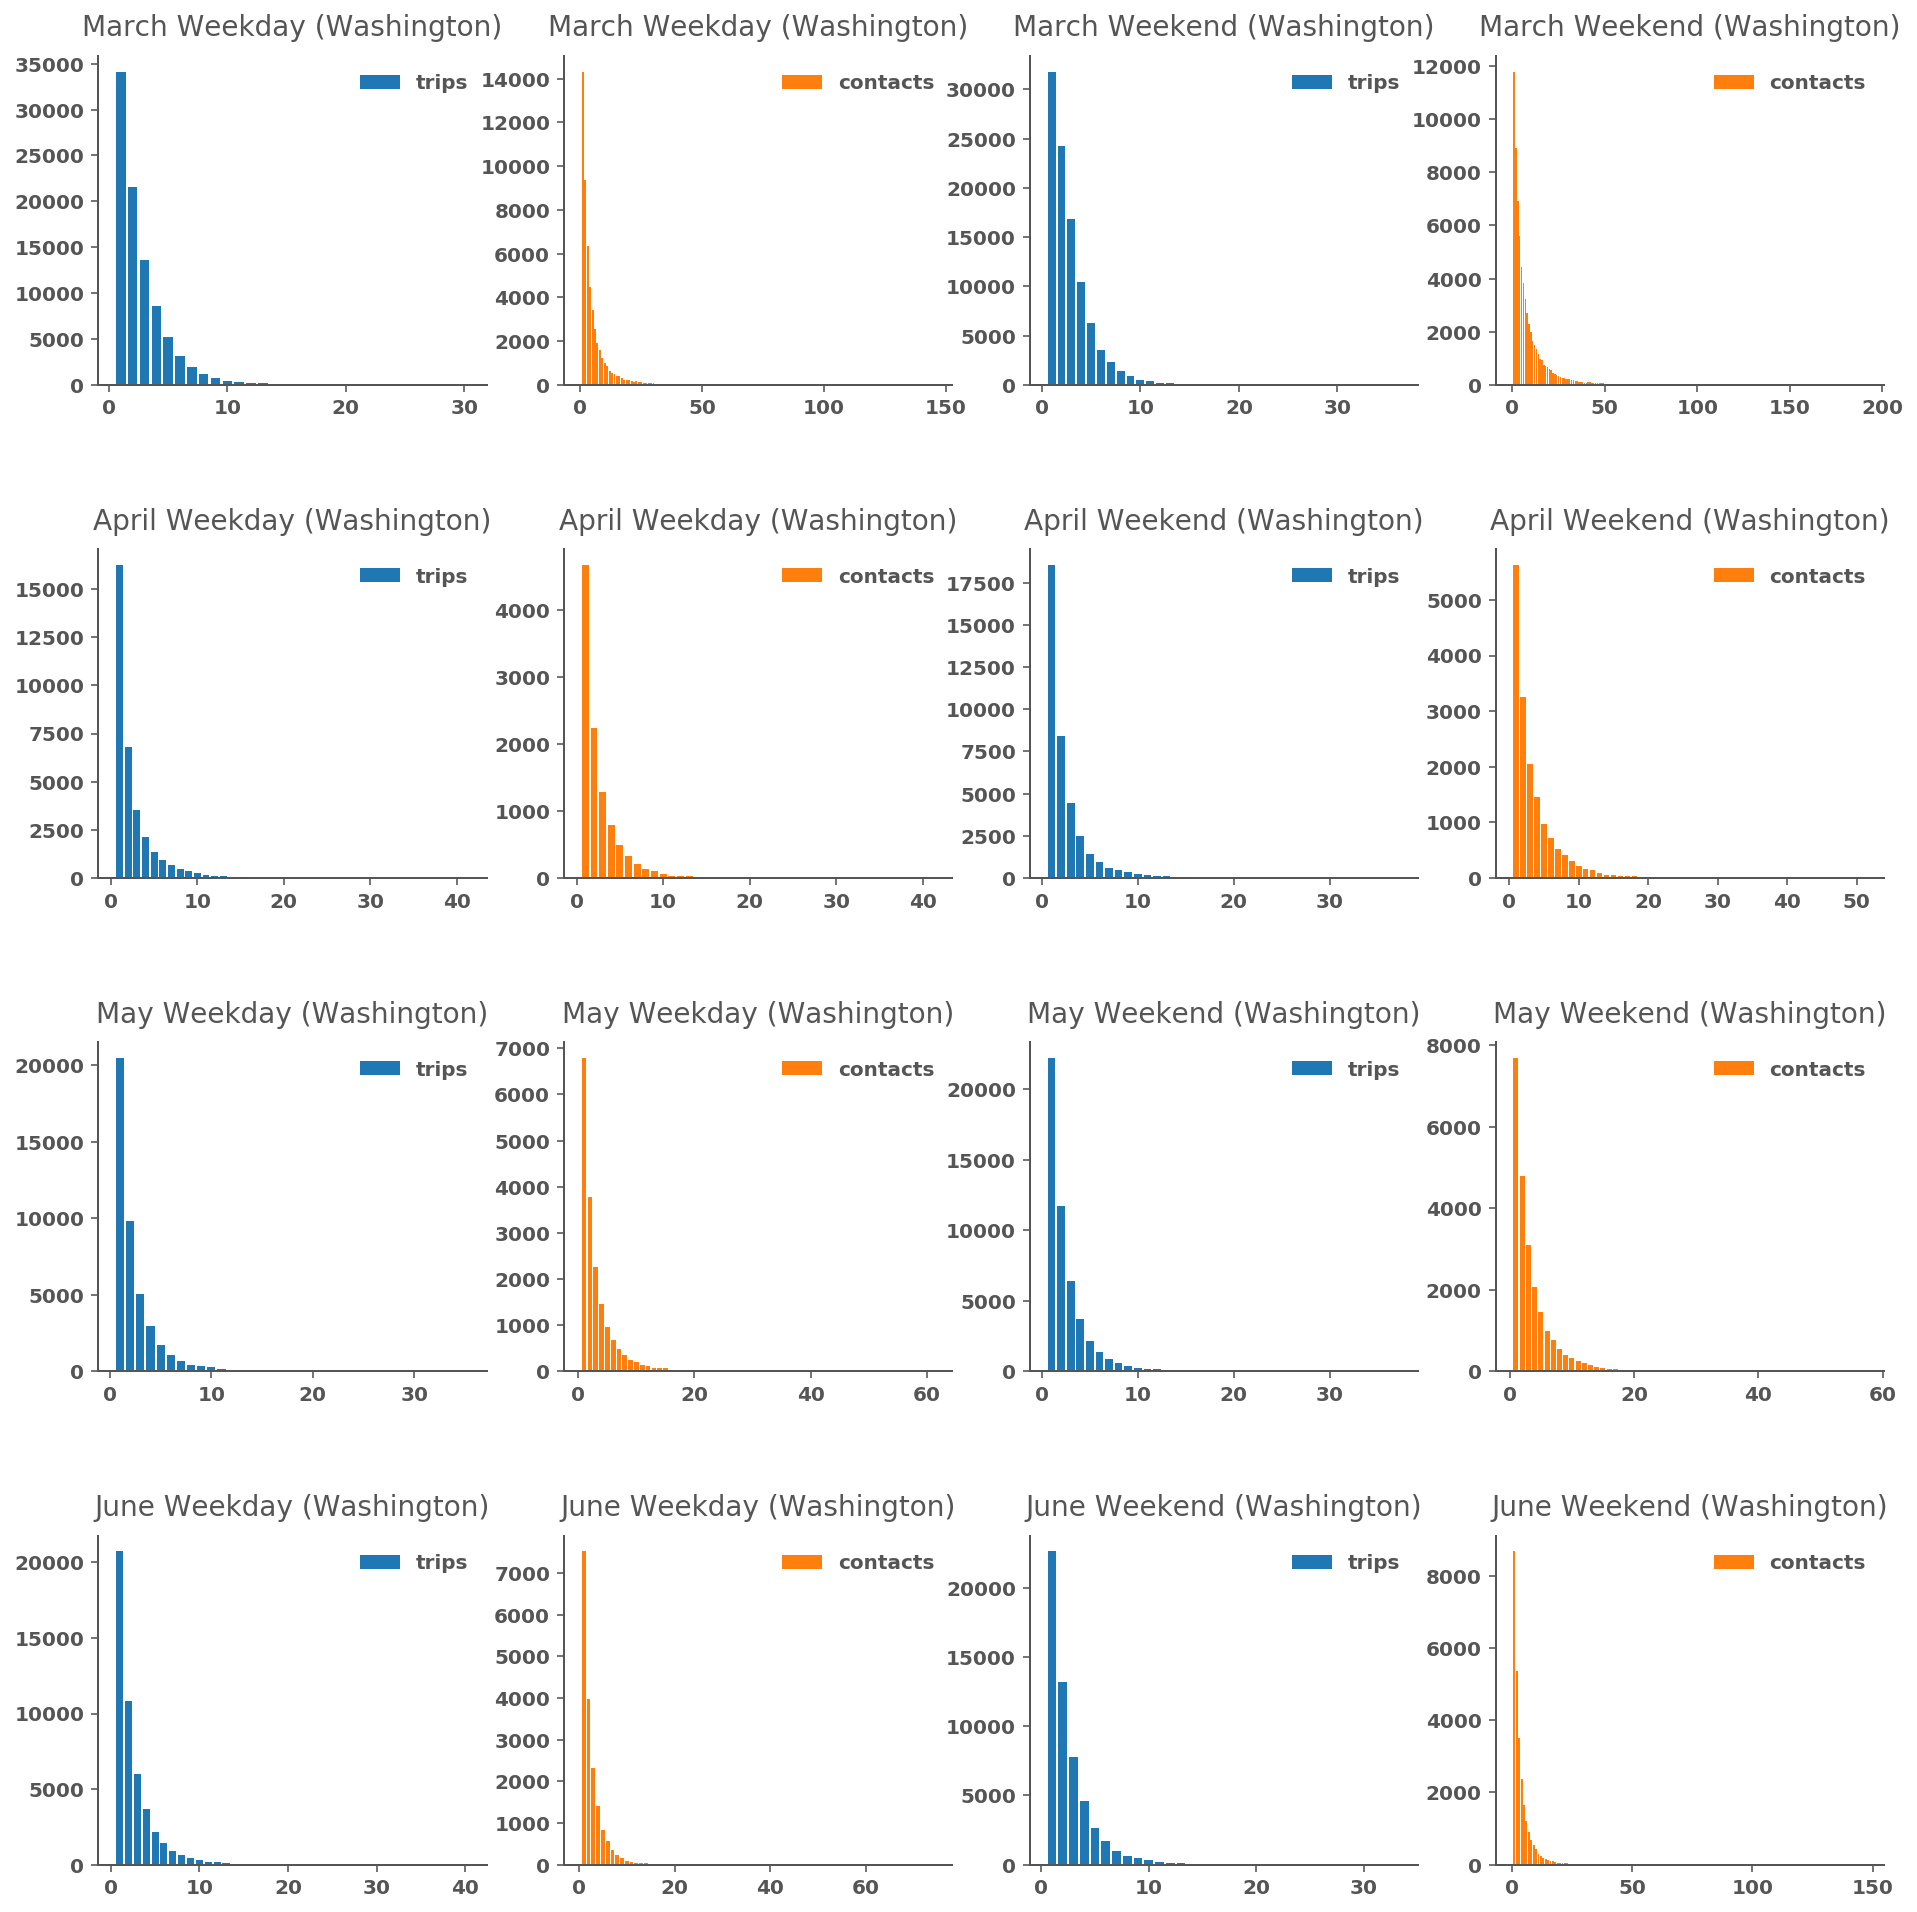

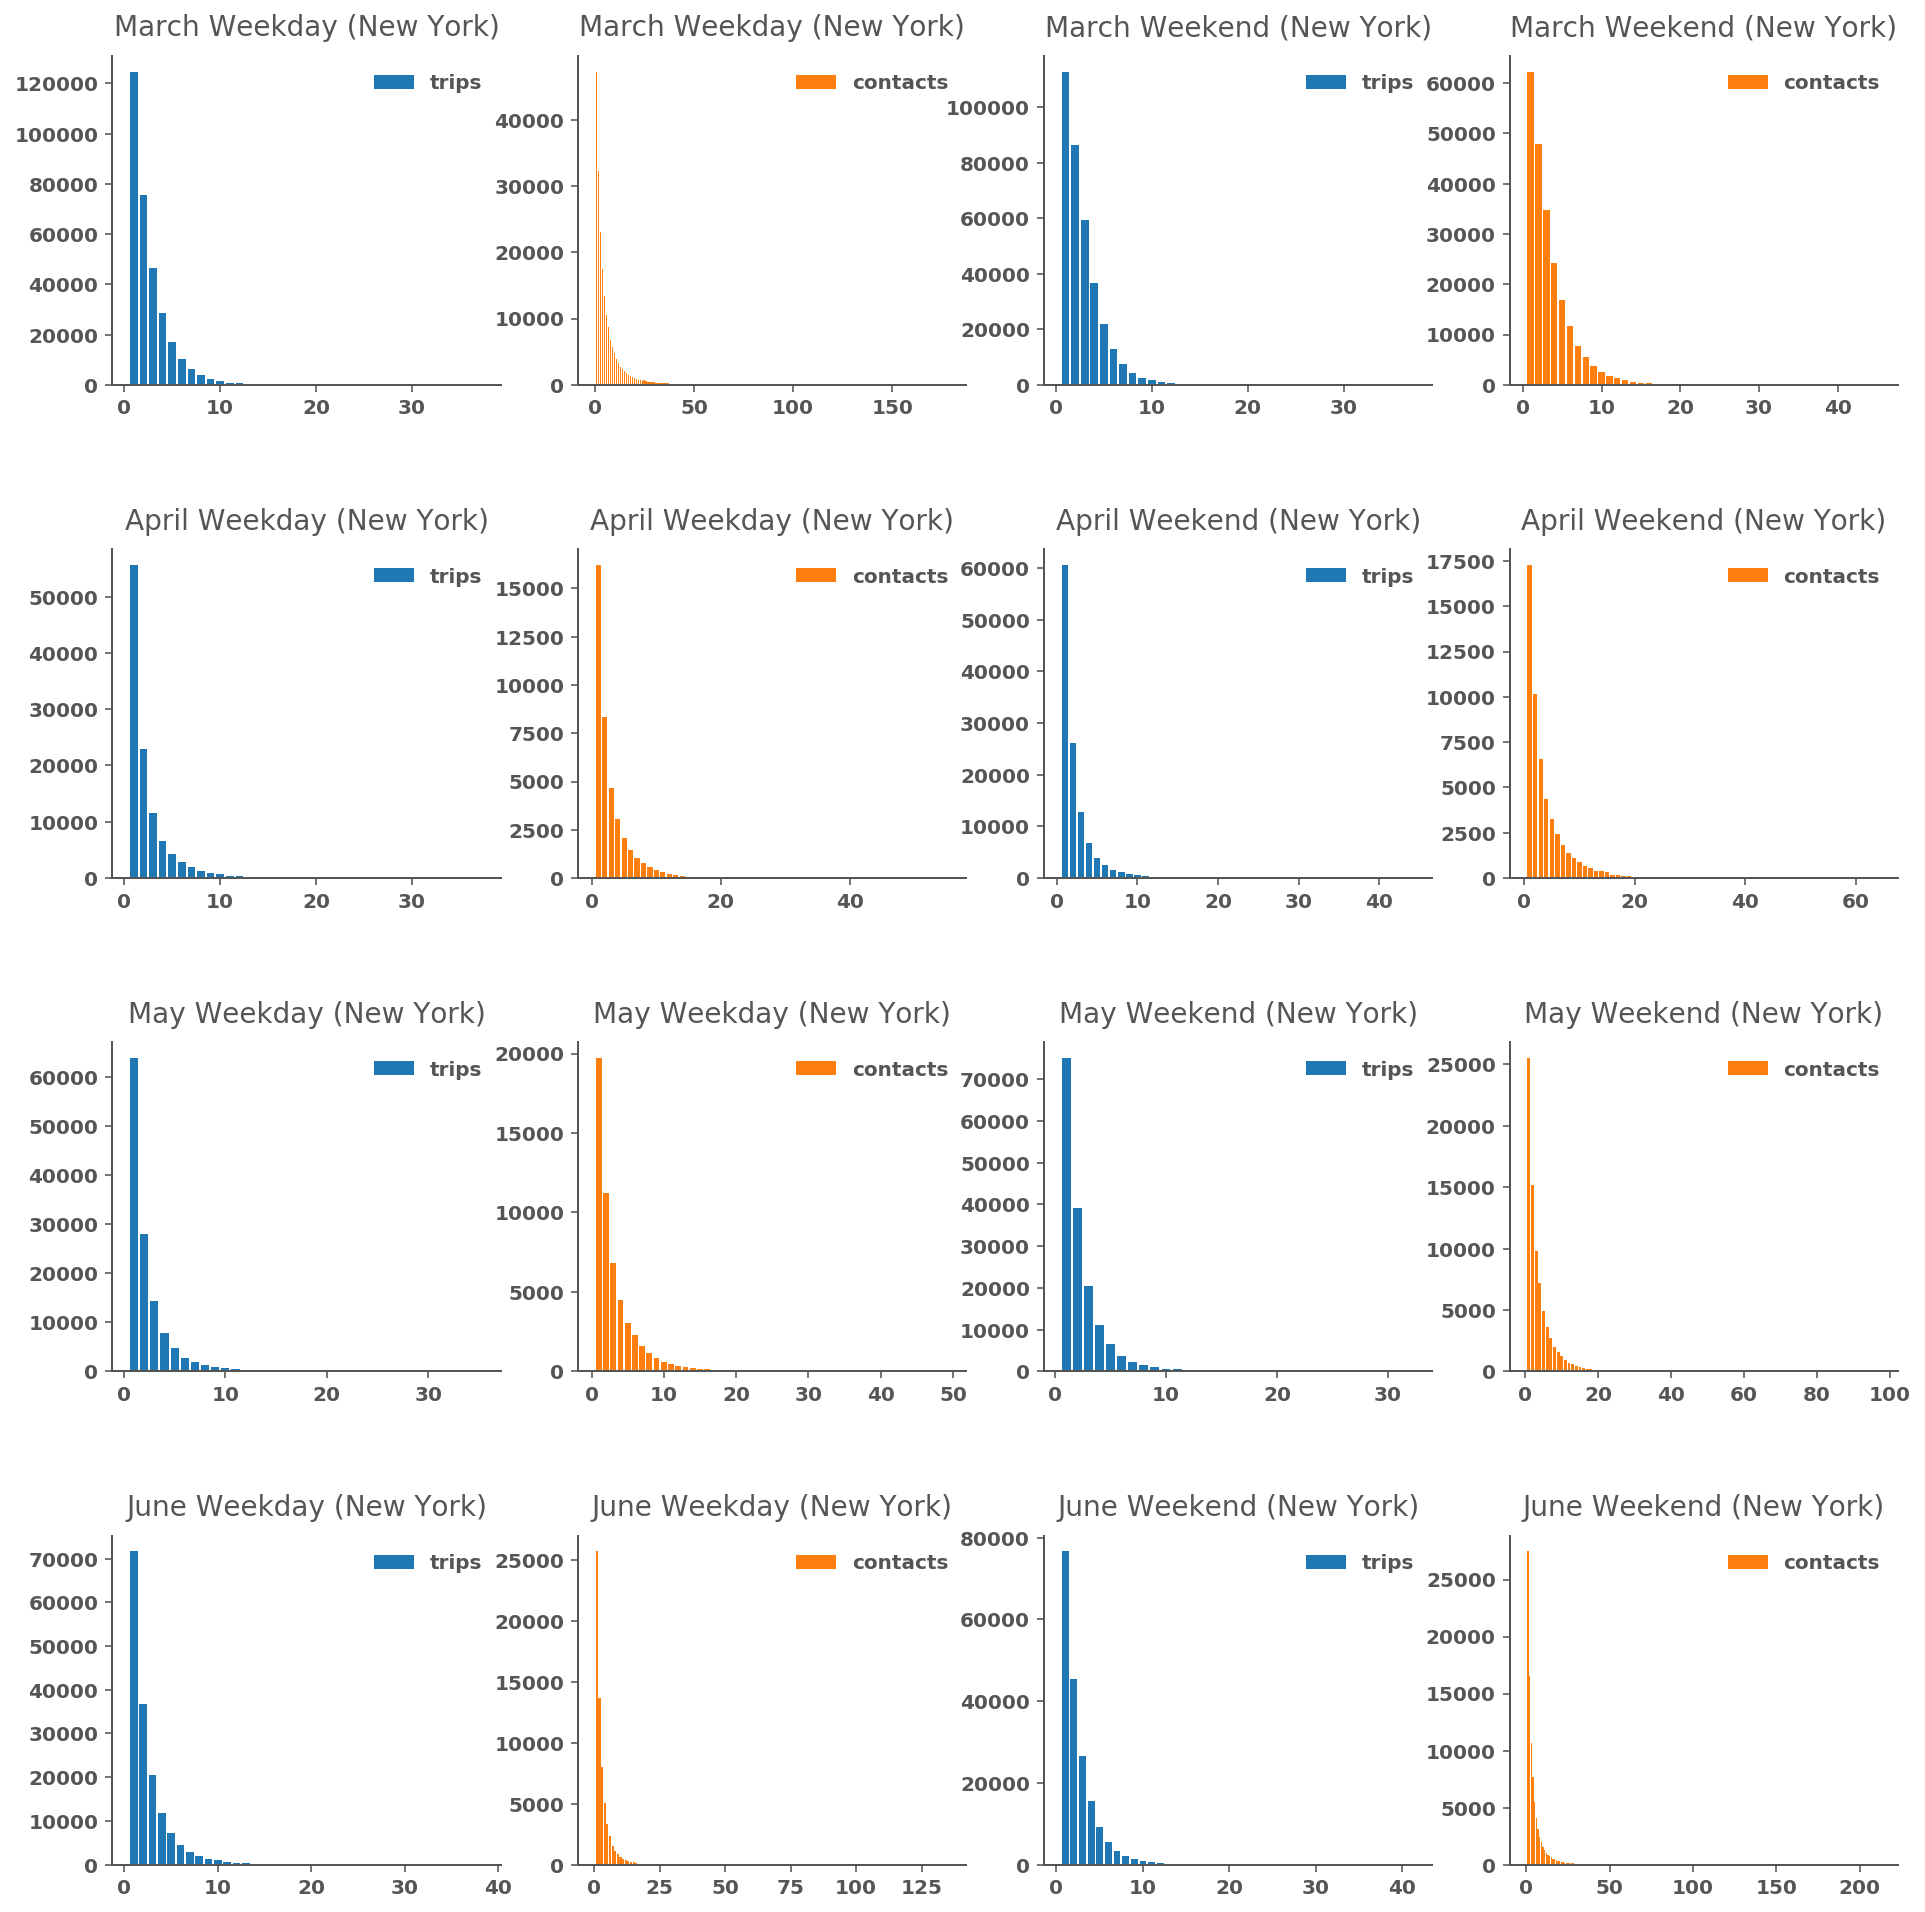

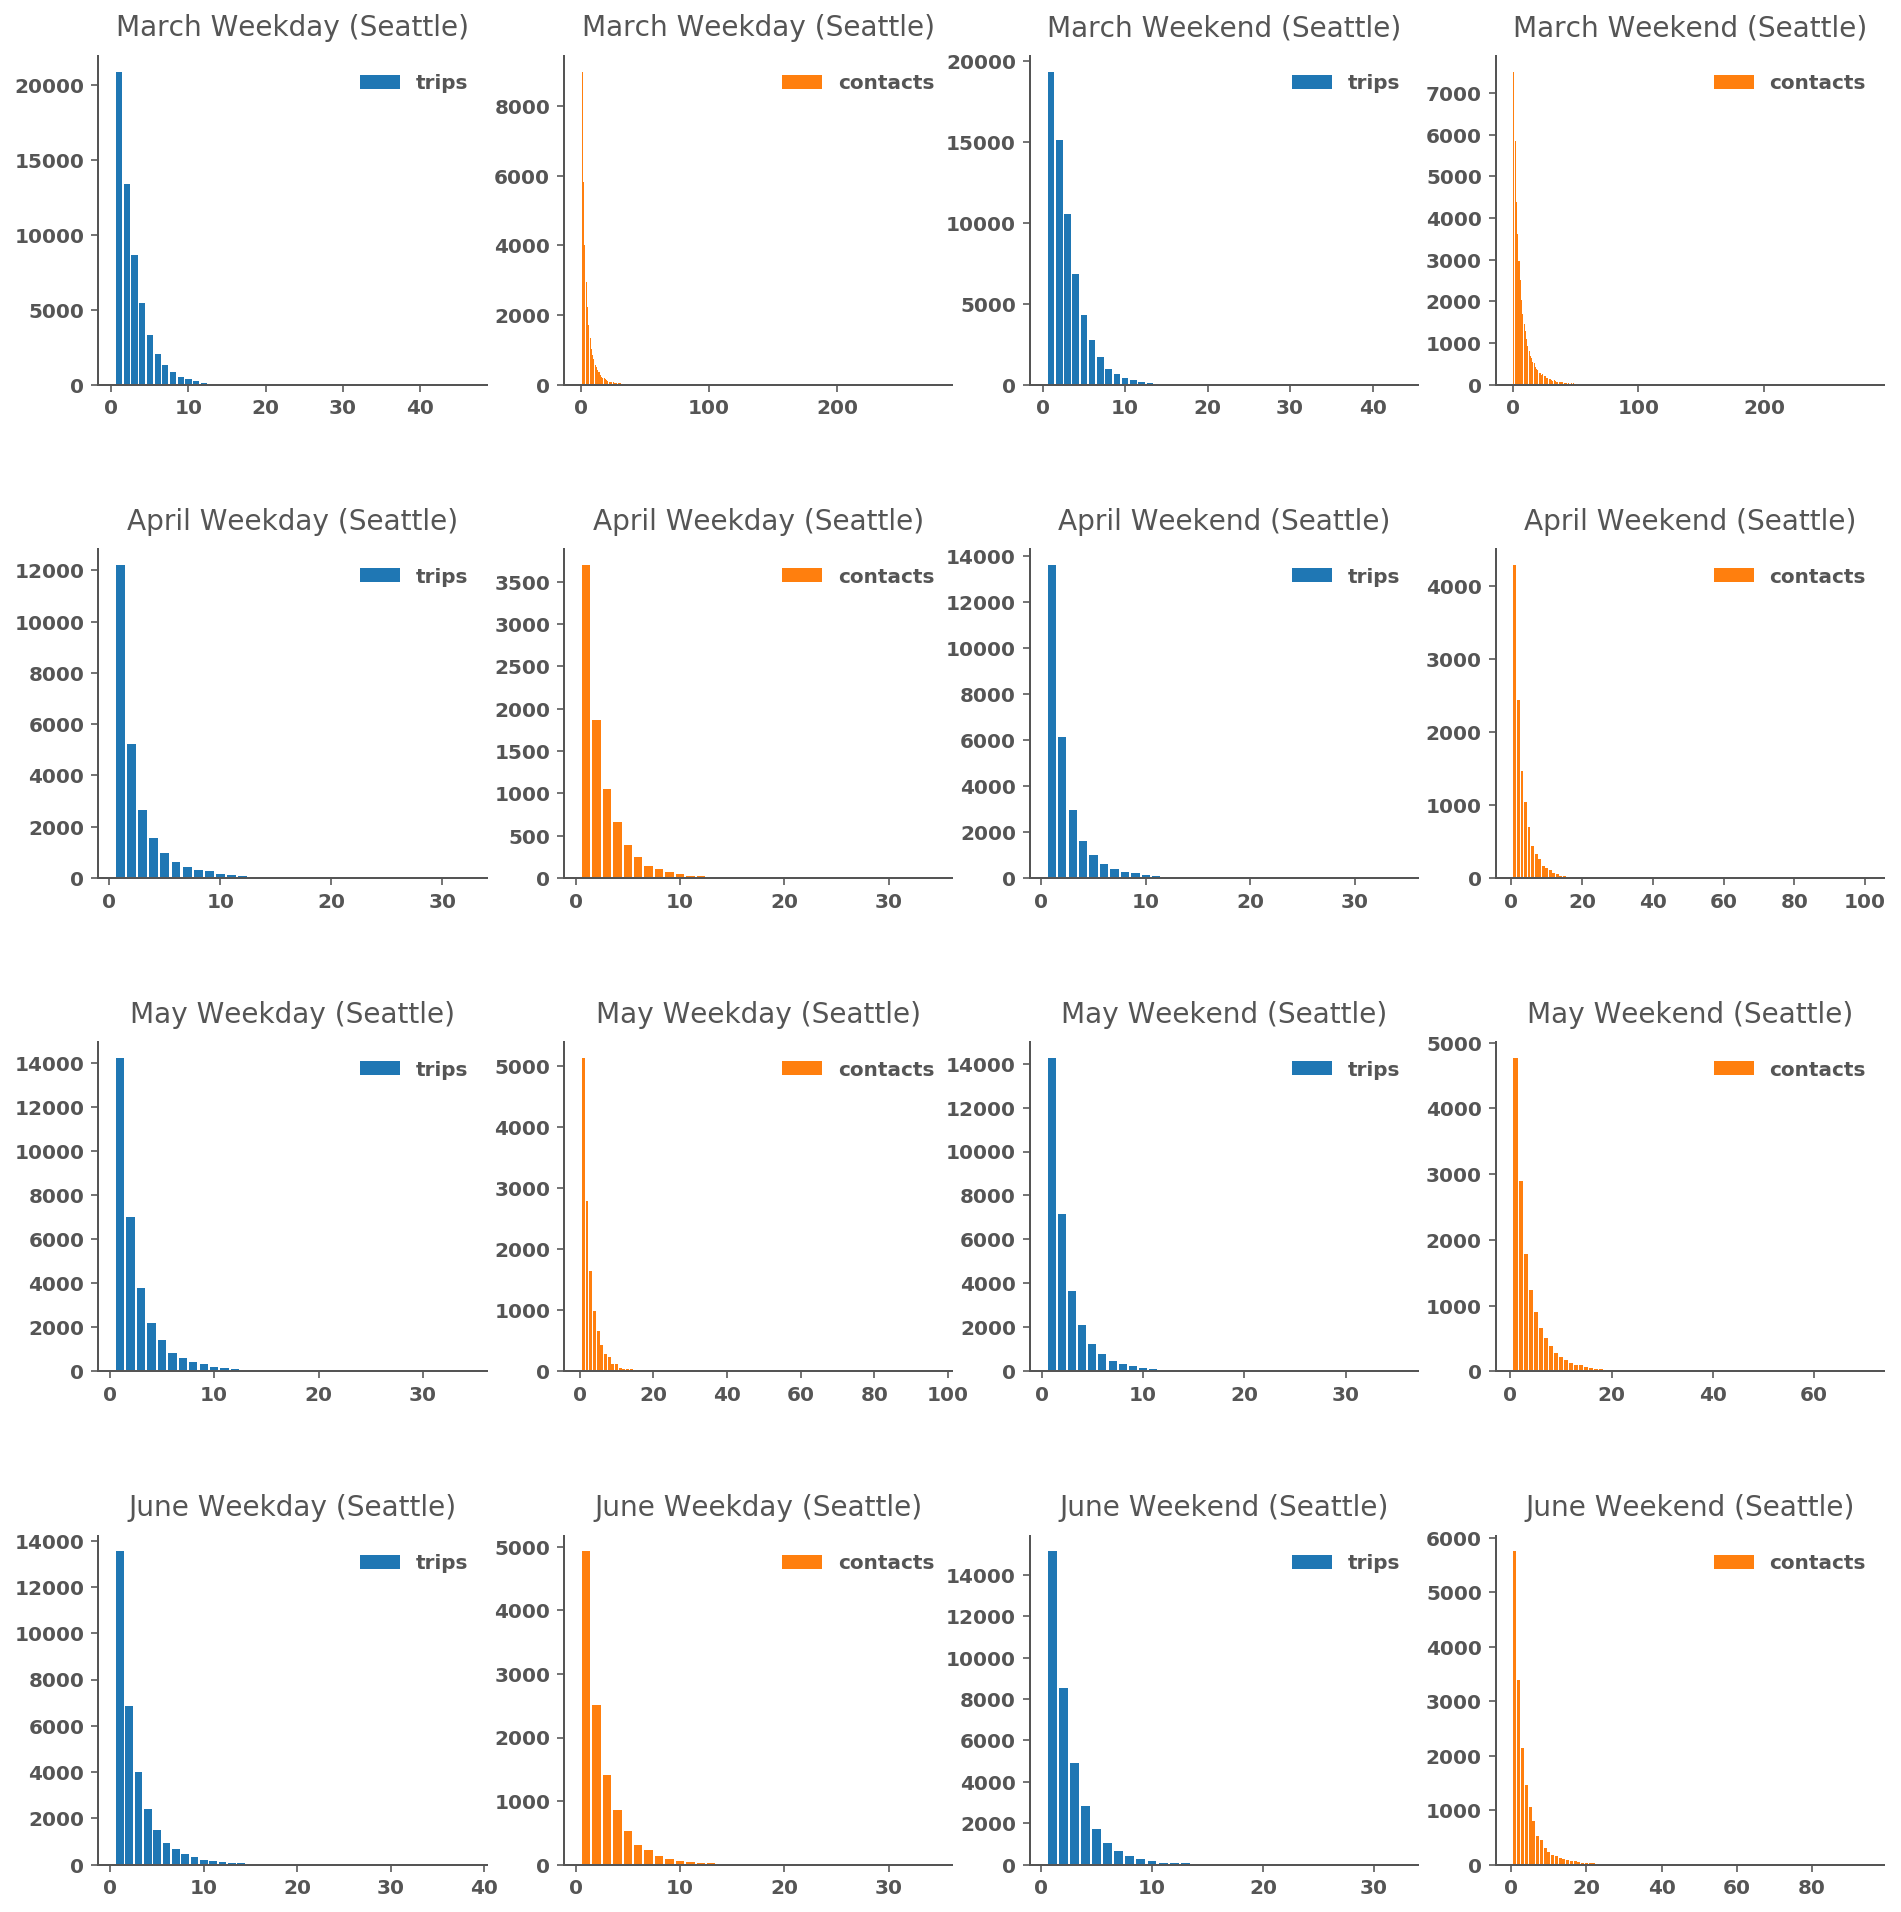

In [217]:
# Plot just the first  weekday  and first weekend  of each month
# Month: Weekday trips, Month: Weekday contacts, Month: Weekday trips, Month: Weekend contacts

ncols=4
nrows=len(months)

# for metro in ['Boston']:
for metro in metro_area_to_id.keys():
    day_trips = metro_day_trips[metro]
    day_contacts = metro_day_contacts[metro]

    figure, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows*4))
    plt.subplots_adjust(hspace=0.5)
    
    months_names = {3: 'March', 4: 'April', 5: 'May', 6:'June'}
    for m, (month, month_name) in enumerate(months_names.items()):
        plotted_weekday = False
        plotted_weekend = False
        for d, date in enumerate(months_days[month]):
            dt = datetime.datetime.strptime(date, date_fmt)
            is_weekday = dt.isoweekday() in range(1,6)
            if is_weekday and plotted_weekday:
                continue
            if not is_weekday and plotted_weekend:
                continue
                
            if is_weekday:
                plotted_weekday = True
                title = '%s Weekday (%s)' % (month_name, metro)
            else:
                plotted_weekend = True
                title = '%s Weekend (%s)' % (month_name, metro)
            
            # plot trips and contacts  separately
            trips_df  = day_trips[date]
            contacts_df  = day_contacts[date]
            if is_weekday:
                trips_ax = axes.flat[m*4+0]
                contacts_ax = axes.flat[m*4+1]
            else:
                trips_ax = axes.flat[m*4+2]
                contacts_ax = axes.flat[m*4+3]
            

            trips_ax.bar(trips_df[TRIPS],
                trips_df[USER_COUNT],
                alpha=1,
               label='trips',
               color='#1f77b4'
              )

            contacts_ax.bar(contacts_df[CONTACTS],
                contacts_df[USER_COUNT],
                alpha=1,
               label='contacts',
               color=u'#ff7f0e'
              )
            trips_ax.set_title(title)
            trips_ax.legend()
            trips_ax.margins(0.05)
            contacts_ax.set_title(title)
            contacts_ax.legend()
            contacts_ax.margins(0.05)
            
            trips_ax.get_figure().set_facecolor('w')
    plt.show()

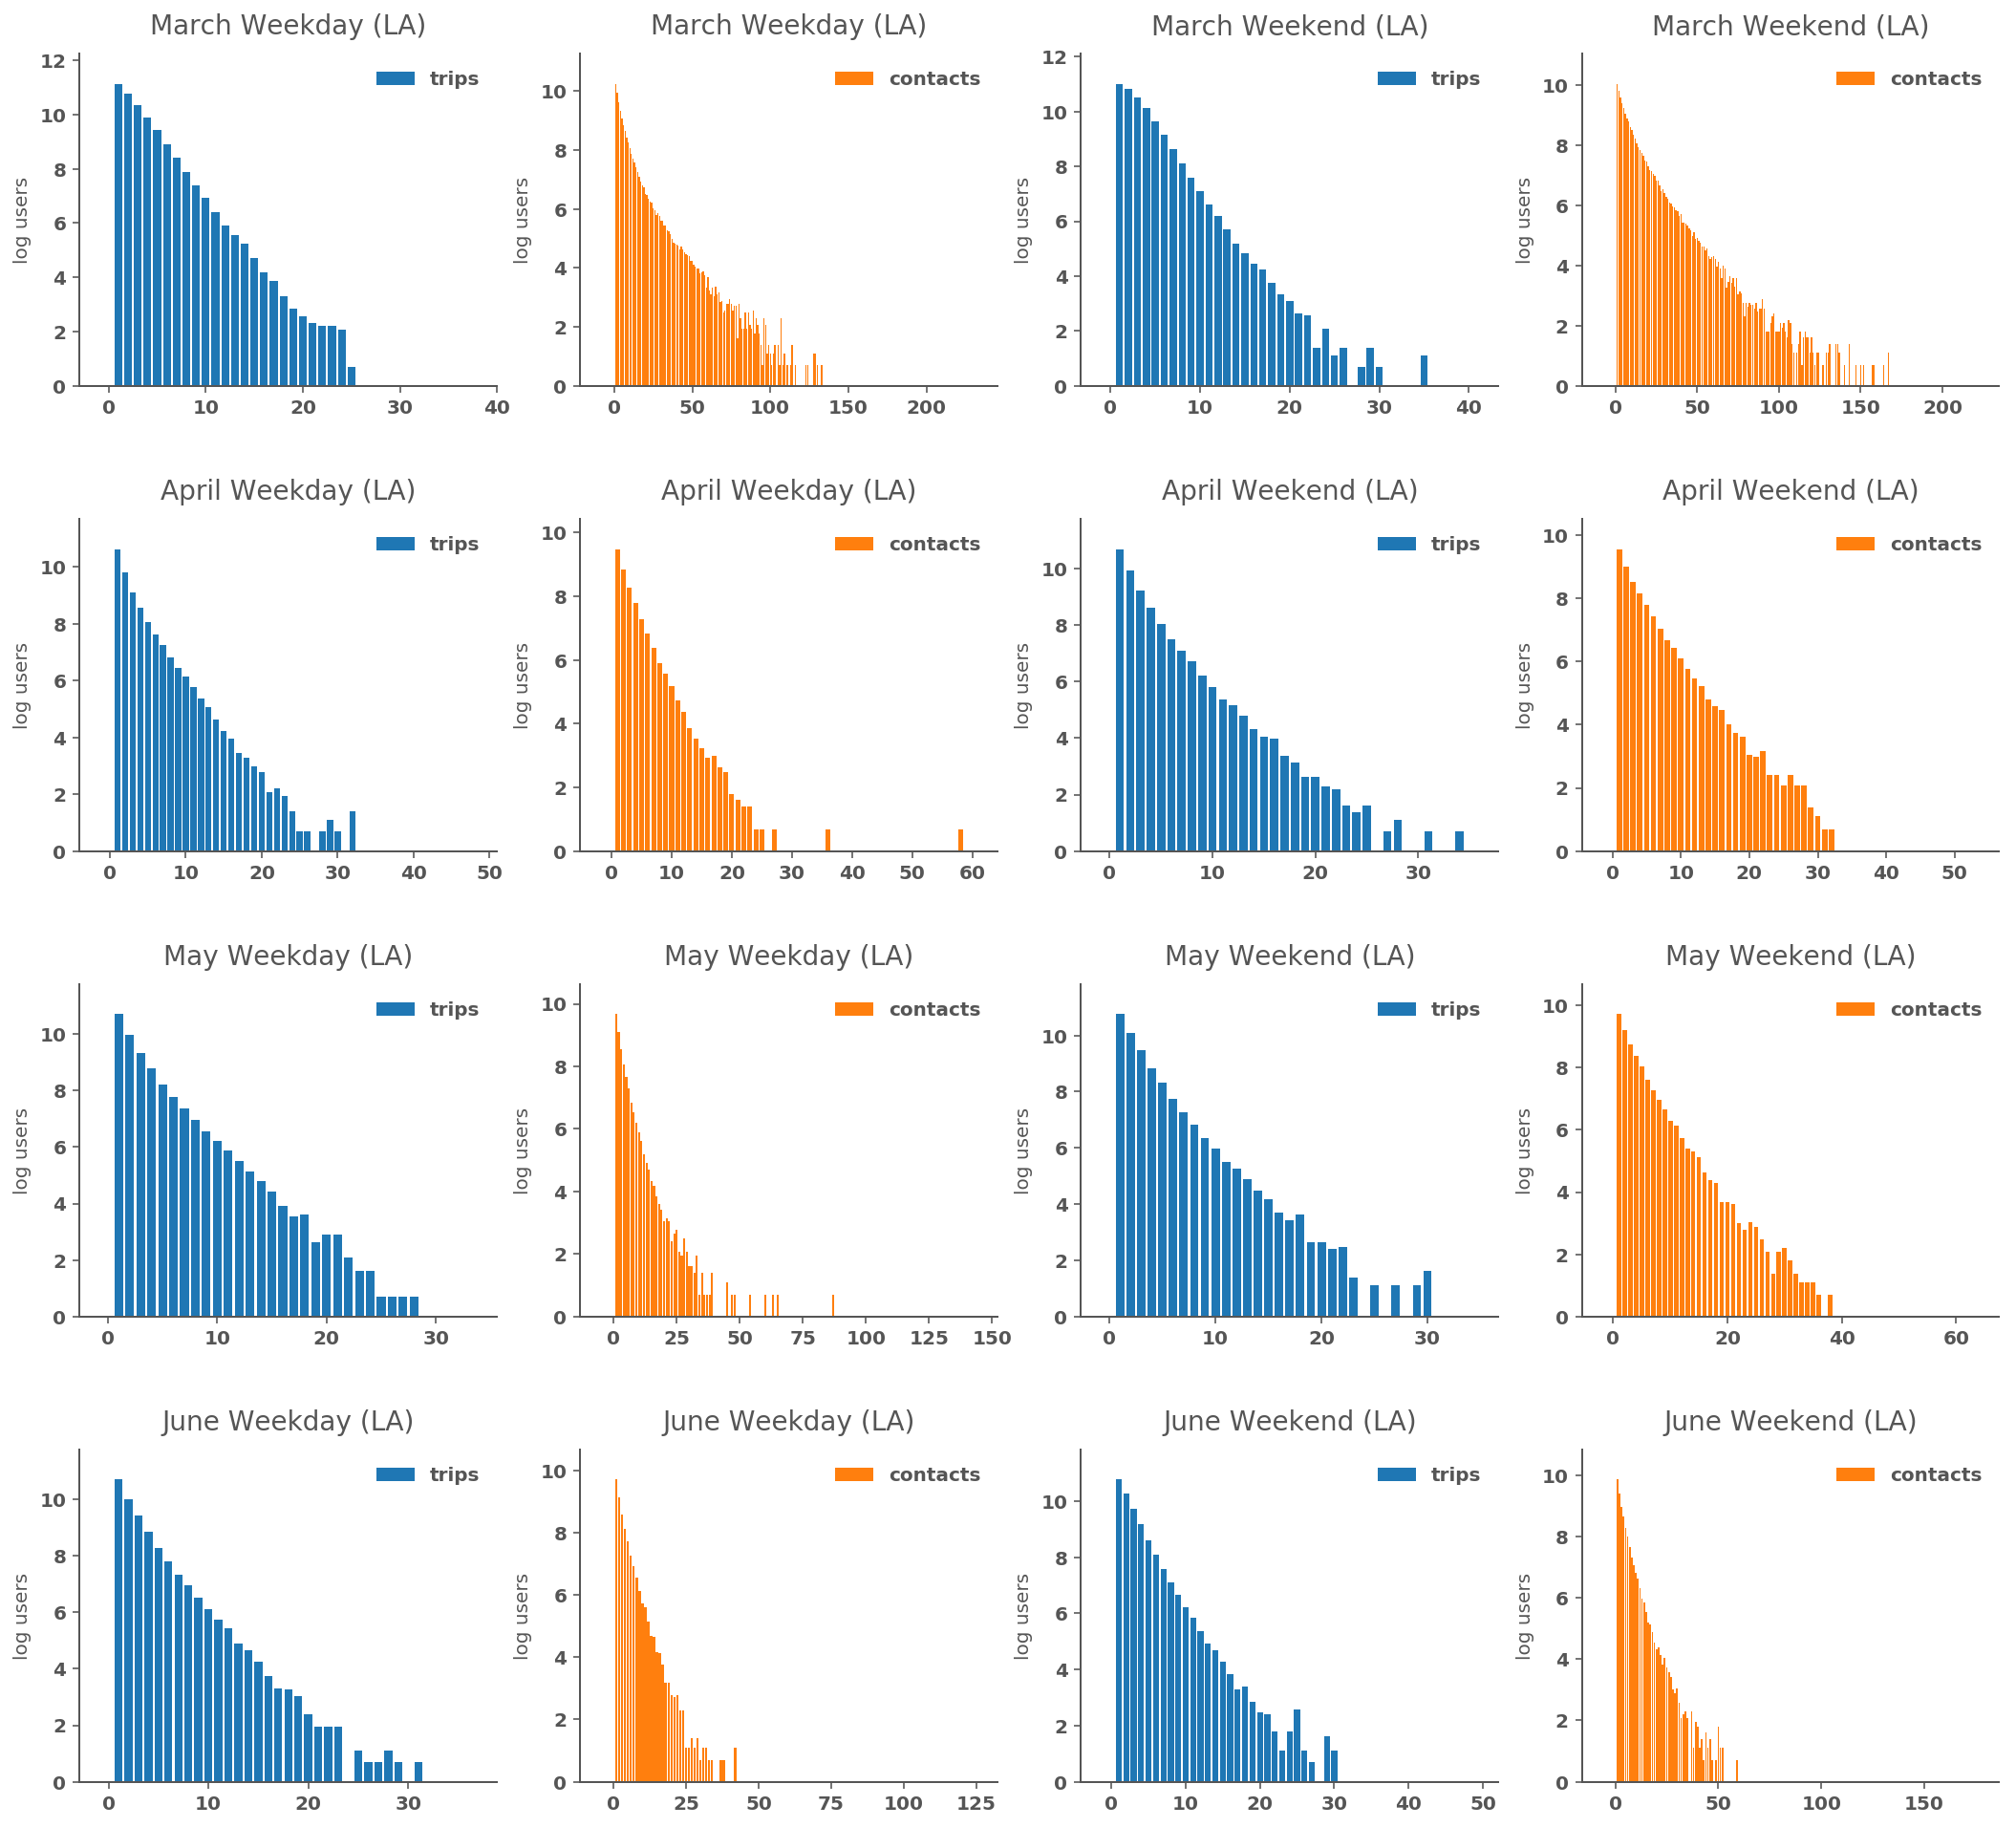

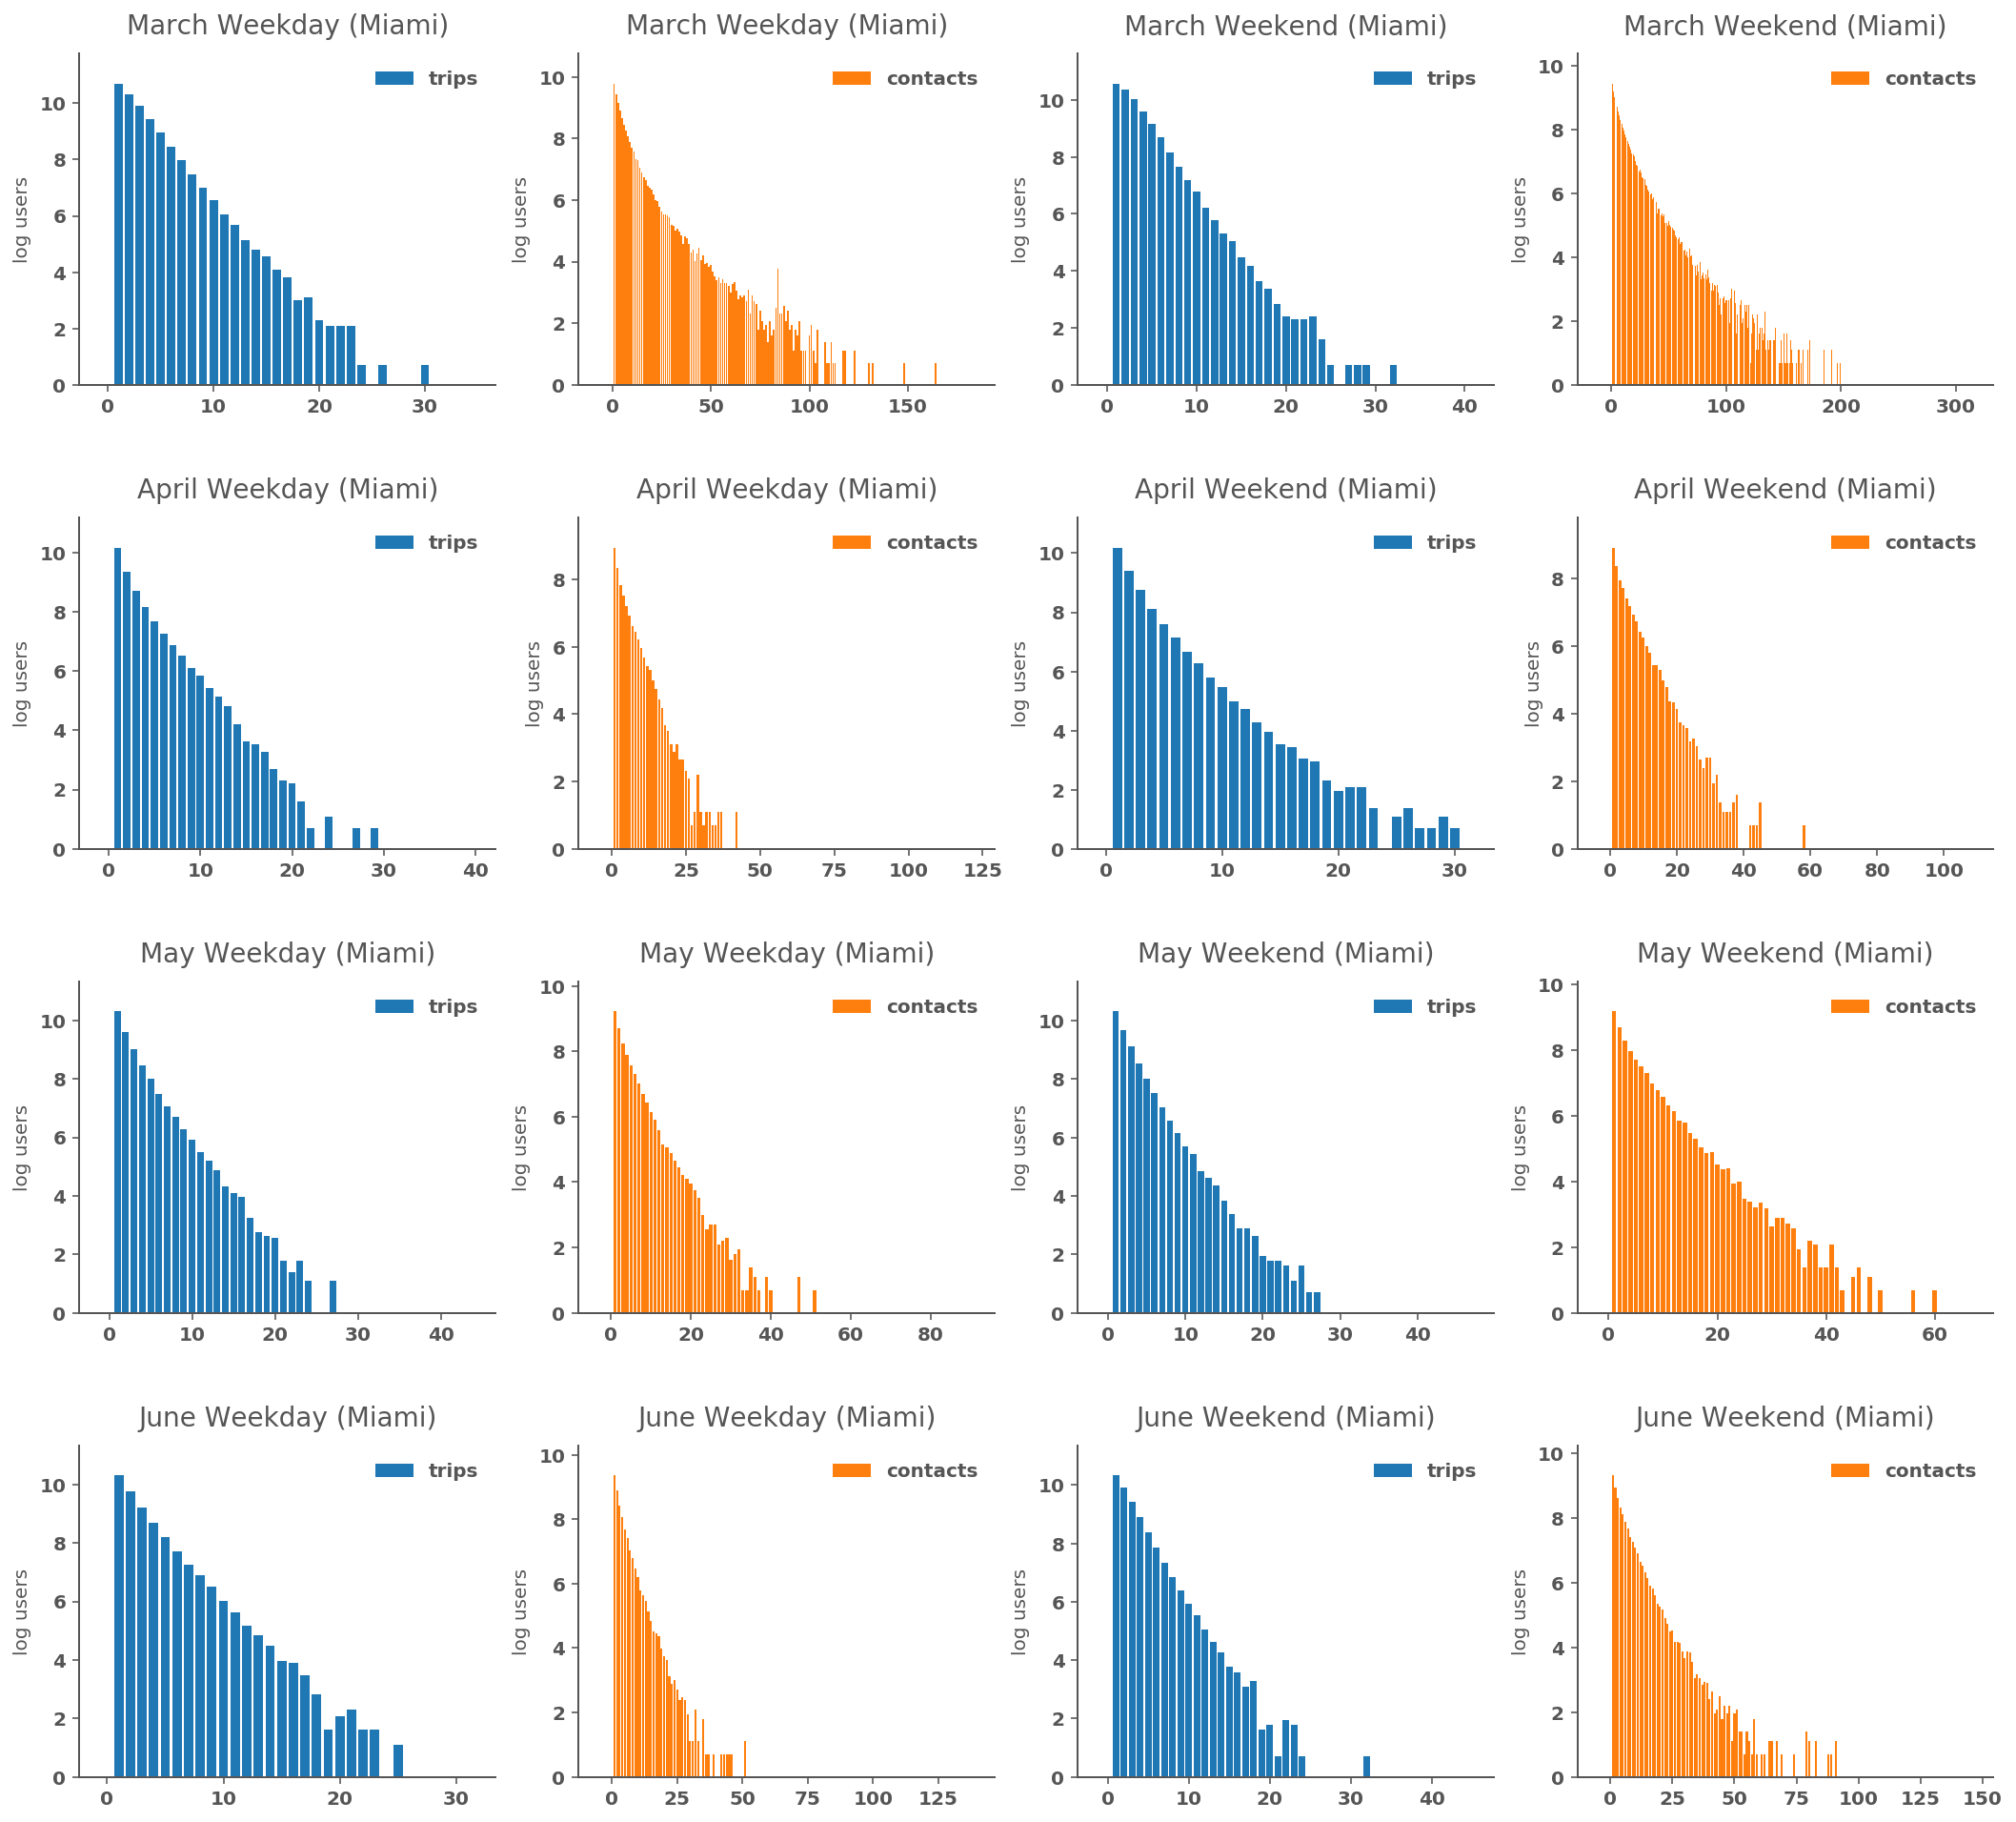

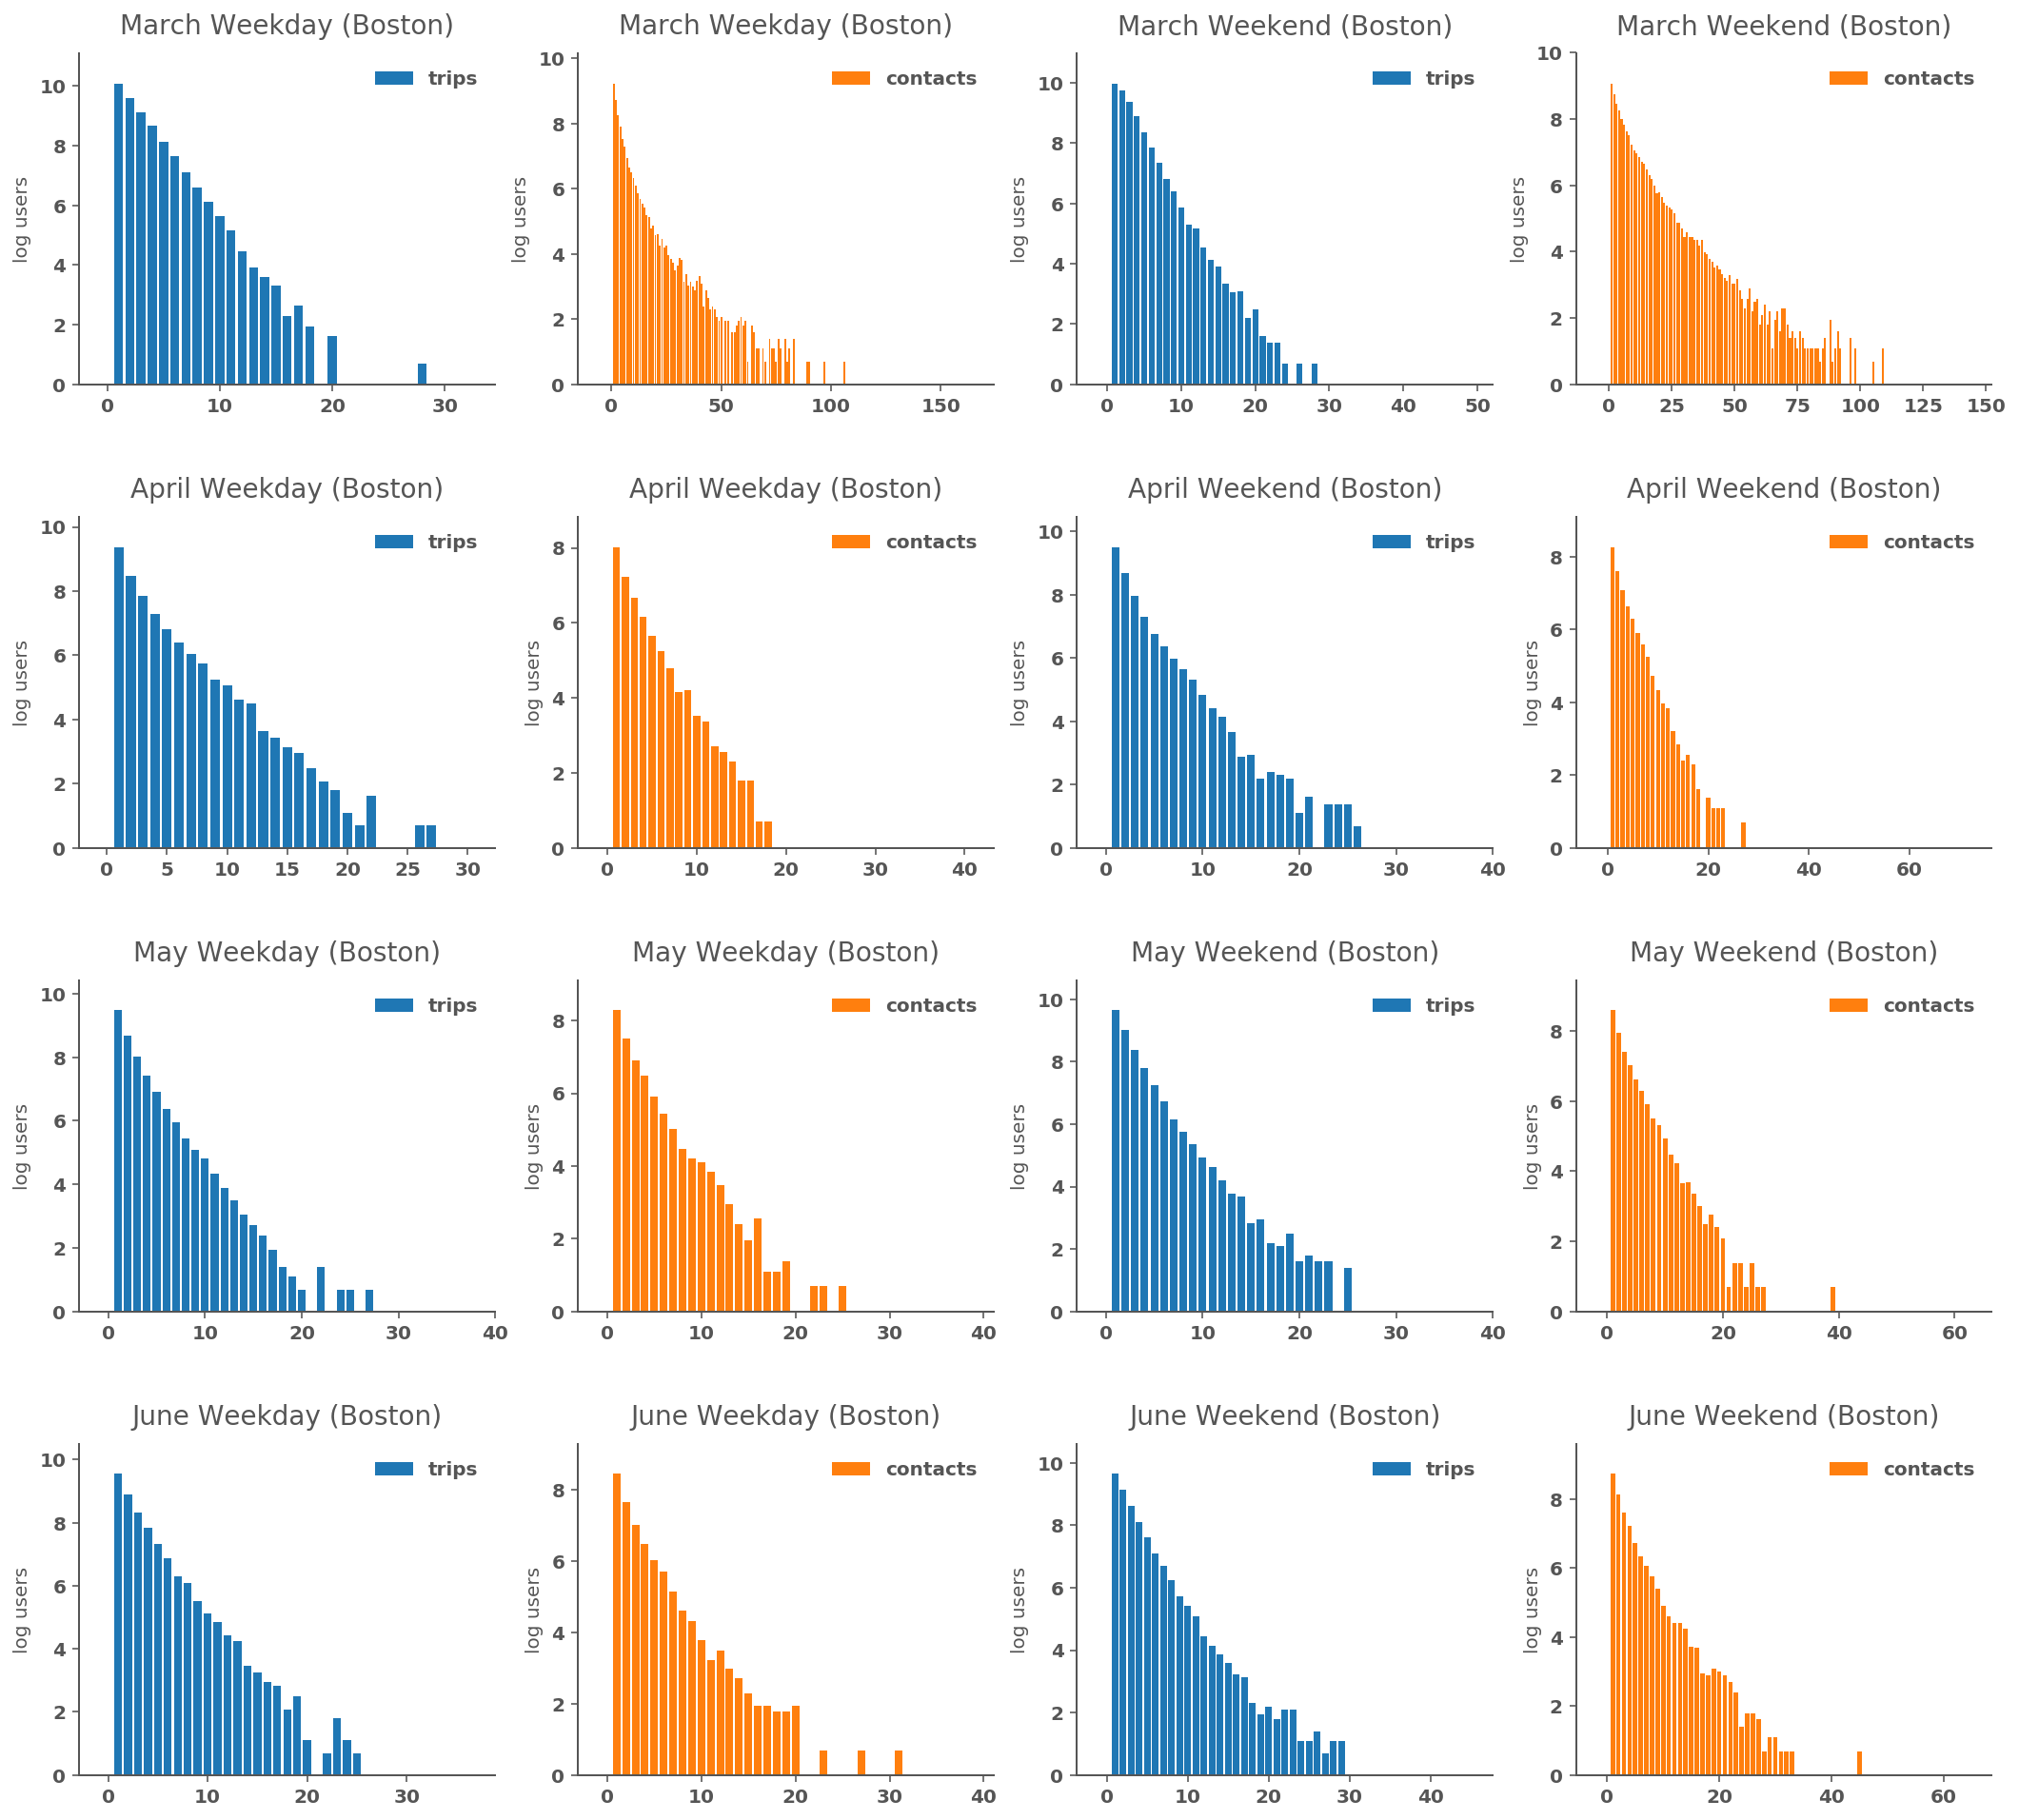

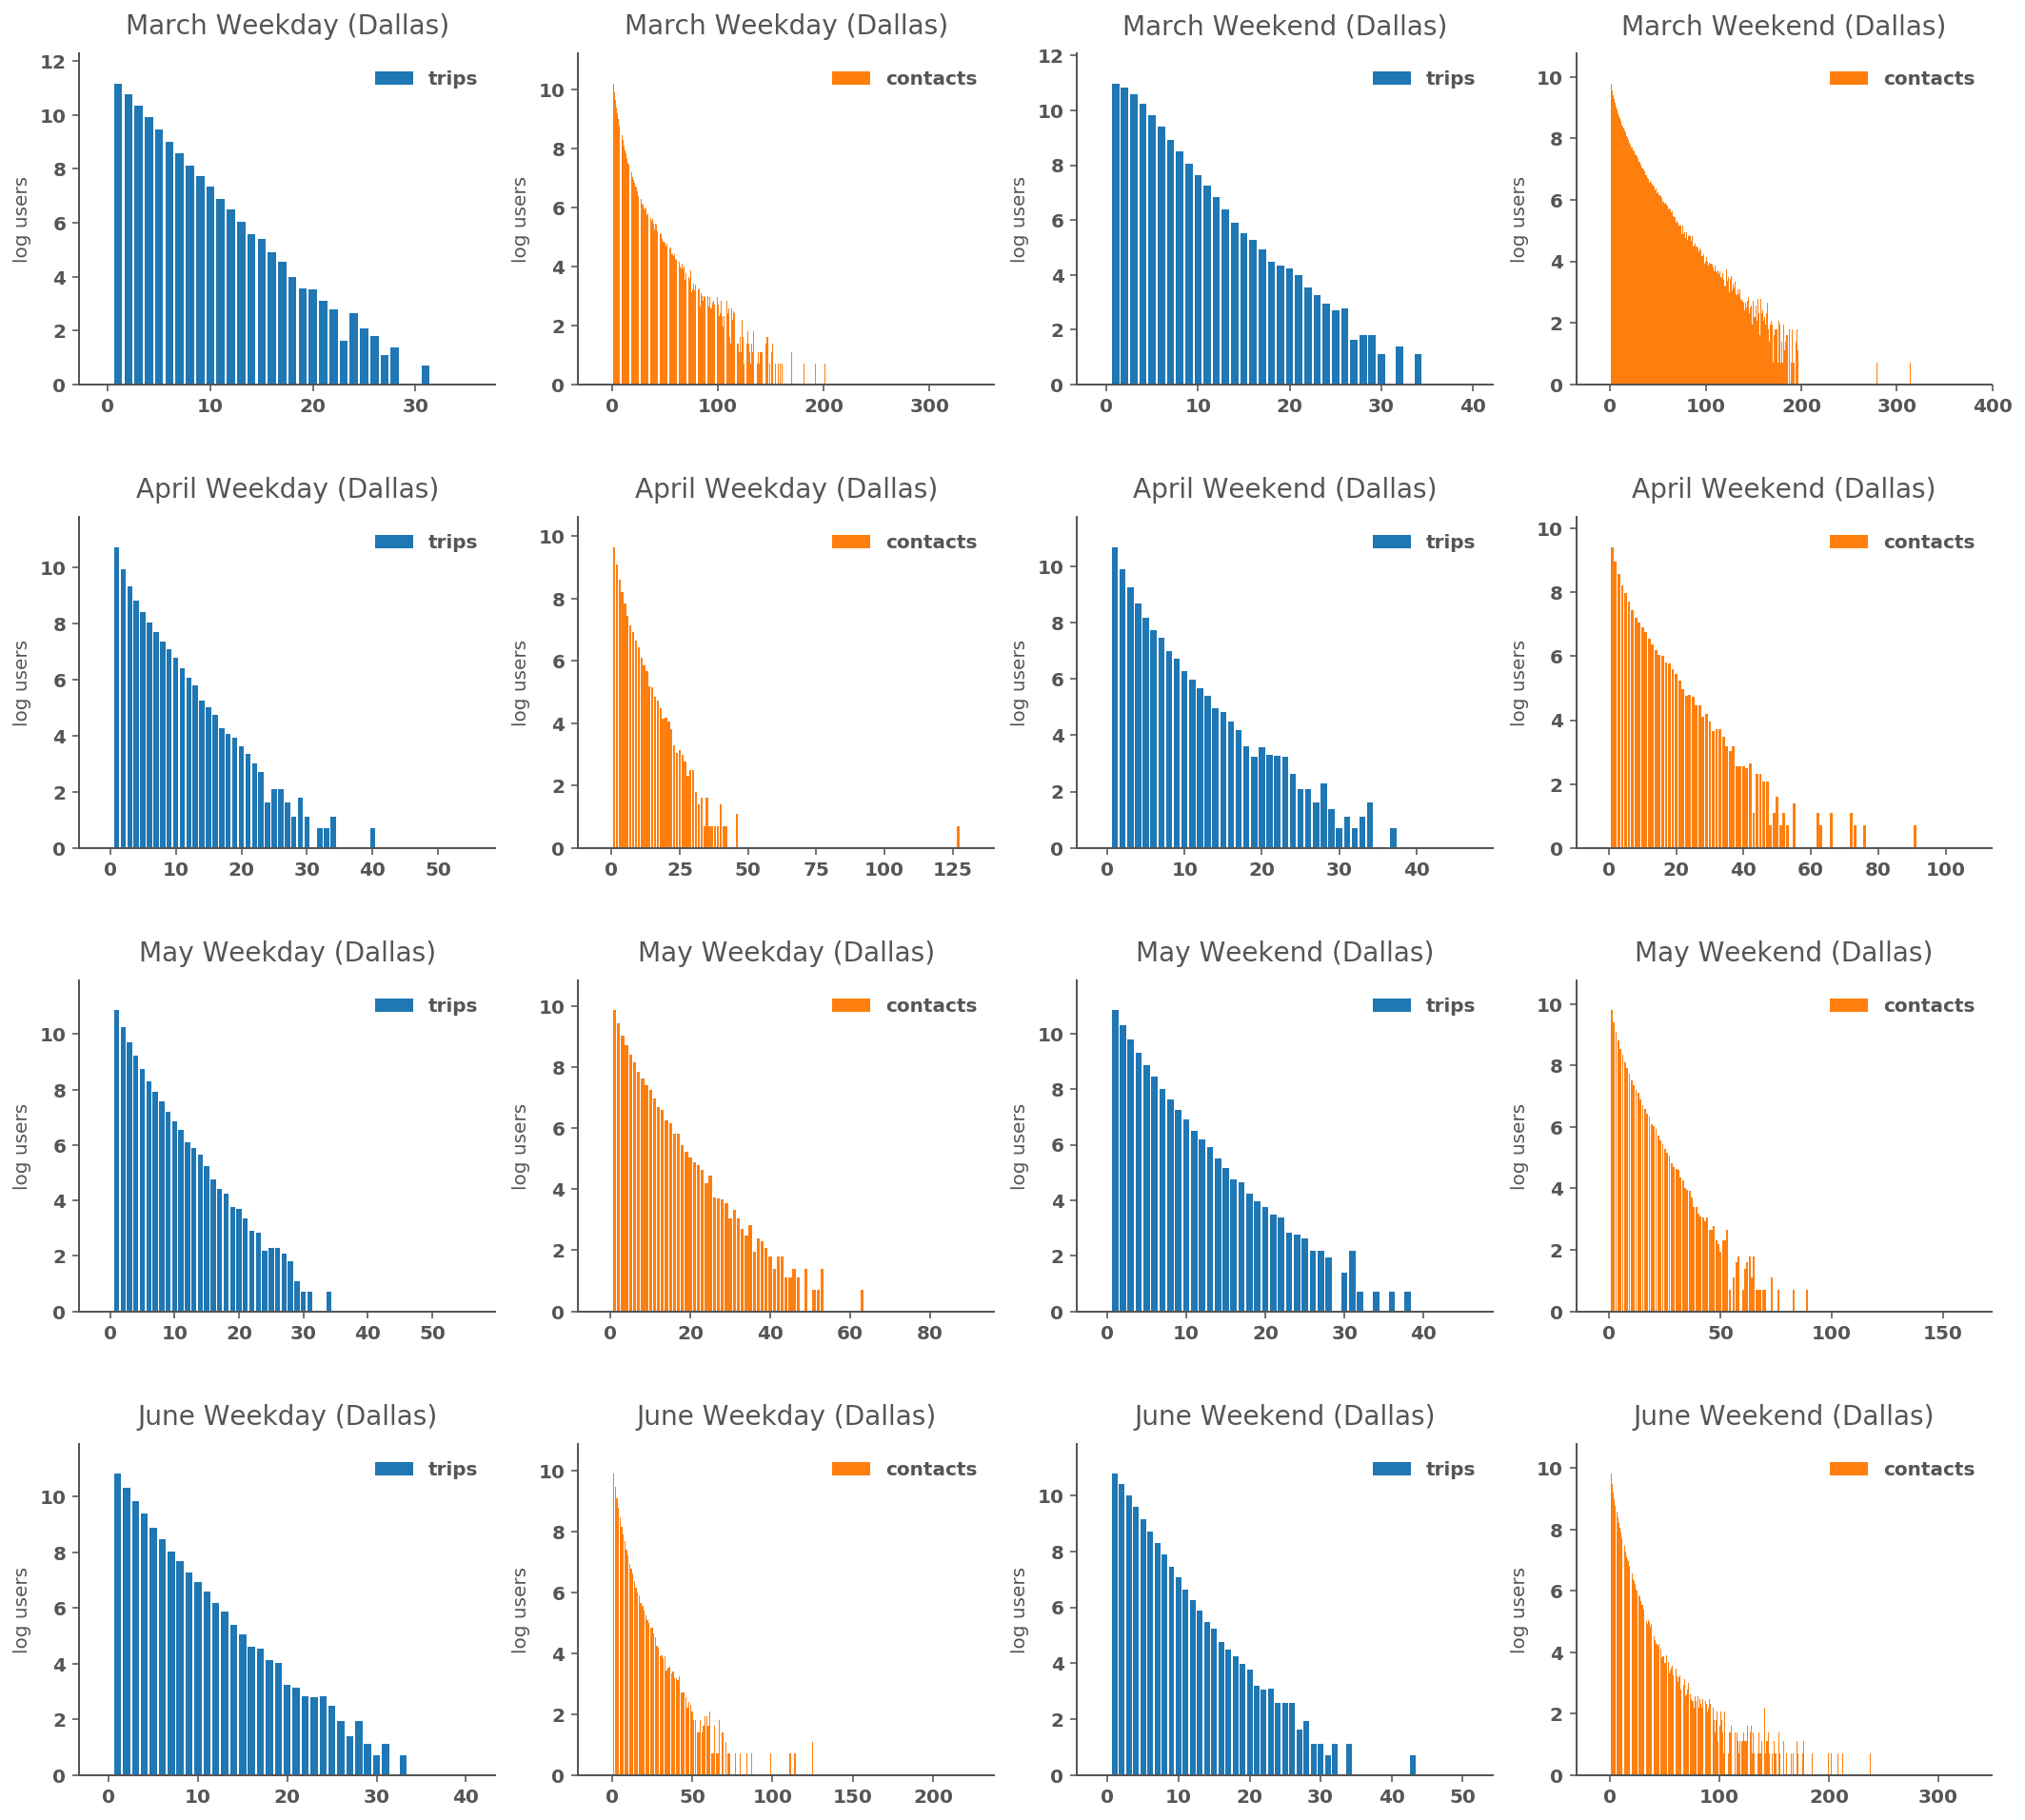

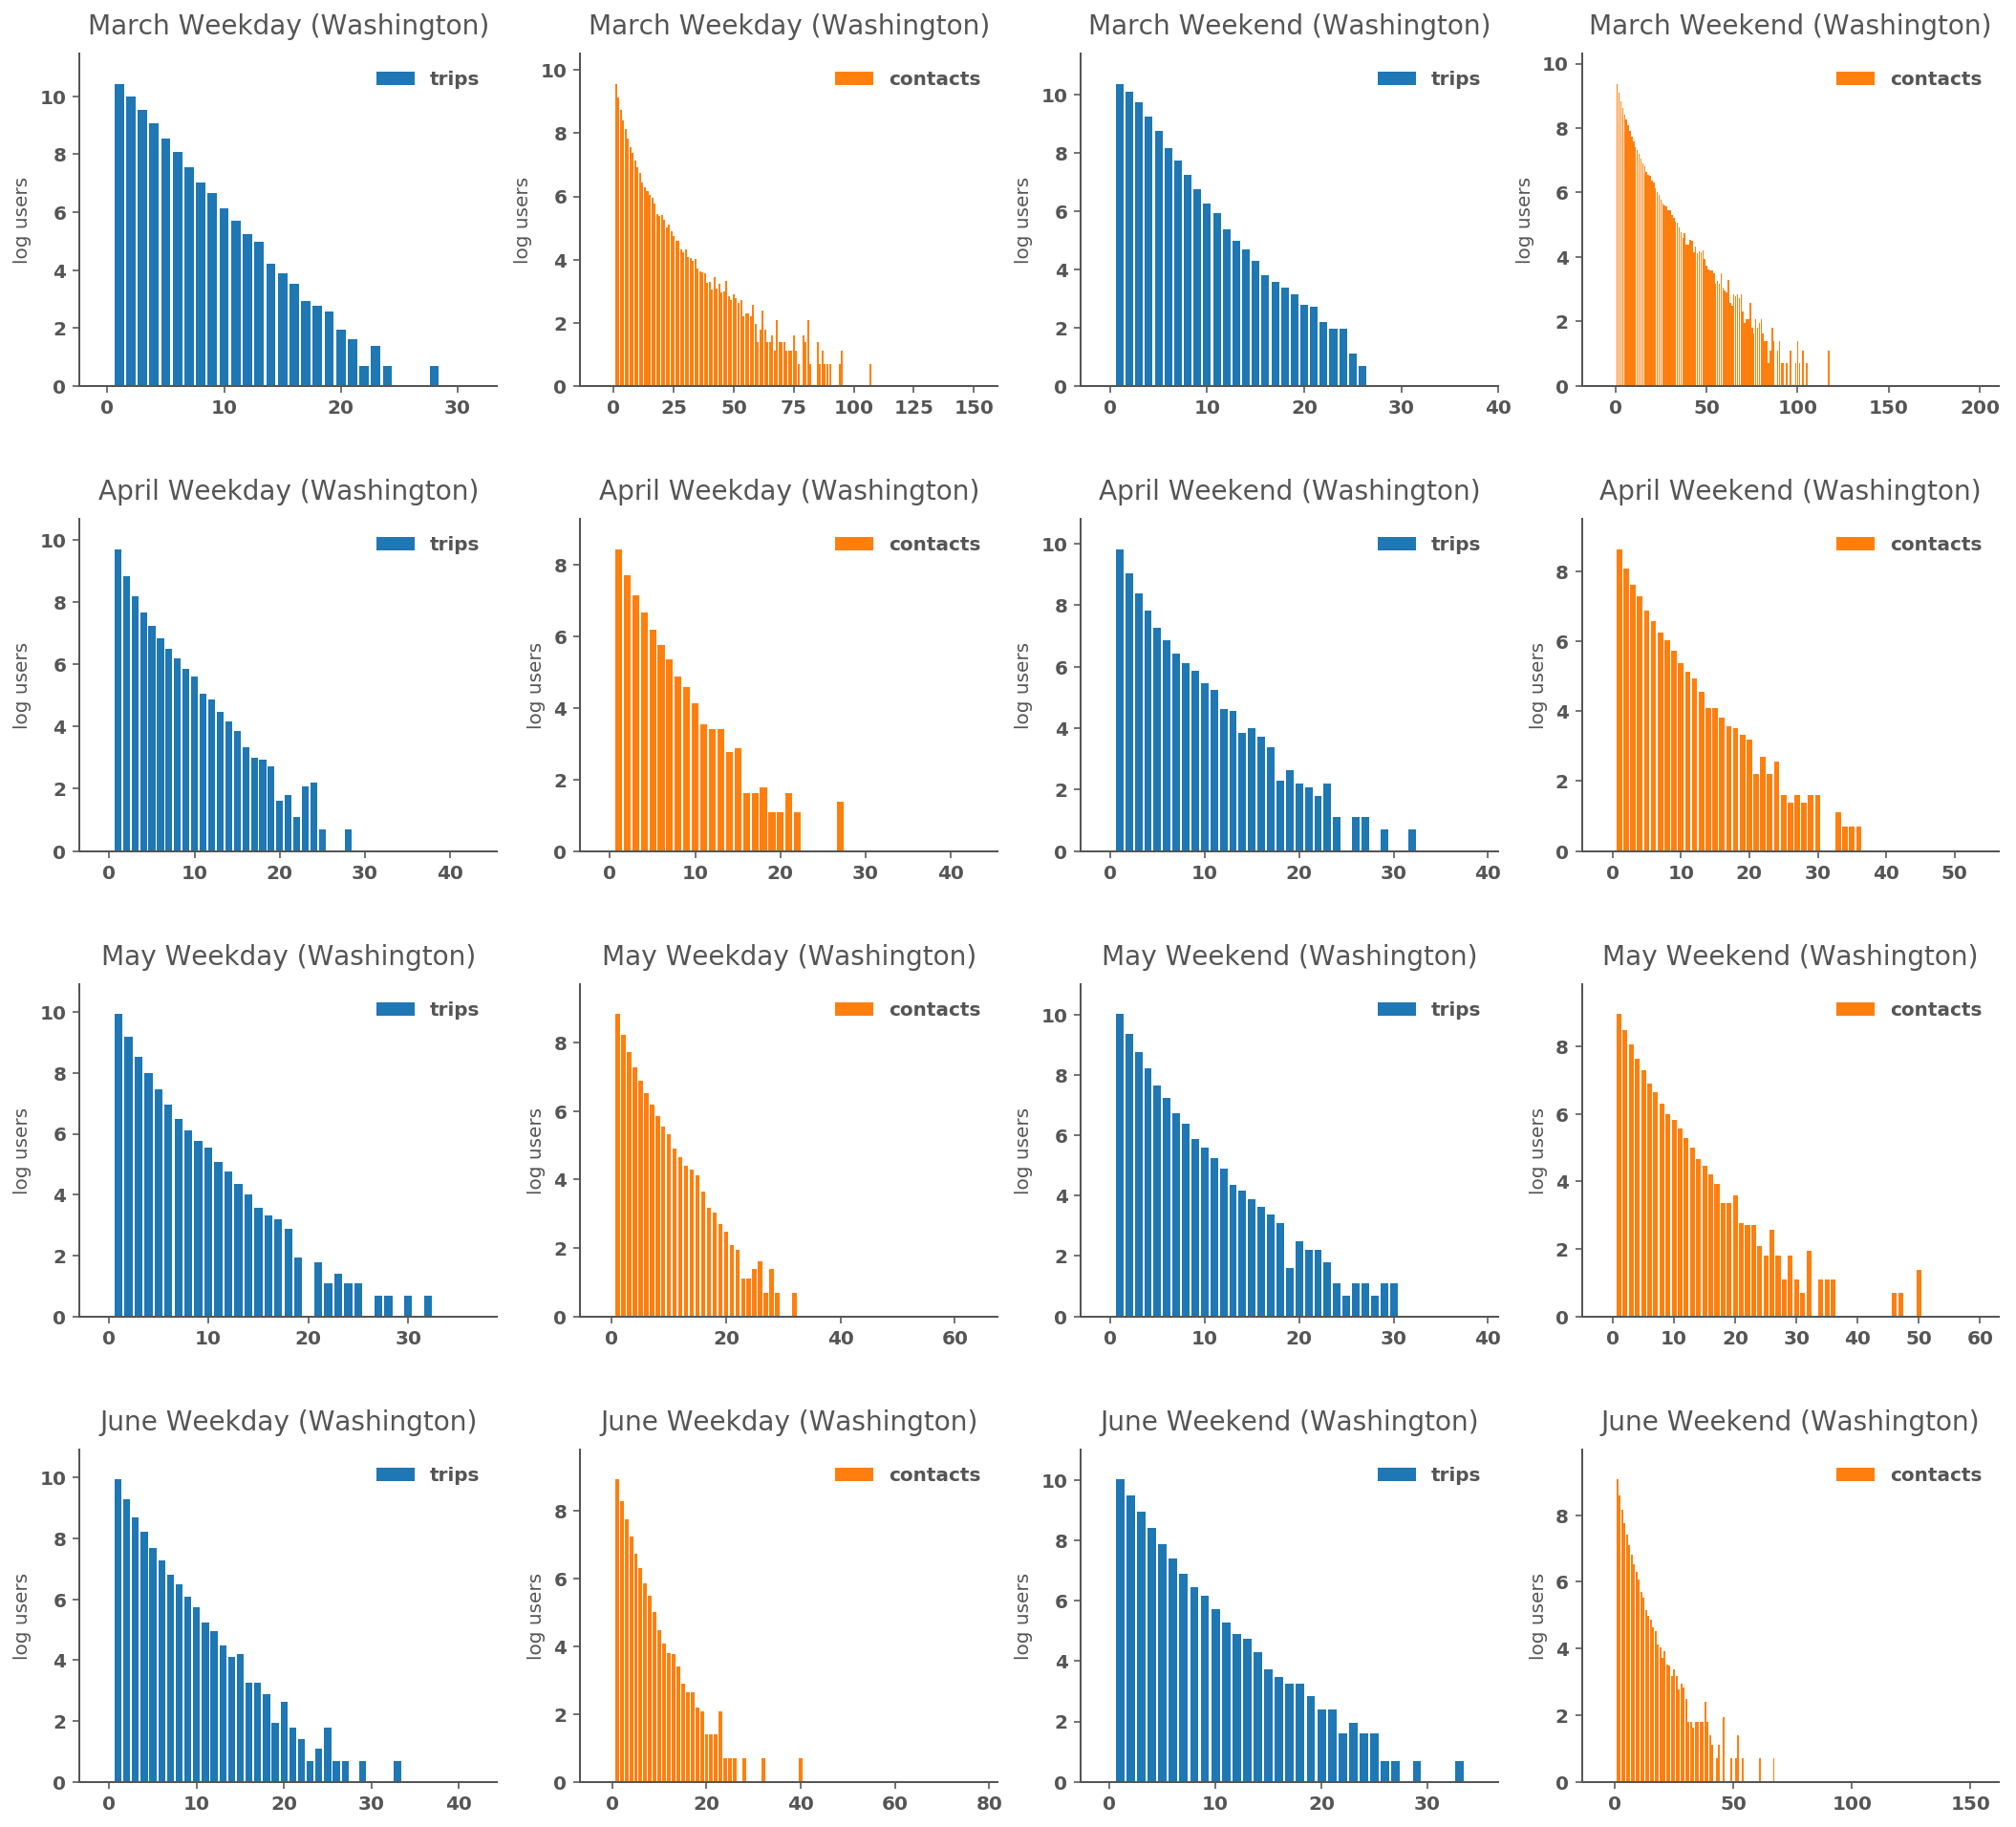

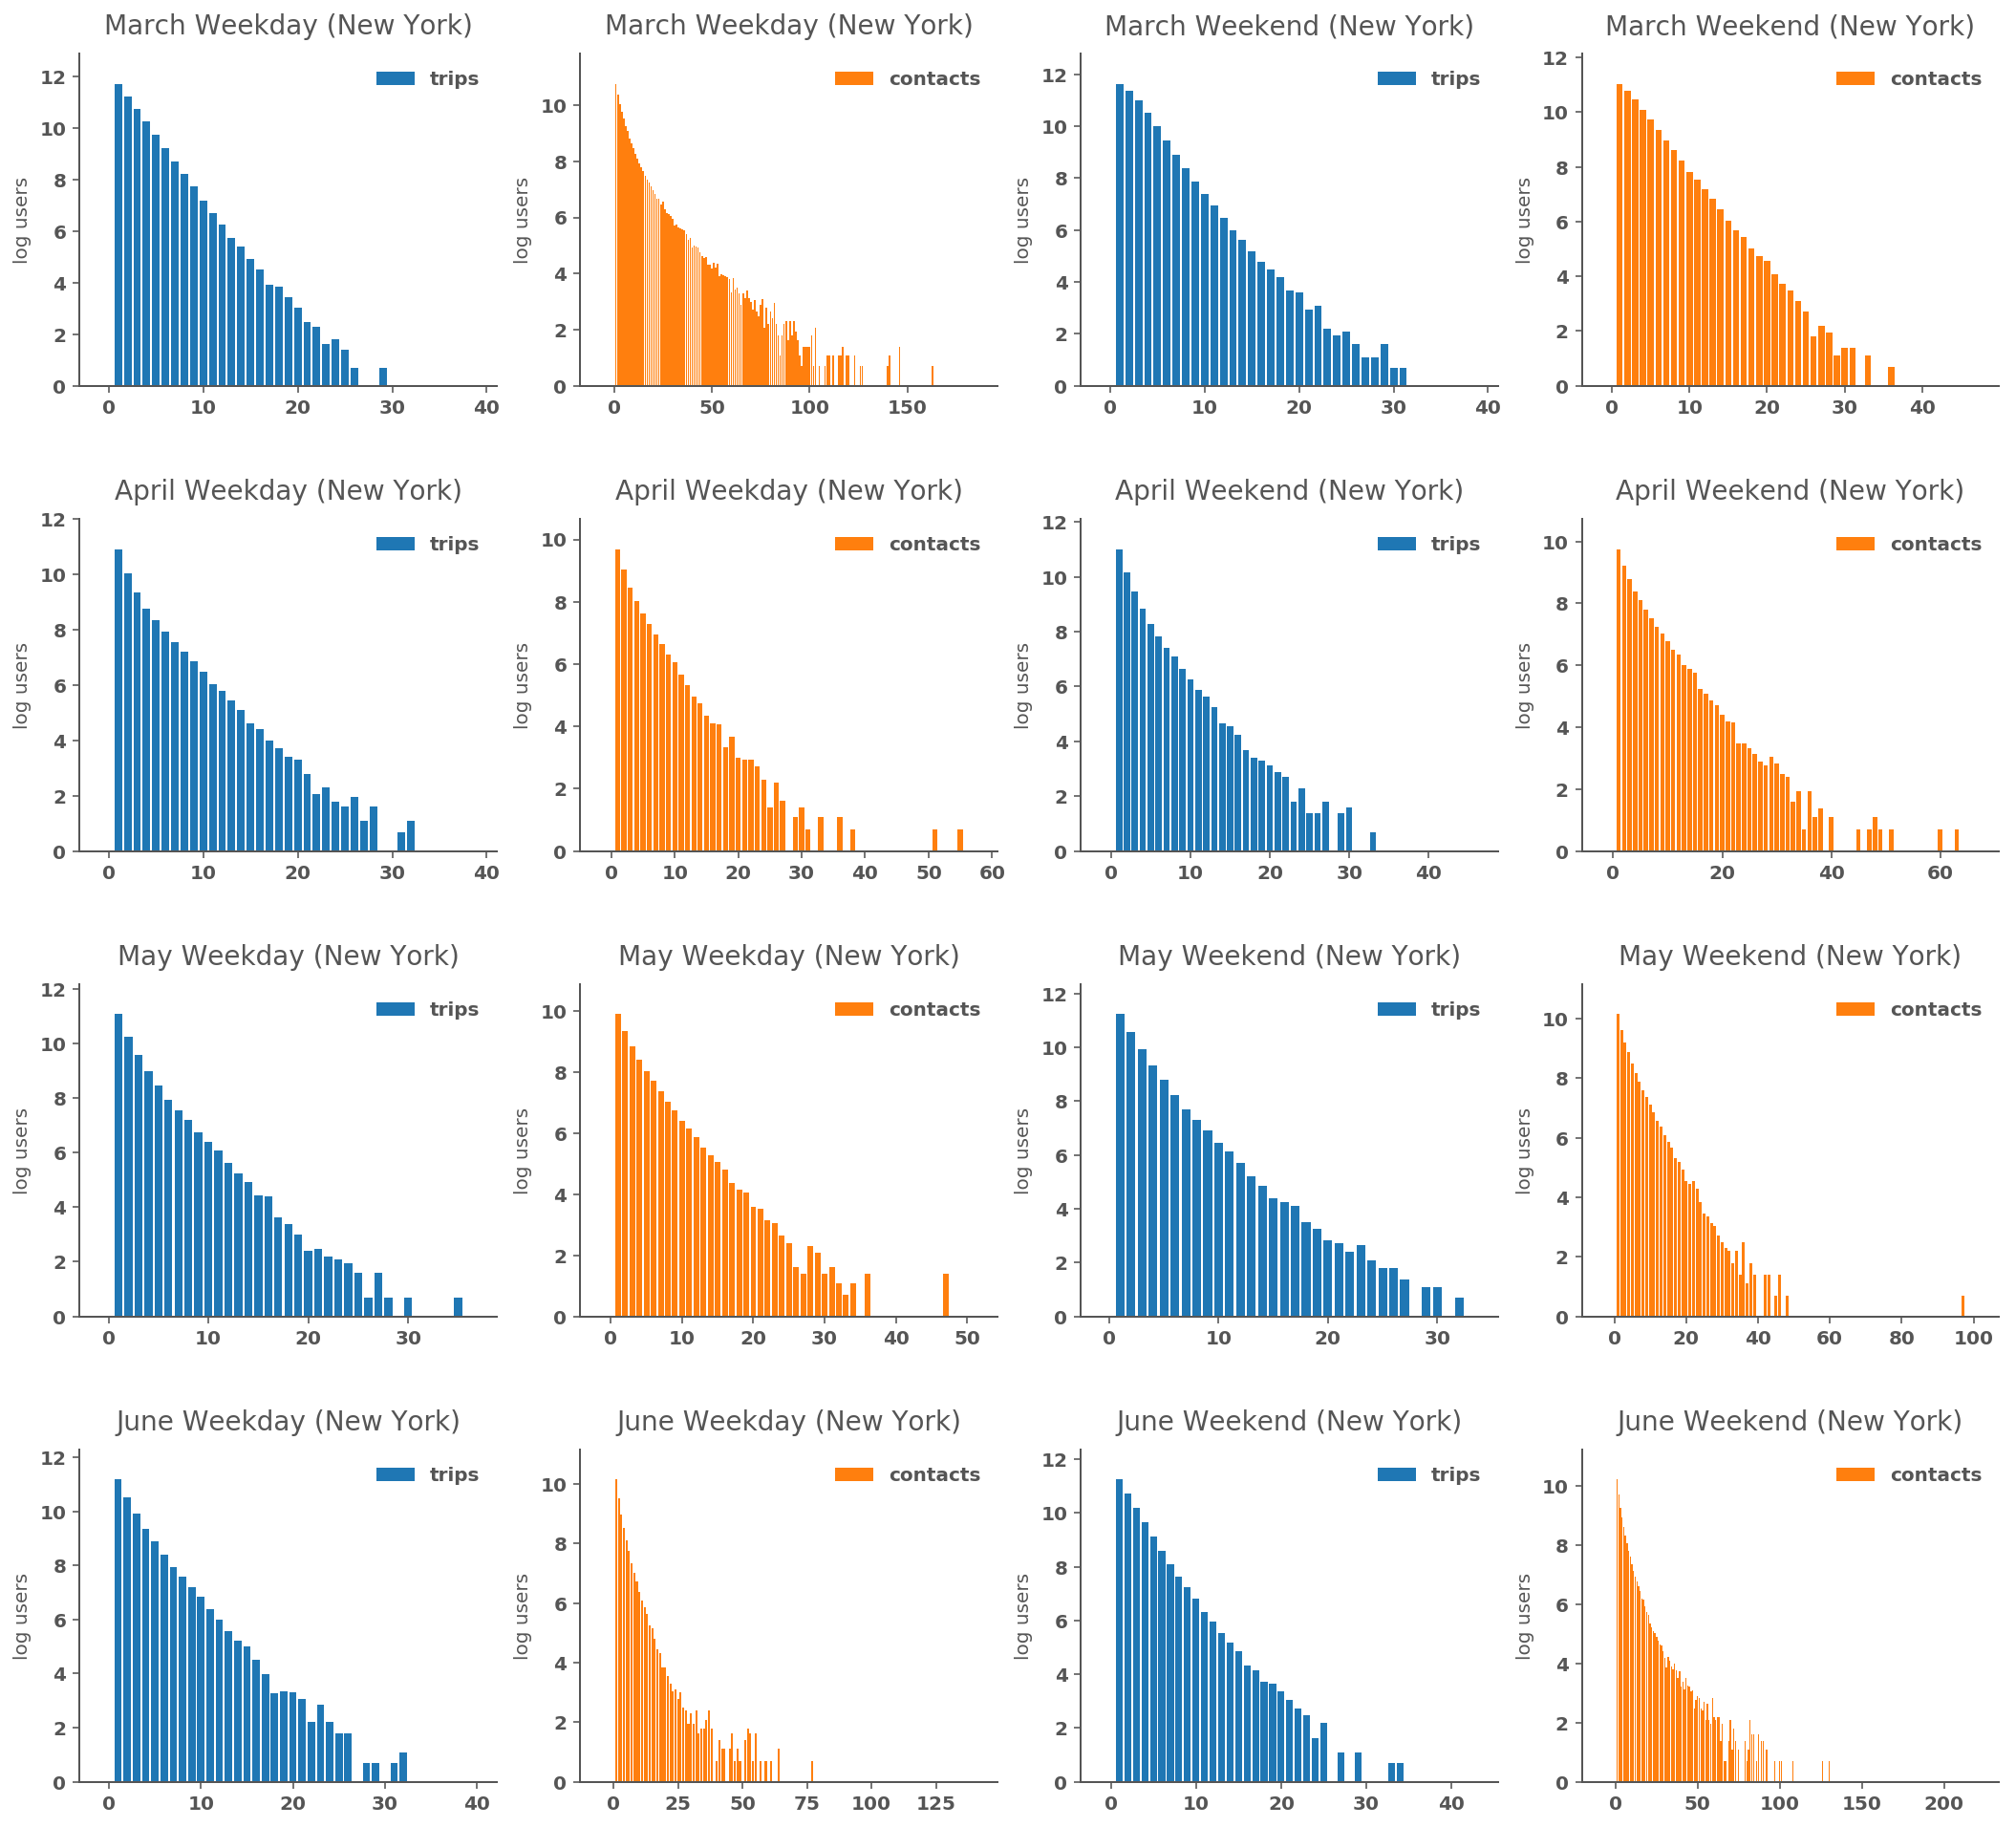

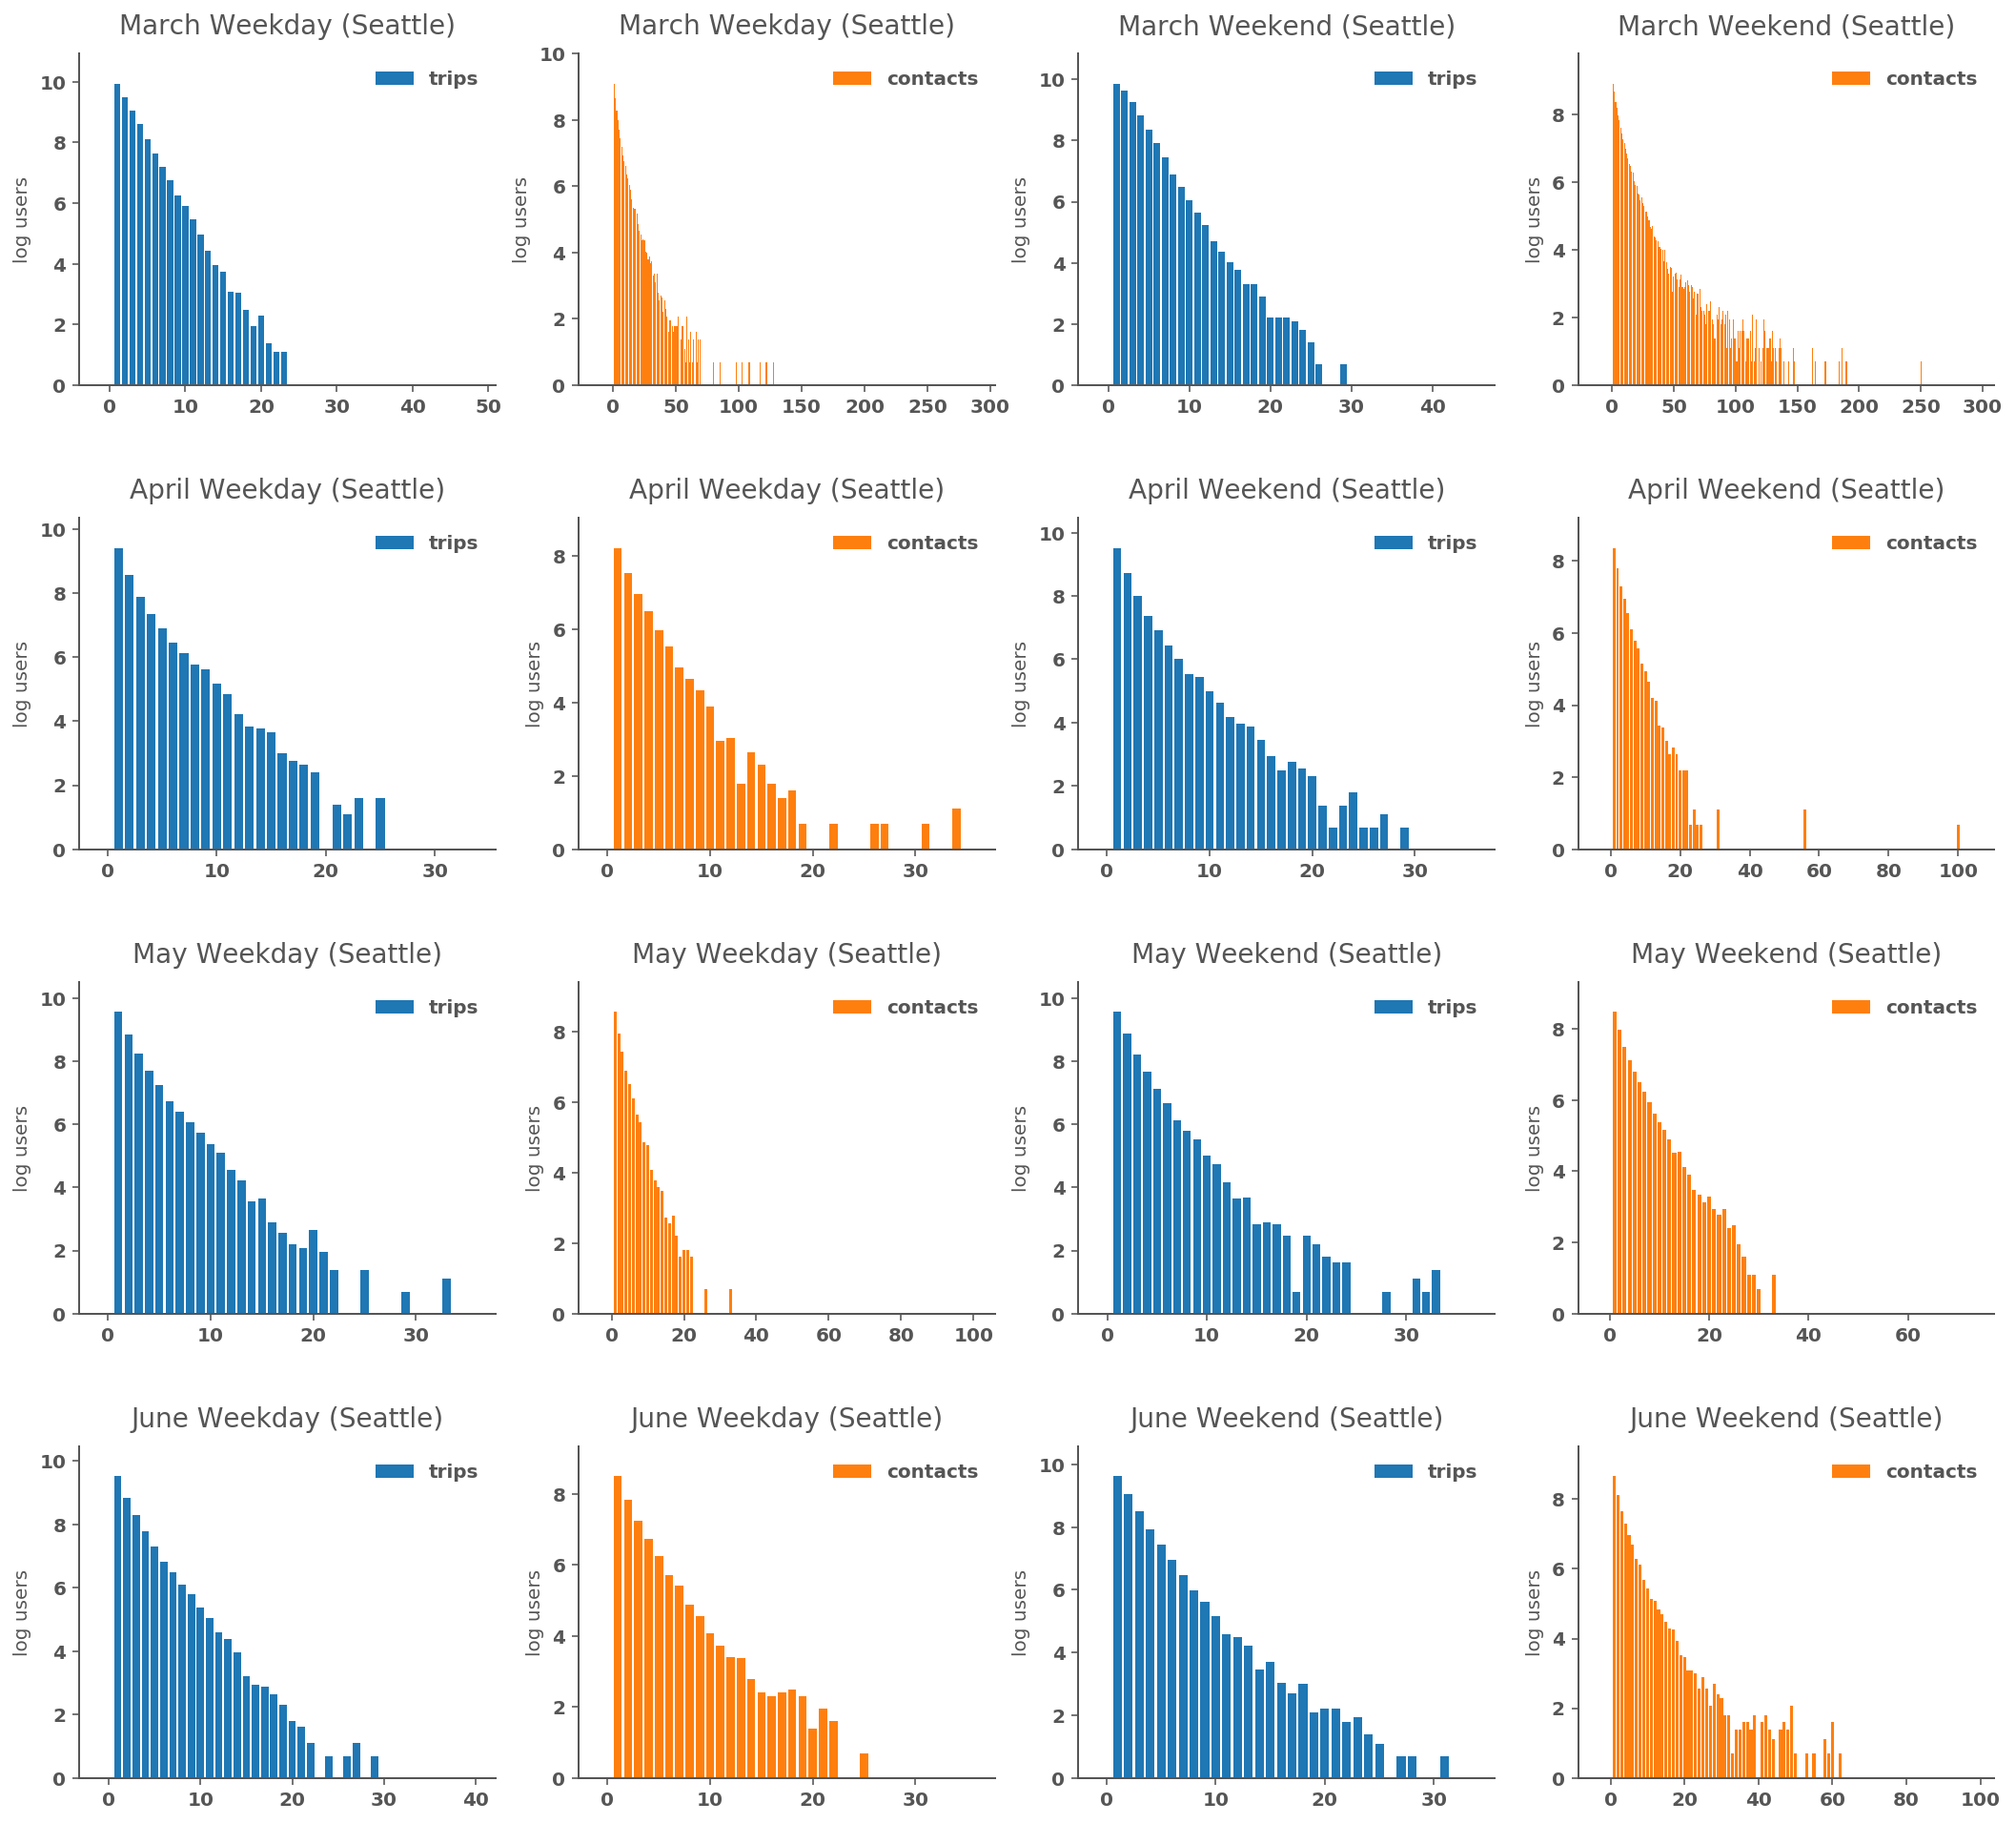

In [216]:
# Plot just the first  weekday  and first weekend  of each month
# Month: Weekday trips, Month: Weekday contacts, Month: Weekday trips, Month: Weekend contacts

ncols=4
nrows=len(months)

for metro in metro_area_to_id.keys():
    day_trips = metro_day_trips[metro]
    day_contacts = metro_day_contacts[metro]

    figure, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows*4))
    plt.subplots_adjust(hspace=0.4)
    
    months_names = {3: 'March', 4: 'April', 5: 'May', 6:'June'}
    for m, (month, month_name) in enumerate(months_names.items()):
        plotted_weekday = False
        plotted_weekend = False
        for d, date in enumerate(months_days[month]):
            dt = datetime.datetime.strptime(date, date_fmt)
            is_weekday = dt.isoweekday() in range(1,6)
            if is_weekday and plotted_weekday:
                continue
            if not is_weekday and plotted_weekend:
                continue
                
            if is_weekday:
                plotted_weekday = True
                title = '%s Weekday (%s)' % (month_name, metro)
            else:
                plotted_weekend = True
                title = '%s Weekend (%s)' % (month_name, metro)
            
            # plot trips and contacts  separately
            trips_df  = day_trips[date]
            contacts_df  = day_contacts[date]
            if is_weekday:
                trips_ax = axes.flat[m*4+0]
                contacts_ax = axes.flat[m*4+1]
            else:
                trips_ax = axes.flat[m*4+2]
                contacts_ax = axes.flat[m*4+3]
            

            trips_ax.bar(trips_df[TRIPS],
                np.log(trips_df[USER_COUNT]),
                alpha=1,
               label='trips',
               color='#1f77b4'
              )

            contacts_ax.bar(contacts_df[CONTACTS],
                np.log(contacts_df[USER_COUNT]),
                alpha=1,
               label='contacts',
               color=u'#ff7f0e'
              )
            trips_ax.set_title(title)
            trips_ax.set_ylabel('log users')
            trips_ax.legend()
            trips_ax.margins(0.1)
            contacts_ax.set_title(title)
            contacts_ax.set_ylabel('log users')
            contacts_ax.legend()
            contacts_ax.margins(0.1)
            
            trips_ax.get_figure().set_facecolor('w')
    plt.show()